## Insurance Claim Prediction

### Problem Statement

The project discussed here is to implement data analysis tools and techniques and predict whether an insured car will file a claim or not which is a classification prediction.

#### 1. Import Libraries
Let us import the required libraries and functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px

#To ignore warning messages
import warnings
warnings.filterwarnings('ignore')

#### 2. Loading the dataset
Read and display data to get insights from the data

In [2]:
data=pd.read_csv(r"C:\Users\amani\OneDrive\Desktop\KKEM-ICT-DSA\car_insurance_claim.csv")

In [3]:
data

ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ    INCOME PARENT1  \
0       63581743         0  16MAR39  60.0         0  11.0   $67,349      No   
1      132761049         0  21JAN56  43.0         0  11.0   $91,449      No   
2      921317019         0  18NOV51  48.0         0  11.0   $52,881      No   
3      727598473         0  05MAR64  35.0         1  10.0   $16,039      No   
4      450221861         0  05JUN48  51.0         0  14.0       NaN      No   
...          ...       ...      ...   ...       ...   ...       ...     ...   
10297   67790126         1  13AUG54  45.0         2   9.0  $164,669      No   
10298   61970712         0  17JUN53  46.0         0   9.0  $107,204      No   
10299  849208064         0  18JUN51  48.0         0  15.0   $39,837      No   
10300  627828331         0  12DEC48  50.0         0   7.0   $43,445      No   
10301  680381960         0  27FEB47  52.0         0  11.0   $53,235      No   

       HOME_VAL MSTATUS  ...     CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ REVOKED  \
0            $0    z_No  ...      Minivan     yes   $4,461         2      No   
1      $257,252    z_No  ...      Minivan     yes       $0         0      No   
2            $0    z_No  ...          Van     yes       $0         0      No   
3      $124,191     Yes  ...        z_SUV      no  $38,690         2      No   
4      $306,251     Yes  ...      Minivan     yes       $0         0      No   
...         ...     ...  ...          ...     ...      ...       ...     ...   
10297  $386,273     Yes  ...      Minivan      no       $0         0      No   
10298  $332,591     Yes  ...  Panel Truck      no       $0         0      No   
10299  $170,611     Yes  ...        z_SUV      no       $0         0      No   
10300  $149,248     Yes  ...      Minivan      no       $0         0      No   
10301  $197,017     Yes  ...      Minivan      no       $0         0      No   

      MVR_PTS  CLM_AMT CAR_AGE CLAIM_FLAG             URBANICITY  
0           3       $0    18.0          0    Highly Urban/ Urban  
1           0       $0     1.0          0    Highly Urban/ Urban  
2           2       $0    10.0          0    Highly Urban/ Urban  
3           3       $0    10.0          0    Highly Urban/ Urban  
4           0       $0     6.0          0    Highly Urban/ Urban  
...       ...      ...     ...        ...                    ...  
10297       2       $0    17.0          0    Highly Urban/ Urban  
10298       0       $0     1.0          0    Highly Urban/ Urban  
10299       0       $0     1.0          0    Highly Urban/ Urban  
10300       0       $0    11.0          0    Highly Urban/ Urban  
10301       0       $0     9.0          0  z_Highly Rural/ Rural  

[10302 rows x 27 columns]

In [4]:
data

ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ    INCOME PARENT1  \
0       63581743         0  16MAR39  60.0         0  11.0   $67,349      No   
1      132761049         0  21JAN56  43.0         0  11.0   $91,449      No   
2      921317019         0  18NOV51  48.0         0  11.0   $52,881      No   
3      727598473         0  05MAR64  35.0         1  10.0   $16,039      No   
4      450221861         0  05JUN48  51.0         0  14.0       NaN      No   
...          ...       ...      ...   ...       ...   ...       ...     ...   
10297   67790126         1  13AUG54  45.0         2   9.0  $164,669      No   
10298   61970712         0  17JUN53  46.0         0   9.0  $107,204      No   
10299  849208064         0  18JUN51  48.0         0  15.0   $39,837      No   
10300  627828331         0  12DEC48  50.0         0   7.0   $43,445      No   
10301  680381960         0  27FEB47  52.0         0  11.0   $53,235      No   

       HOME_VAL MSTATUS  ...     CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ REVOKED  \
0            $0    z_No  ...      Minivan     yes   $4,461         2      No   
1      $257,252    z_No  ...      Minivan     yes       $0         0      No   
2            $0    z_No  ...          Van     yes       $0         0      No   
3      $124,191     Yes  ...        z_SUV      no  $38,690         2      No   
4      $306,251     Yes  ...      Minivan     yes       $0         0      No   
...         ...     ...  ...          ...     ...      ...       ...     ...   
10297  $386,273     Yes  ...      Minivan      no       $0         0      No   
10298  $332,591     Yes  ...  Panel Truck      no       $0         0      No   
10299  $170,611     Yes  ...        z_SUV      no       $0         0      No   
10300  $149,248     Yes  ...      Minivan      no       $0         0      No   
10301  $197,017     Yes  ...      Minivan      no       $0         0      No   

      MVR_PTS  CLM_AMT CAR_AGE CLAIM_FLAG             URBANICITY  
0           3       $0    18.0          0    Highly Urban/ Urban  
1           0       $0     1.0          0    Highly Urban/ Urban  
2           2       $0    10.0          0    Highly Urban/ Urban  
3           3       $0    10.0          0    Highly Urban/ Urban  
4           0       $0     6.0          0    Highly Urban/ Urban  
...       ...      ...     ...        ...                    ...  
10297       2       $0    17.0          0    Highly Urban/ Urban  
10298       0       $0     1.0          0    Highly Urban/ Urban  
10299       0       $0     1.0          0    Highly Urban/ Urban  
10300       0       $0    11.0          0    Highly Urban/ Urban  
10301       0       $0     9.0          0  z_Highly Rural/ Rural  

[10302 rows x 27 columns]

### 4. Checking the Basic details of Dataset

#### 4.1 Dimensions of data

In [5]:
data.shape

(10302, 27)

##### Note : We see the dataframe has 26 columns and 10,302 observations.

#### 4.2 Summary of Data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

In [7]:
data.dtypes

ID              int64
KIDSDRIV        int64
BIRTH          object
AGE           float64
HOMEKIDS        int64
YOJ           float64
INCOME         object
PARENT1        object
HOME_VAL       object
MSTATUS        object
GENDER         object
EDUCATION      object
OCCUPATION     object
TRAVTIME        int64
CAR_USE        object
BLUEBOOK       object
TIF             int64
CAR_TYPE       object
RED_CAR        object
OLDCLAIM       object
CLM_FREQ        int64
REVOKED        object
MVR_PTS         int64
CLM_AMT        object
CAR_AGE       float64
CLAIM_FLAG      int64
URBANICITY     object
dtype: object

#### Note: From the above output, we see that the data type of 'INCOME', 'HOME_VAL', 'BLUEBOOK''OLDCLAIM' and 'CLM_AMT' is 'object'. But according to data definition, they are numerical variables, which are wrongly interpreted as 'object', so we will convert these variables data type to 'float64'.

#### 4.3 Replace the $ symbol

In [8]:

columns = ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']

for col in columns:
    data[col].replace({'\$': '', ',': ''}, regex=True,inplace=True)

In [9]:
data

ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ  INCOME PARENT1  \
0       63581743         0  16MAR39  60.0         0  11.0   67349      No   
1      132761049         0  21JAN56  43.0         0  11.0   91449      No   
2      921317019         0  18NOV51  48.0         0  11.0   52881      No   
3      727598473         0  05MAR64  35.0         1  10.0   16039      No   
4      450221861         0  05JUN48  51.0         0  14.0     NaN      No   
...          ...       ...      ...   ...       ...   ...     ...     ...   
10297   67790126         1  13AUG54  45.0         2   9.0  164669      No   
10298   61970712         0  17JUN53  46.0         0   9.0  107204      No   
10299  849208064         0  18JUN51  48.0         0  15.0   39837      No   
10300  627828331         0  12DEC48  50.0         0   7.0   43445      No   
10301  680381960         0  27FEB47  52.0         0  11.0   53235      No   

      HOME_VAL MSTATUS  ...     CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ REVOKED  \
0            0    z_No  ...      Minivan     yes     4461         2      No   
1       257252    z_No  ...      Minivan     yes        0         0      No   
2            0    z_No  ...          Van     yes        0         0      No   
3       124191     Yes  ...        z_SUV      no    38690         2      No   
4       306251     Yes  ...      Minivan     yes        0         0      No   
...        ...     ...  ...          ...     ...      ...       ...     ...   
10297   386273     Yes  ...      Minivan      no        0         0      No   
10298   332591     Yes  ...  Panel Truck      no        0         0      No   
10299   170611     Yes  ...        z_SUV      no        0         0      No   
10300   149248     Yes  ...      Minivan      no        0         0      No   
10301   197017     Yes  ...      Minivan      no        0         0      No   

      MVR_PTS  CLM_AMT CAR_AGE CLAIM_FLAG             URBANICITY  
0           3        0    18.0          0    Highly Urban/ Urban  
1           0        0     1.0          0    Highly Urban/ Urban  
2           2        0    10.0          0    Highly Urban/ Urban  
3           3        0    10.0          0    Highly Urban/ Urban  
4           0        0     6.0          0    Highly Urban/ Urban  
...       ...      ...     ...        ...                    ...  
10297       2        0    17.0          0    Highly Urban/ Urban  
10298       0        0     1.0          0    Highly Urban/ Urban  
10299       0        0     1.0          0    Highly Urban/ Urban  
10300       0        0    11.0          0    Highly Urban/ Urban  
10301       0        0     9.0          0  z_Highly Rural/ Rural  

[10302 rows x 27 columns]

#### 4.4 Converting columns of dataset

In [10]:
columns = ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']
for col in columns:
    data[col] = data[col].astype(float)

In [11]:
data.dtypes

ID              int64
KIDSDRIV        int64
BIRTH          object
AGE           float64
HOMEKIDS        int64
YOJ           float64
INCOME        float64
PARENT1        object
HOME_VAL      float64
MSTATUS        object
GENDER         object
EDUCATION      object
OCCUPATION     object
TRAVTIME        int64
CAR_USE        object
BLUEBOOK      float64
TIF             int64
CAR_TYPE       object
RED_CAR        object
OLDCLAIM      float64
CLM_FREQ        int64
REVOKED        object
MVR_PTS         int64
CLM_AMT       float64
CAR_AGE       float64
CLAIM_FLAG      int64
URBANICITY     object
dtype: object

In [12]:
data

ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ    INCOME PARENT1  \
0       63581743         0  16MAR39  60.0         0  11.0   67349.0      No   
1      132761049         0  21JAN56  43.0         0  11.0   91449.0      No   
2      921317019         0  18NOV51  48.0         0  11.0   52881.0      No   
3      727598473         0  05MAR64  35.0         1  10.0   16039.0      No   
4      450221861         0  05JUN48  51.0         0  14.0       NaN      No   
...          ...       ...      ...   ...       ...   ...       ...     ...   
10297   67790126         1  13AUG54  45.0         2   9.0  164669.0      No   
10298   61970712         0  17JUN53  46.0         0   9.0  107204.0      No   
10299  849208064         0  18JUN51  48.0         0  15.0   39837.0      No   
10300  627828331         0  12DEC48  50.0         0   7.0   43445.0      No   
10301  680381960         0  27FEB47  52.0         0  11.0   53235.0      No   

       HOME_VAL MSTATUS  ...     CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ REVOKED  \
0           0.0    z_No  ...      Minivan     yes   4461.0         2      No   
1      257252.0    z_No  ...      Minivan     yes      0.0         0      No   
2           0.0    z_No  ...          Van     yes      0.0         0      No   
3      124191.0     Yes  ...        z_SUV      no  38690.0         2      No   
4      306251.0     Yes  ...      Minivan     yes      0.0         0      No   
...         ...     ...  ...          ...     ...      ...       ...     ...   
10297  386273.0     Yes  ...      Minivan      no      0.0         0      No   
10298  332591.0     Yes  ...  Panel Truck      no      0.0         0      No   
10299  170611.0     Yes  ...        z_SUV      no      0.0         0      No   
10300  149248.0     Yes  ...      Minivan      no      0.0         0      No   
10301  197017.0     Yes  ...      Minivan      no      0.0         0      No   

       MVR_PTS  CLM_AMT CAR_AGE CLAIM_FLAG             URBANICITY  
0            3      0.0    18.0          0    Highly Urban/ Urban  
1            0      0.0     1.0          0    Highly Urban/ Urban  
2            2      0.0    10.0          0    Highly Urban/ Urban  
3            3      0.0    10.0          0    Highly Urban/ Urban  
4            0      0.0     6.0          0    Highly Urban/ Urban  
...        ...      ...     ...        ...                    ...  
10297        2      0.0    17.0          0    Highly Urban/ Urban  
10298        0      0.0     1.0          0    Highly Urban/ Urban  
10299        0      0.0     1.0          0    Highly Urban/ Urban  
10300        0      0.0    11.0          0    Highly Urban/ Urban  
10301        0      0.0     9.0          0  z_Highly Rural/ Rural  

[10302 rows x 27 columns]

#### 4.5 Print the column names in data

In [13]:
data.columns

Index(['ID', 'KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION',
       'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE',
       'CLAIM_FLAG', 'URBANICITY'],
      dtype='object')

#### 4.6 Summary Statistics of data

##### 4.6.1 Numerical Variables

In [14]:
data.describe()

ID      KIDSDRIV           AGE      HOMEKIDS          YOJ  \
count  1.030200e+04  10302.000000  10295.000000  10302.000000  9754.000000   
mean   4.956631e+08      0.169288     44.837397      0.720443    10.474062   
std    2.864675e+08      0.506512      8.606445      1.116323     4.108943   
min    6.317500e+04      0.000000     16.000000      0.000000     0.000000   
25%    2.442869e+08      0.000000     39.000000      0.000000     9.000000   
50%    4.970043e+08      0.000000     45.000000      0.000000    11.000000   
75%    7.394551e+08      0.000000     51.000000      1.000000    13.000000   
max    9.999264e+08      4.000000     81.000000      5.000000    23.000000   

              INCOME       HOME_VAL      TRAVTIME      BLUEBOOK           TIF  \
count    9732.000000    9727.000000  10302.000000  10302.000000  10302.000000   
mean    61572.073263  154523.018608     33.416424  15659.923316      5.329159   
std     47457.202749  129188.439405     15.869687   8428.765264      4.110795   
min         0.000000       0.000000      5.000000   1500.000000      1.000000   
25%     27584.000000       0.000000     22.000000   9200.000000      1.000000   
50%     53529.000000  160661.000000     33.000000  14400.000000      4.000000   
75%     86166.000000  238256.000000     44.000000  20890.000000      7.000000   
max    367030.000000  885282.000000    142.000000  69740.000000     25.000000   

           OLDCLAIM      CLM_FREQ       MVR_PTS        CLM_AMT      CAR_AGE  \
count  10302.000000  10302.000000  10302.000000   10302.000000  9663.000000   
mean    4033.977868      0.800718      1.710153    1511.266453     8.298148   
std     8733.143119      1.154079      2.159015    4725.249896     5.714450   
min        0.000000      0.000000      0.000000       0.000000    -3.000000   
25%        0.000000      0.000000      0.000000       0.000000     1.000000   
50%        0.000000      0.000000      1.000000       0.000000     8.000000   
75%     4647.500000      2.000000      3.000000    1144.750000    12.000000   
max    57037.000000      5.000000     13.000000  123247.000000    28.000000   

         CLAIM_FLAG  
count  10302.000000  
mean       0.266550  
std        0.442177  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%), minimum, and maximum values, along with the standard deviation.
Note, the average age of a driver is 44 years. Average income is 61572. The amount claimed is in between 4725 to 123247.

##### 4.6.2 Categorical Variables

In [15]:
data.describe(include=object)

BIRTH PARENT1 MSTATUS GENDER      EDUCATION     OCCUPATION  CAR_USE  \
count     10302   10302   10302  10302          10302           9637    10302   
unique     6560       2       2      2              5              8        2   
top     20OCT60      No     Yes    z_F  z_High School  z_Blue Collar  Private   
freq          8    8959    6188   5545           2952           2288     6513   

       CAR_TYPE RED_CAR REVOKED           URBANICITY  
count     10302   10302   10302                10302  
unique        6       2       2                    2  
top       z_SUV      no      No  Highly Urban/ Urban  
freq       2883    7326    9041                 8230

#### 4.7 Check unique values

In [16]:
uniq= pd.DataFrame(data.nunique(),columns=['Unique Values'])
uniq

Unique Values
ID                   8753
KIDSDRIV                5
BIRTH                6560
AGE                    61
HOMEKIDS                6
YOJ                    21
INCOME               8151
PARENT1                 2
HOME_VAL             6334
MSTATUS                 2
GENDER                  2
EDUCATION               5
OCCUPATION              8
TRAVTIME              100
CAR_USE                 2
BLUEBOOK             2985
TIF                    23
CAR_TYPE                6
RED_CAR                 2
OLDCLAIM             3545
CLM_FREQ                6
REVOKED                 2
MVR_PTS                14
CLM_AMT              2346
CAR_AGE                30
CLAIM_FLAG              2
URBANICITY              2

### 5. Check percentage of missing values & Plotting it

In [17]:
Total = data.isnull().sum().sort_values(ascending=False) 
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
missing_data

Total  Percentage of Missing Values
OCCUPATION    665                      6.455057
CAR_AGE       639                      6.202679
HOME_VAL      575                      5.581440
INCOME        570                      5.532906
YOJ           548                      5.319355
AGE             7                      0.067948
ID              0                      0.000000
TIF             0                      0.000000
CLAIM_FLAG      0                      0.000000
CLM_AMT         0                      0.000000
MVR_PTS         0                      0.000000
REVOKED         0                      0.000000
CLM_FREQ        0                      0.000000
OLDCLAIM        0                      0.000000
RED_CAR         0                      0.000000
CAR_TYPE        0                      0.000000
TRAVTIME        0                      0.000000
BLUEBOOK        0                      0.000000
CAR_USE         0                      0.000000
KIDSDRIV        0                      0.000000
EDUCATION       0                      0.000000
GENDER          0                      0.000000
MSTATUS         0                      0.000000
PARENT1         0                      0.000000
HOMEKIDS        0                      0.000000
BIRTH           0                      0.000000
URBANICITY      0                      0.000000

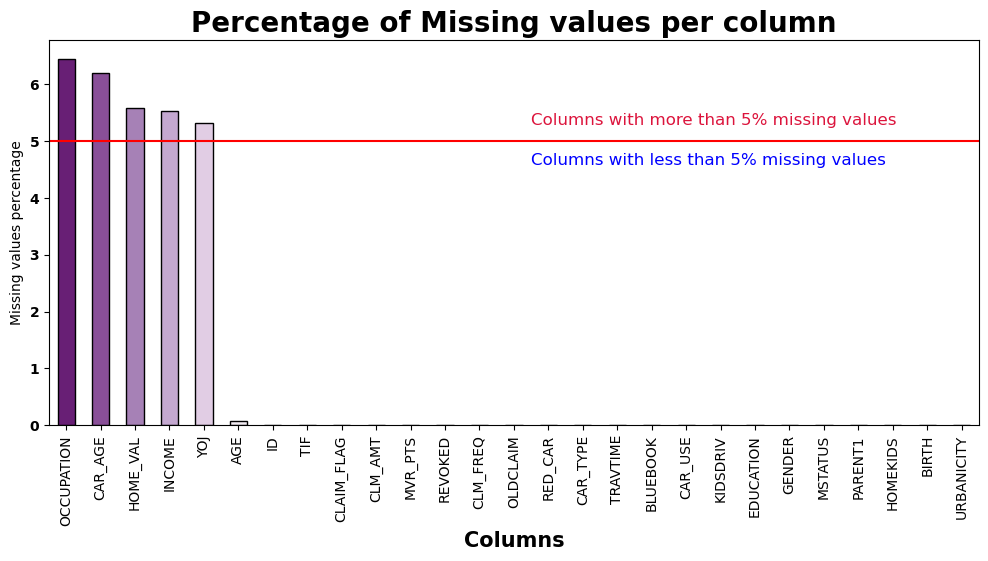

In [18]:
def msv(data, thresh = 5, color = 'black', edgecolor = 'black', height = 5, width = 12):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Percentage of Missing values per column', fontsize=20, weight='bold' )
    
    plt.text(len(data.isnull().sum()/len(data))/2, thresh+0.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/2, thresh - 0.2, f'Columns with less than {thresh}% missing values', fontsize=12, color='blue',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()
msv(data, 5, color=sns.color_palette('PRGn',12))

#### 5.1 Visualize Missing Values using Heatmap

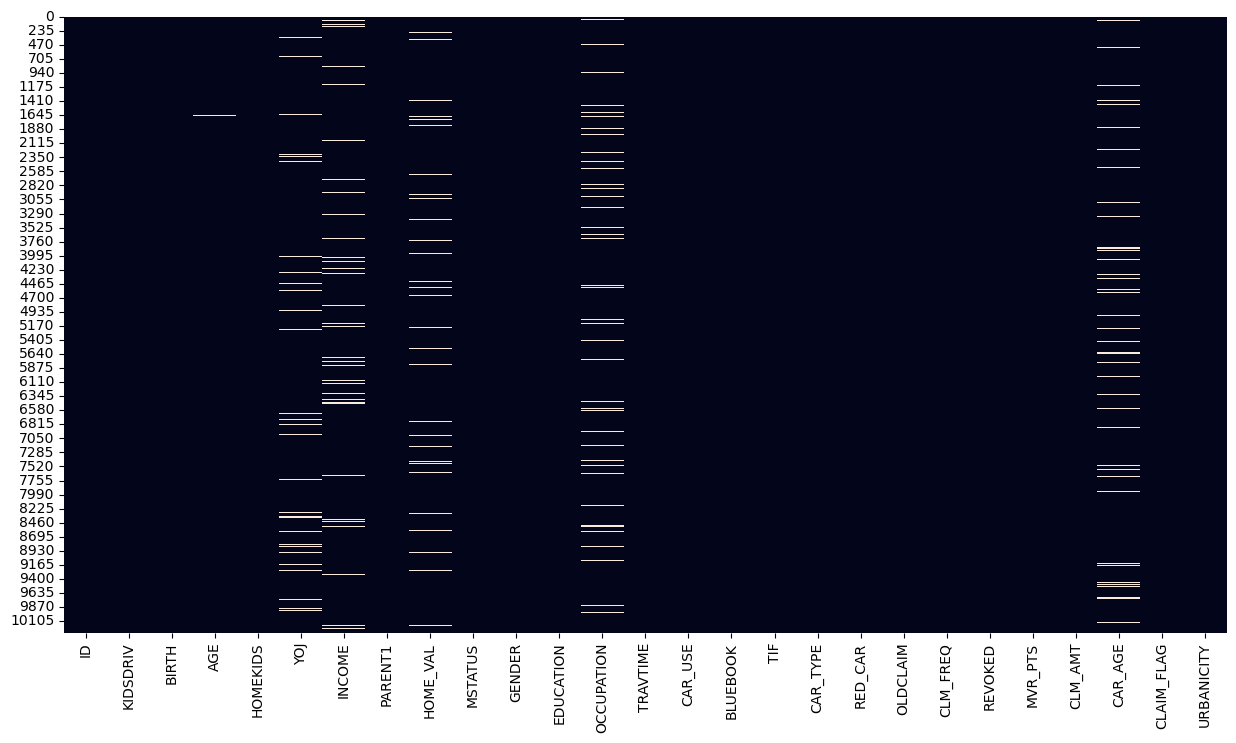

In [19]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

### 6.Replace special chars in data

In [20]:
data["EDUCATION"].value_counts()

z_High School    2952
Bachelors        2823
Masters          2078
<High School     1515
PhD               934
Name: EDUCATION, dtype: int64

In [21]:
data.MSTATUS = data.MSTATUS.apply(lambda x: 'No' if x == 'z_No' else x)
data.GENDER = data.GENDER.apply(lambda x: 'F' if x == 'z_F' else x)
data.EDUCATION = data.EDUCATION.apply(lambda x: 'High School' if x == 'z_High School' else x)
data.OCCUPATION = data.OCCUPATION.apply(lambda x: 'Blue Collar' if x == 'z_Blue Collar' else x)
data.CAR_TYPE = data.CAR_TYPE.apply(lambda x: 'SUV' if x == 'z_SUV' else x)
data.URBANICITY = data.URBANICITY.apply(lambda x: 'Highly Rural/ Rural' if x == 'z_Highly Rural/ Rural' else x)

In [22]:
data['URBANICITY'] = data.URBANICITY.apply(lambda x: x[-5:])

In [23]:
data["EDUCATION"].value_counts()

High School     2952
Bachelors       2823
Masters         2078
<High School    1515
PhD              934
Name: EDUCATION, dtype: int64

In [24]:
data.URBANICITY

0        Urban
1        Urban
2        Urban
3        Urban
4        Urban
         ...  
10297    Urban
10298    Urban
10299    Urban
10300    Urban
10301    Rural
Name: URBANICITY, Length: 10302, dtype: object

In [25]:
data.URBANICITY.value_counts()

Urban    8230
Rural    2072
Name: URBANICITY, dtype: int64

In [26]:
data.CAR_USE.value_counts()

Private       6513
Commercial    3789
Name: CAR_USE, dtype: int64

In [27]:
data.OCCUPATION.value_counts()

Blue Collar     2288
Clerical        1590
Professional    1408
Manager         1257
Lawyer          1031
Student          899
Home Maker       843
Doctor           321
Name: OCCUPATION, dtype: int64

### 7.Filter out only the numeric variables from the dataframe

In [28]:
numeric_features = data.select_dtypes(include=np.number)
numeric_features.columns

Index(['ID', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'HOME_VAL',
       'TRAVTIME', 'BLUEBOOK', 'TIF', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS',
       'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG'],
      dtype='object')

In [29]:
#sns.pairplot(numeric_features)

The dataframe numeric_features has 15 numeric variables.

#### 7.1 Correlation matrix of numeric variables

In [30]:
corr =  numeric_features.corr()
corr

ID  KIDSDRIV       AGE  HOMEKIDS       YOJ    INCOME  \
ID          1.000000  0.003508 -0.010423  0.009144 -0.011068 -0.021582   
KIDSDRIV    0.003508  1.000000 -0.078427  0.463653  0.042971 -0.043217   
AGE        -0.010423 -0.078427  1.000000 -0.447787  0.140878  0.186202   
HOMEKIDS    0.009144  0.463653 -0.447787  1.000000  0.077707 -0.160230   
YOJ        -0.011068  0.042971  0.140878  0.077707  1.000000  0.293899   
INCOME     -0.021582 -0.043217  0.186202 -0.160230  0.293899  1.000000   
HOME_VAL   -0.014370 -0.015447  0.209600 -0.107483  0.272198  0.578943   
TRAVTIME   -0.002410  0.012207 -0.001569 -0.000722 -0.017152 -0.051853   
BLUEBOOK   -0.000213 -0.028508  0.166290 -0.108569  0.148086  0.429095   
TIF        -0.010196 -0.005830 -0.001890  0.007509  0.023921  0.002361   
OLDCLAIM    0.002615  0.023886 -0.033378  0.029756 -0.005077 -0.039347   
CLM_FREQ   -0.001436  0.038952 -0.037641  0.038661 -0.023535 -0.049220   
MVR_PTS     0.008391  0.048424 -0.075732  0.064294 -0.041593 -0.063495   
CLM_AMT    -0.012758  0.068283 -0.049034  0.068646 -0.026799 -0.057686   
CAR_AGE    -0.004771 -0.059629  0.178592 -0.159008  0.064685  0.417301   
CLAIM_FLAG -0.005938  0.108421 -0.106969  0.123049 -0.066265 -0.142587   

            HOME_VAL  TRAVTIME  BLUEBOOK       TIF  OLDCLAIM  CLM_FREQ  \
ID         -0.014370 -0.002410 -0.000213 -0.010196  0.002615 -0.001436   
KIDSDRIV   -0.015447  0.012207 -0.028508 -0.005830  0.023886  0.038952   
AGE         0.209600 -0.001569  0.166290 -0.001890 -0.033378 -0.037641   
HOMEKIDS   -0.107483 -0.000722 -0.108569  0.007509  0.029756  0.038661   
YOJ         0.272198 -0.017152  0.148086  0.023921 -0.005077 -0.023535   
INCOME      0.578943 -0.051853  0.429095  0.002361 -0.039347 -0.049220   
HOME_VAL    1.000000 -0.035139  0.261962  0.006768 -0.059803 -0.093854   
TRAVTIME   -0.035139  1.000000 -0.022536 -0.013327 -0.013806  0.008274   
BLUEBOOK    0.261962 -0.022536  1.000000  0.000705 -0.030725 -0.042130   
TIF         0.006768 -0.013327  0.000705  1.000000 -0.015520 -0.017378   
OLDCLAIM   -0.059803 -0.013806 -0.030725 -0.015520  1.000000  0.494468   
CLM_FREQ   -0.093854  0.008274 -0.042130 -0.017378  0.494468  1.000000   
MVR_PTS    -0.092460  0.009694 -0.044818 -0.031164  0.262031  0.401413   
CLM_AMT    -0.091987  0.031270 -0.002443 -0.046518  0.076535  0.122204   
CAR_AGE     0.223198 -0.033290  0.194366  0.007897 -0.019163 -0.018904   
CLAIM_FLAG -0.185390  0.053283 -0.103287 -0.081225  0.142918  0.222618   

             MVR_PTS   CLM_AMT   CAR_AGE  CLAIM_FLAG  
ID          0.008391 -0.012758 -0.004771   -0.005938  
KIDSDRIV    0.048424  0.068283 -0.059629    0.108421  
AGE        -0.075732 -0.049034  0.178592   -0.106969  
HOMEKIDS    0.064294  0.068646 -0.159008    0.123049  
YOJ        -0.041593 -0.026799  0.064685   -0.066265  
INCOME     -0.063495 -0.057686  0.417301   -0.142587  
HOME_VAL   -0.092460 -0.091987  0.223198   -0.185390  
TRAVTIME    0.009694  0.031270 -0.033290    0.053283  
BLUEBOOK   -0.044818 -0.002443  0.194366   -0.103287  
TIF        -0.031164 -0.046518  0.007897   -0.081225  
OLDCLAIM    0.262031  0.076535 -0.019163    0.142918  
CLM_FREQ    0.401413  0.122204 -0.018904    0.222618  
MVR_PTS     1.000000  0.133567 -0.033898    0.222485  
CLM_AMT     0.133567  1.000000 -0.066060    0.530558  
CAR_AGE    -0.033898 -0.066060  1.000000   -0.109818  
CLAIM_FLAG  0.222485  0.530558 -0.109818    1.000000

In [31]:
corr.columns

Index(['ID', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'HOME_VAL',
       'TRAVTIME', 'BLUEBOOK', 'TIF', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS',
       'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG'],
      dtype='object')

#### 7.2 Plot the heatmap of correlation matrix

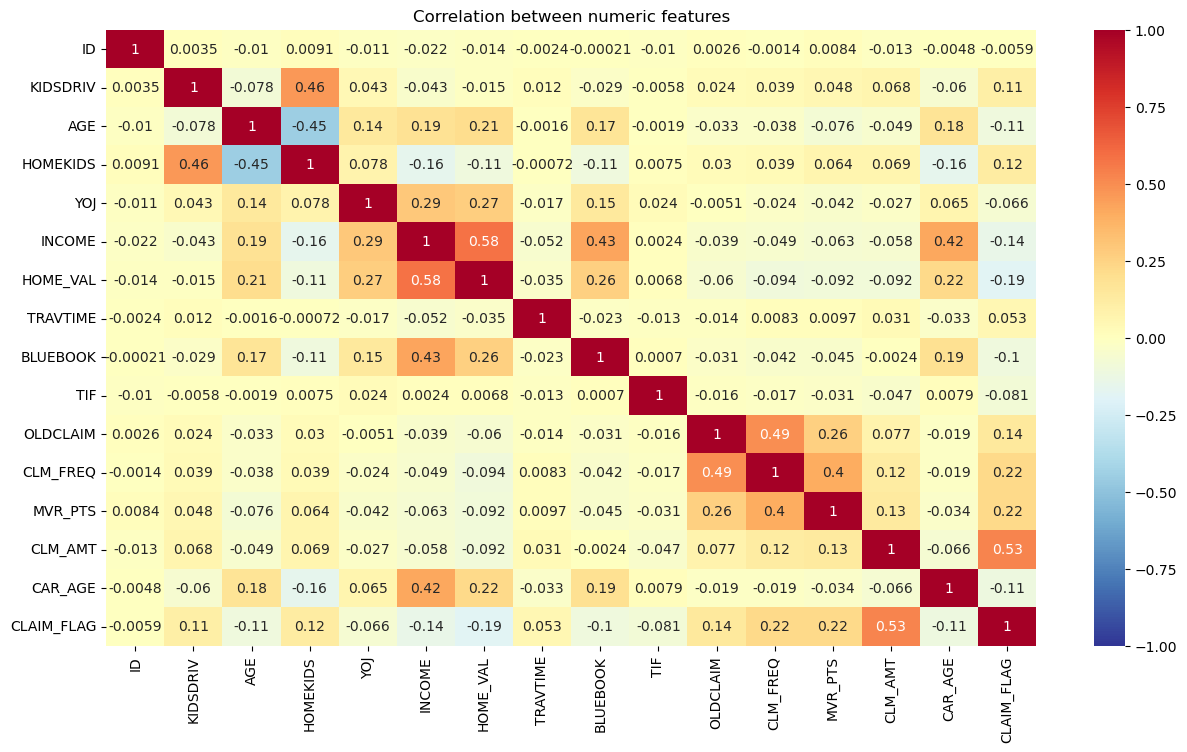

In [32]:
plt.figure(figsize=(15, 8))
sns.heatmap(corr, cmap='RdYlBu_r', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 10}, )
plt.title('Correlation between numeric features')
plt.show()

### 8.Filter out only the categoric variables from the dataframe

In [33]:
data.describe(include=object)

BIRTH PARENT1 MSTATUS GENDER    EDUCATION   OCCUPATION  CAR_USE  \
count     10302   10302   10302  10302        10302         9637    10302   
unique     6560       2       2      2            5            8        2   
top     20OCT60      No     Yes      F  High School  Blue Collar  Private   
freq          8    8959    6188   5545         2952         2288     6513   

       CAR_TYPE RED_CAR REVOKED URBANICITY  
count     10302   10302   10302      10302  
unique        6       2       2          2  
top         SUV      no      No      Urban  
freq       2883    7326    9041       8230

There are 11 categorical variables. From the output we see that the variable 'BIRTH' has most number of categories. There are 6560 dates in the data, of which 20OCT60 occurs most of the time.

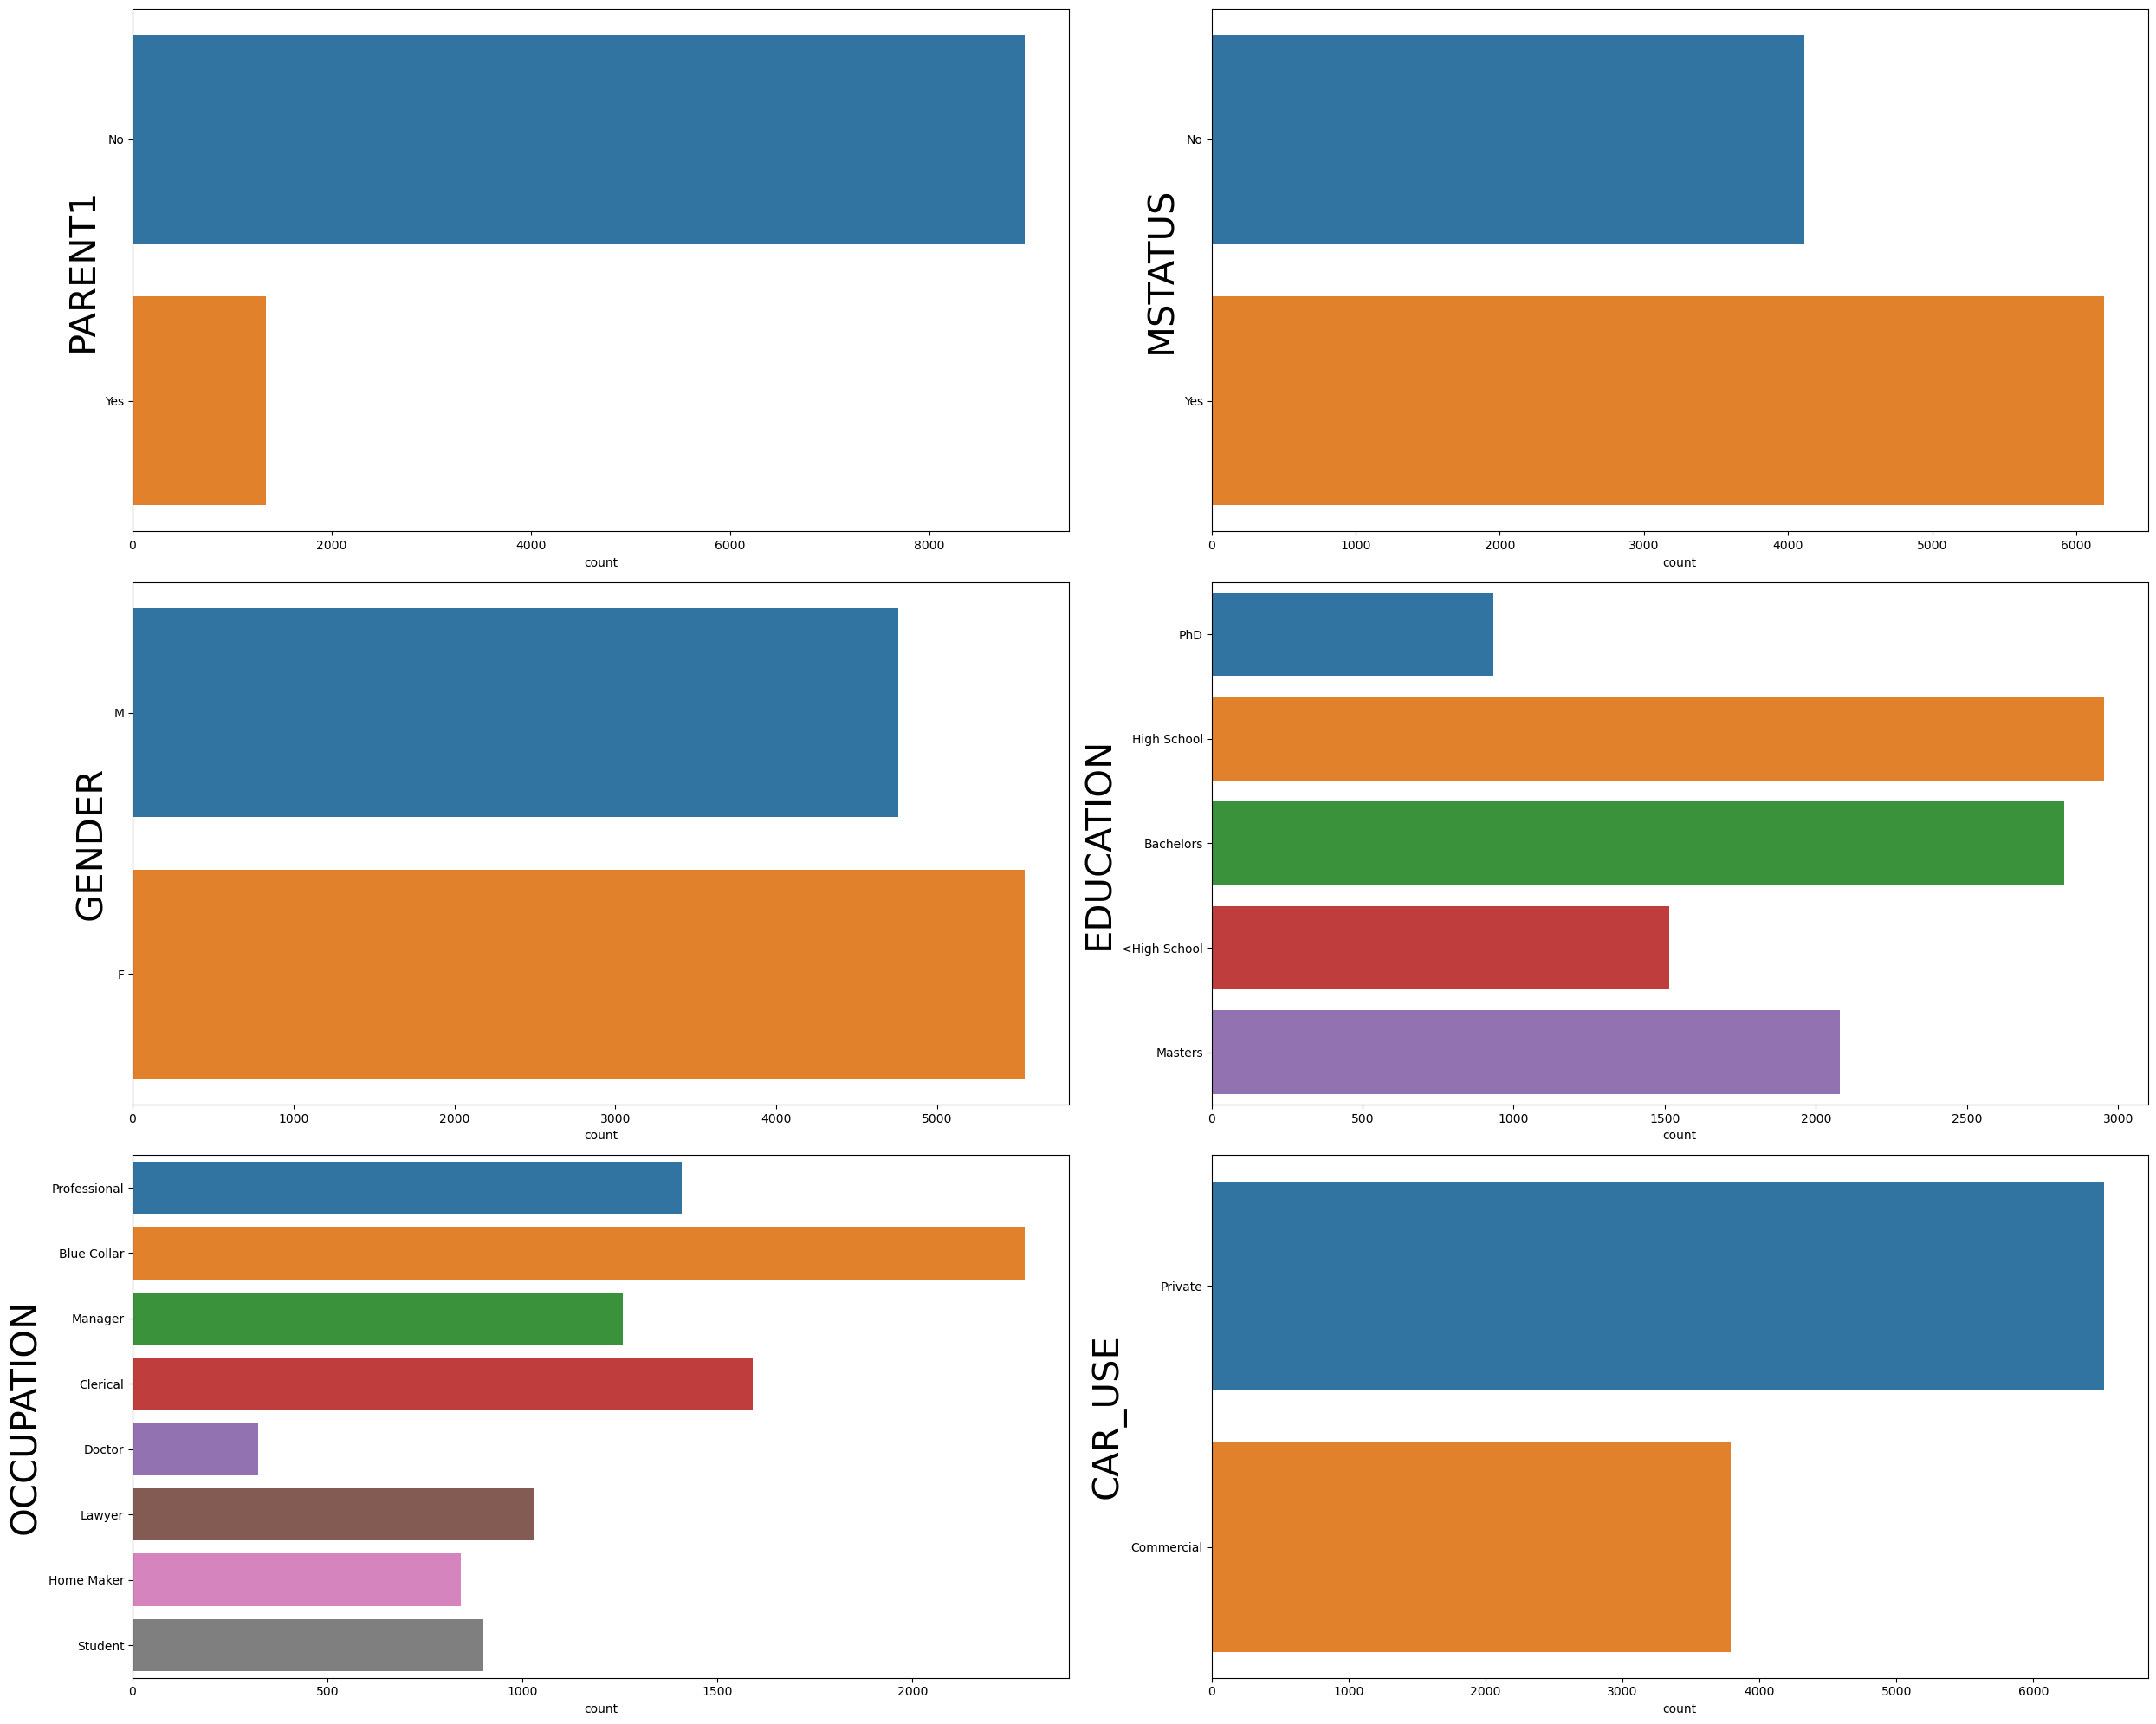

In [34]:
categoric_features = data.select_dtypes(include='object').drop(['BIRTH'], axis=1)
fig, ax = plt.subplots(3, 2, figsize=(25, 20))
for variable, subplot in zip(categoric_features, ax.flatten()):
    countplot = sns.countplot(y=data[variable], ax=subplot )
    countplot.set_ylabel(variable, fontsize = 30)
plt.tight_layout()   
plt.show()

##### From the above plot we see that: 
* The number of single parents are few in number
* Most of them are married
* The number of females are higher than males
* Most of the people in the data have high school education & only few are having PhD
* Occupation of most of the people is Blue Collar & few are doctors
* Commercial usage of car is significantly low compared to private

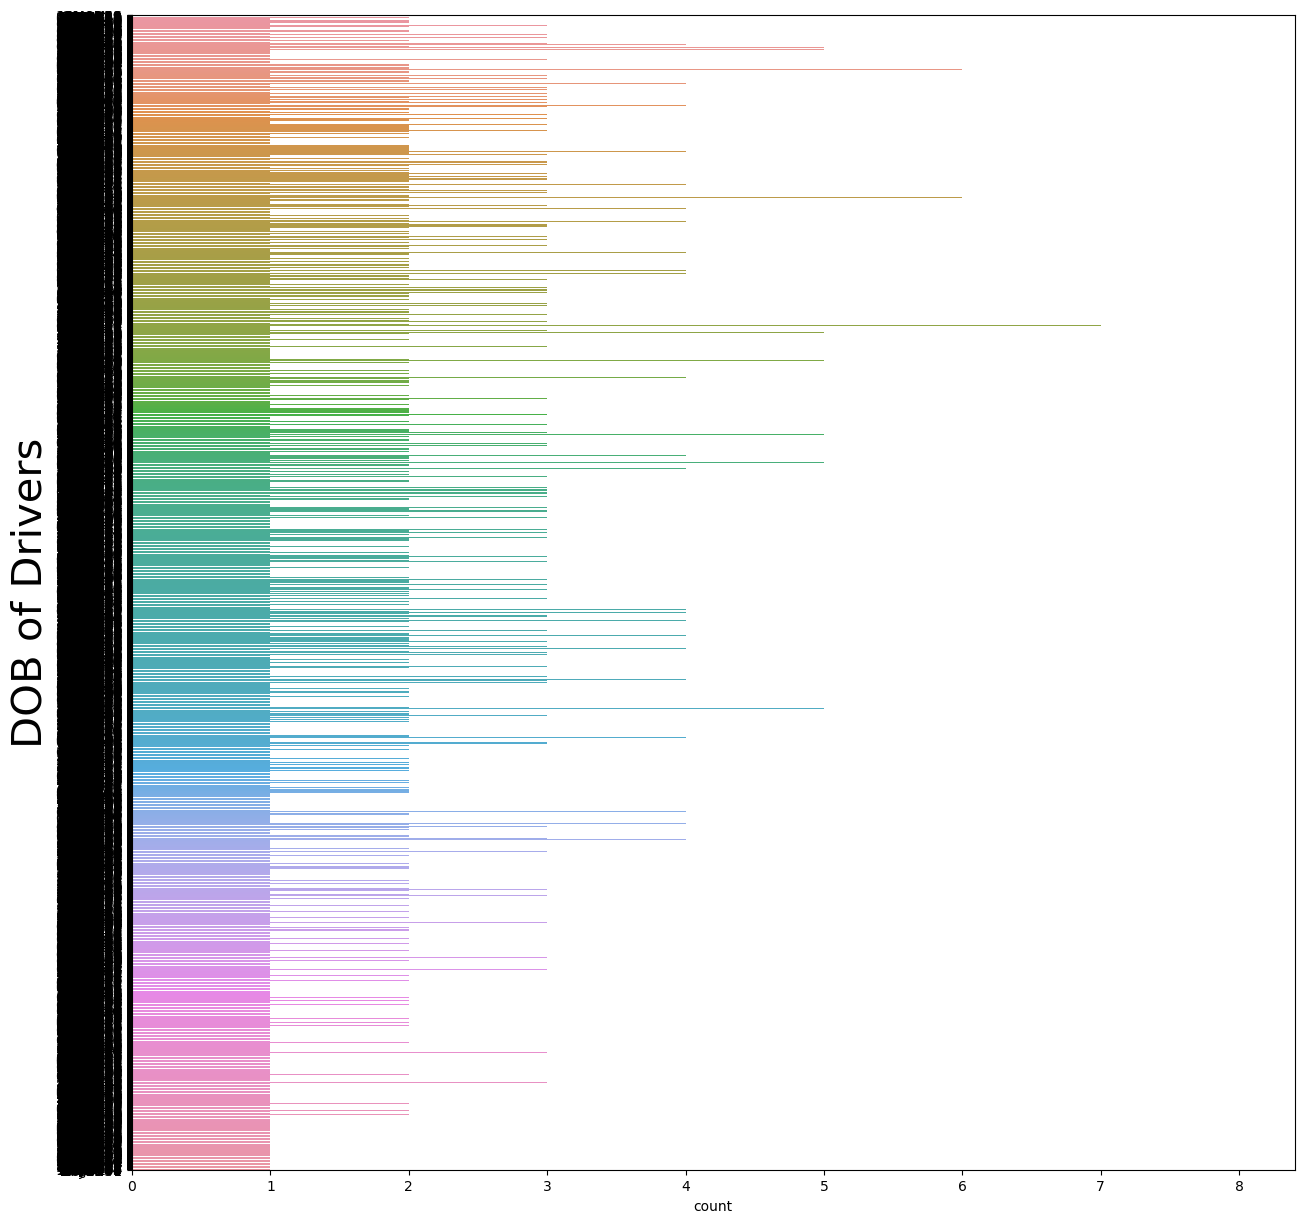

In [35]:
plt.figure(figsize=(15, 15))
countplot = sns.countplot(y=data['BIRTH'], orient="h")
countplot.set_ylabel('DOB of Drivers', fontsize = 30)
plt.show()

We see that there are many dates considered in the data. It is quite difficult to perform meaningful analysis on this variable.

### 9. Analyze Relationship Between Target and Categorical Variables

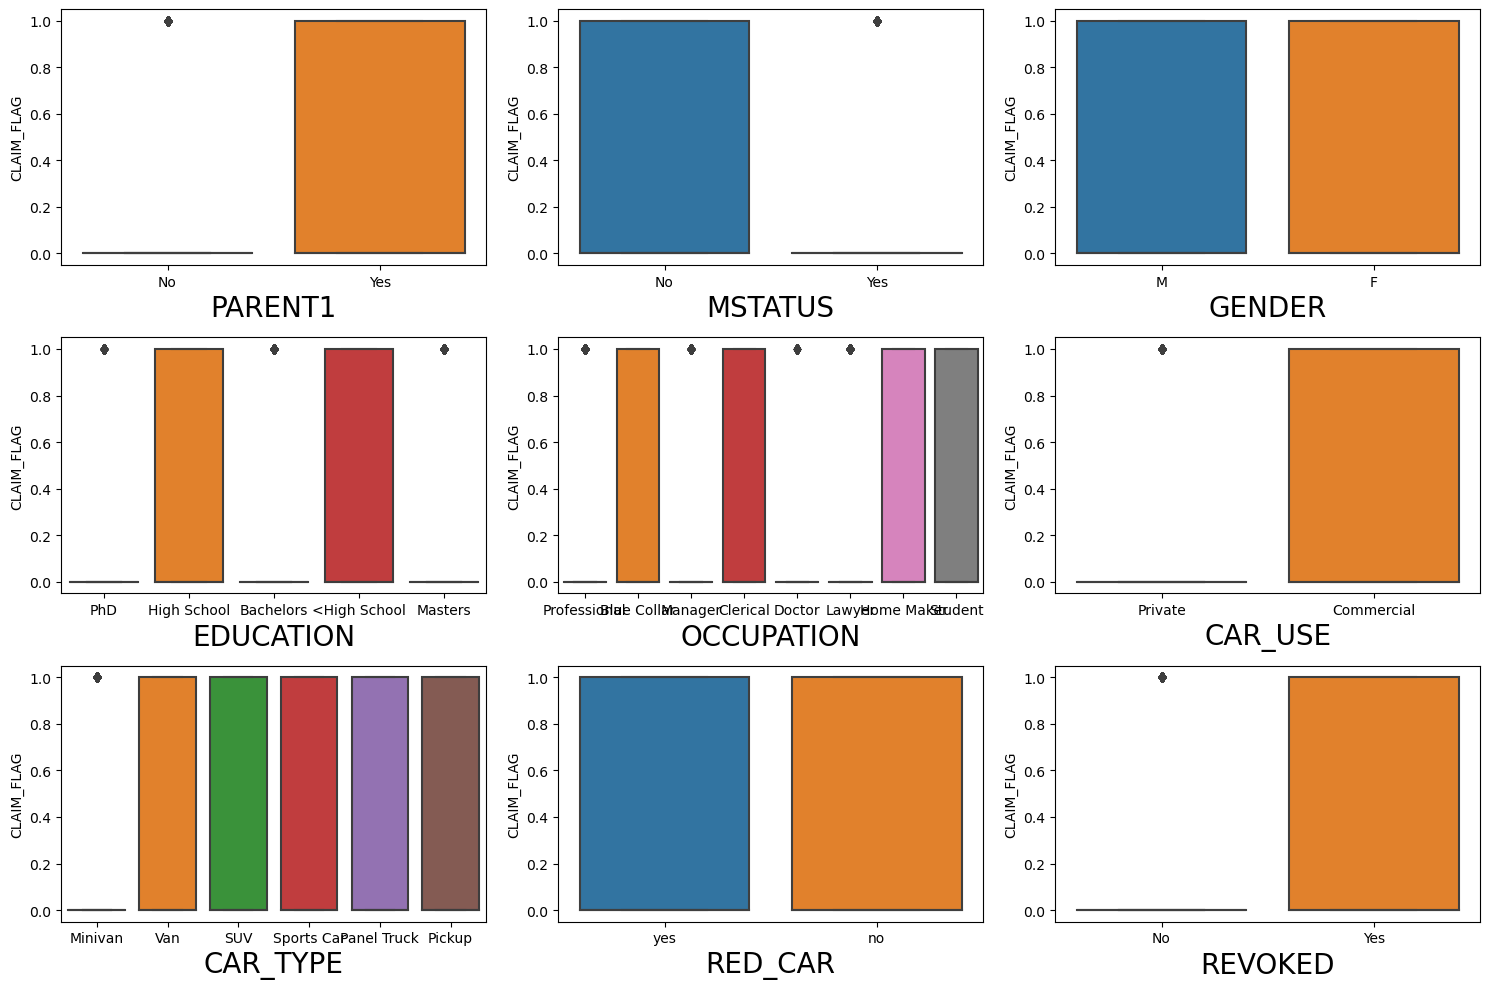

In [36]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for variable, subplot in zip(categoric_features, ax.flatten()):
    boxplt = sns.boxplot(x=variable, y='CLAIM_FLAG', data=data, ax=subplot)
    boxplt.set_xlabel(variable, fontsize = 20)
plt.tight_layout()   
plt.show() 

In [37]:
#plt.figure(figsize=(15, 8))
#ax = sns.boxplot(x=data['BIRTH'], y=data['CLM_FREQ'], data=data)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize = 10)
#plt.show()

### 10.Plotting numeric variables

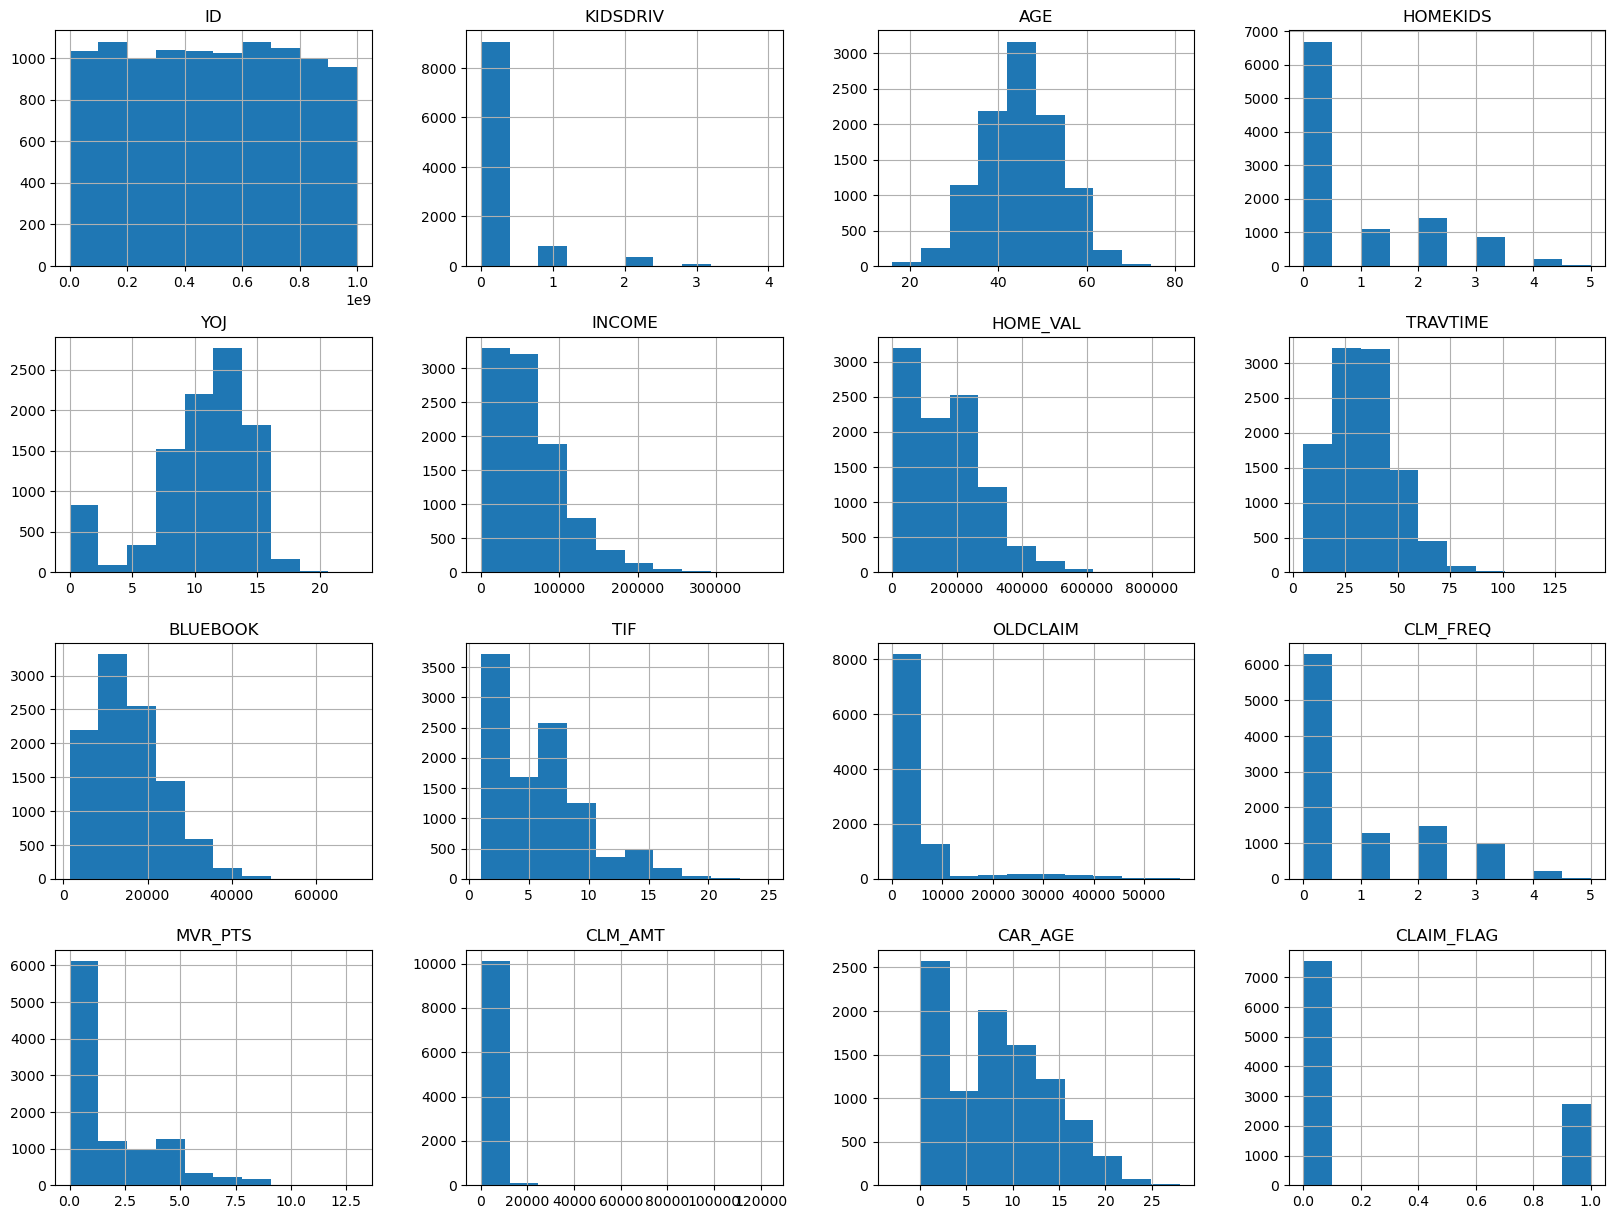

In [38]:
freqgraph=data.select_dtypes(include=['float','int'])
freqgraph.hist(figsize=(20,15))
plt.show()

### 11.Plotting Age Distribution

In [39]:
fig = px.histogram(data,x='AGE',marginal='box',nbins=30,title='DISTRIBUTION OF AGE')
fig.update_layout(bargap=0.2)
fig.show()

### 12.Plotting Claim Flag vs Income

Text(0.5, 1.0, 'INCOME')

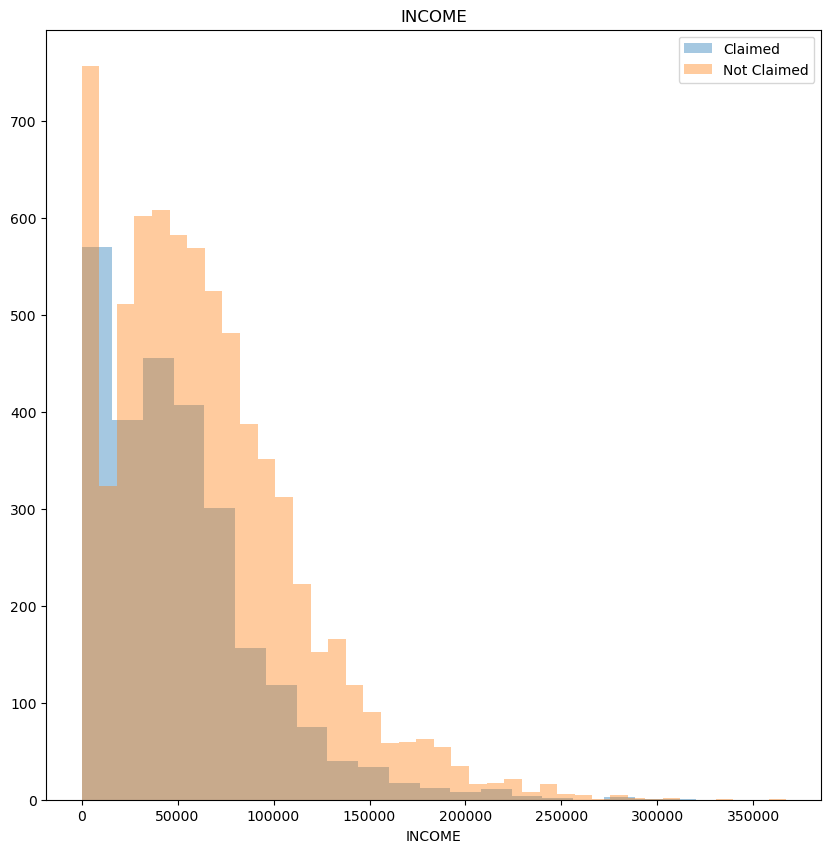

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10, 10))
ax = sns.distplot(data[data["CLAIM_FLAG"]==1]["INCOME"], bins=20, label = "Claimed", ax = axes, kde = False)
ax = sns.distplot(data[data["CLAIM_FLAG"]==0]["INCOME"], bins=40, label = "Not Claimed", ax = axes, kde = False)
ax.legend()
ax.set_title("INCOME")

Insurance is claimed mostly by people in range of income 0-50000 ie only few people of high income have claimed insurance

### 13.Box Plot of Income

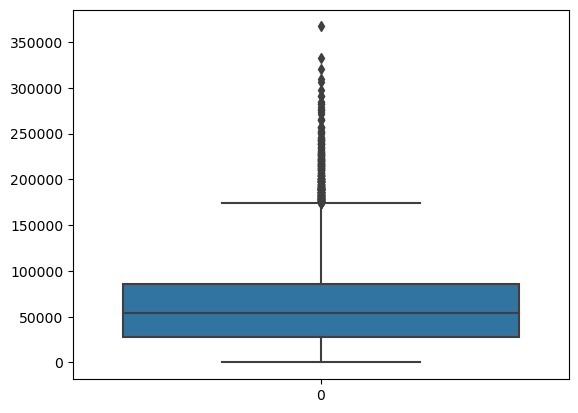

In [41]:
sns.boxplot(data.INCOME)
plt.show()

There seems to be few outliers in Income.

### 14.Bell-Curve of Income

1.1616696199725831


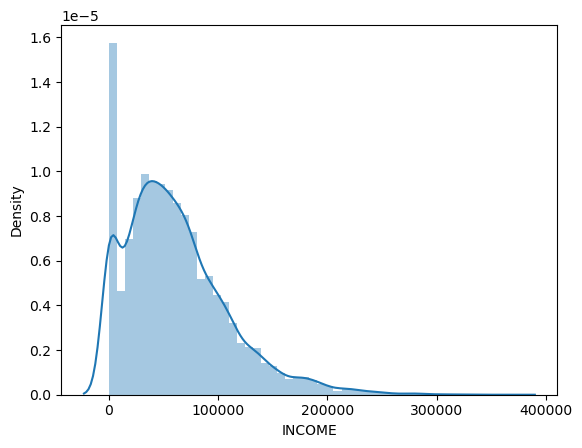

In [42]:
sns.distplot(data.INCOME)
print(data.INCOME.skew())

### 14.1 Bell-Curve of mean & median in Income

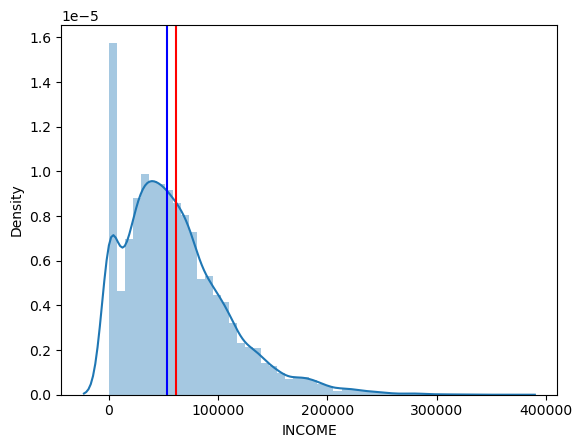

In [43]:
sns.distplot(data.INCOME)
plt.axvline(data.INCOME.mean(),color='r')
plt.axvline(data.INCOME.median(),color='b')
plt.show()

### 15.Violin Plot of Income

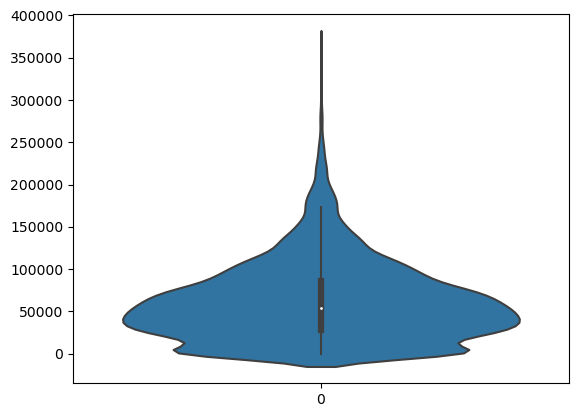

In [44]:
sns.violinplot(data.INCOME)
plt.show()

#### Age is less than 30 & Income greater than 40000

In [45]:
data[(data.AGE<30)&(data.INCOME>40000)]

ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ    INCOME PARENT1  \
24    235358484         0  22FEB71  28.0         1  13.0   44077.0      No   
134   106556153         0  04MAR73  26.0         0   8.0   53244.0      No   
306   180019907         0  03NOV70  29.0         1  11.0   51122.0      No   
322   514109893         0  08MAY74  25.0         1   9.0   51544.0     Yes   
325   695833713         0  11APR70  29.0         1   8.0   73842.0     Yes   
...         ...       ...      ...   ...       ...   ...       ...     ...   
9641  577969505         0  10DEC73  25.0         2  11.0   44516.0     Yes   
9719  203680274         0  18JUN71  28.0         4  16.0   68394.0      No   
9747  197331534         0  21JUL72  27.0         0  12.0   42254.0      No   
9915  604246933         0  24JUN71  28.0         1  12.0   64854.0      No   
9974  647329362         0  30NOV69  29.0         4  12.0  126263.0      No   

      HOME_VAL MSTATUS  ...    CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ REVOKED  \
24    170598.0     Yes  ...         SUV      no   8935.0         2      No   
134        0.0      No  ...         Van     yes   6224.0         1      No   
306   201650.0     Yes  ...         SUV      no  19030.0         3     Yes   
322        NaN      No  ...         SUV      no   7767.0         2      No   
325        0.0      No  ...  Sports Car      no   4769.0         1      No   
...        ...     ...  ...         ...     ...      ...       ...     ...   
9641       0.0      No  ...  Sports Car      no      0.0         0      No   
9719  226146.0     Yes  ...     Minivan      no   6013.0         2      No   
9747  138816.0      No  ...         SUV      no  32025.0         3     Yes   
9915  205489.0     Yes  ...     Minivan      no      0.0         0      No   
9974  319400.0     Yes  ...         SUV      no  26785.0         2     Yes   

      MVR_PTS  CLM_AMT CAR_AGE CLAIM_FLAG  URBANICITY  
24          0   6857.0     1.0          1       Urban  
134         1   4028.0     8.0          1       Urban  
306         9      0.0     9.0          0       Urban  
322         8   9776.0     1.0          1       Urban  
325         4   3418.0     1.0          1       Urban  
...       ...      ...     ...        ...         ...  
9641        0    864.0     1.0          1       Urban  
9719        8   4193.0     8.0          1       Urban  
9747        3   3790.0     6.0          1       Urban  
9915        0      0.0    11.0          0       Rural  
9974        0      0.0    13.0          0       Urban  

[138 rows x 27 columns]

### 16 Scatterplot of Age vs Income

In [46]:
#sns.scatterplot(data.AGE,data.INCOME,color='green')
#plt.show()

In [47]:
data.groupby(['GENDER'])['INCOME'].sum()

GENDER
F    295743475.0
M    303475942.0
Name: INCOME, dtype: float64

In [48]:
data.groupby(('URBANICITY'),['GENDER']=='M').max()

ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ    INCOME  \
URBANICITY                                                                 
Rural       998903843         4  31OCT58  76.0         5  19.0  282292.0   
Urban       999926368         4  31OCT73  81.0         5  23.0  367030.0   

           PARENT1  HOME_VAL MSTATUS  ... TIF CAR_TYPE  RED_CAR OLDCLAIM  \
URBANICITY                            ...                                  
Rural          Yes  583508.0     Yes  ...  25      Van      yes  50807.0   
Urban          Yes  885282.0     Yes  ...  25      Van      yes  57037.0   

            CLM_FREQ  REVOKED MVR_PTS   CLM_AMT  CAR_AGE  CLAIM_FLAG  
URBANICITY                                                            
Rural              4      Yes      13   64182.0     26.0           1  
Urban              5      Yes      13  123247.0     28.0           1  

[2 rows x 25 columns]

In [49]:
data.groupby(('CAR_TYPE'),['RED_CAR']=='yes').max()

ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ    INCOME  \
CAR_TYPE                                                                    
Minivan      999926368         3  31OCT73  80.0         5  23.0  367030.0   
Panel Truck  999457398         3  31OCT58  62.0         5  19.0  332339.0   
Pickup       999640290         4  31OCT69  68.0         5  19.0  309628.0   
SUV          999800537         4  31OCT59  72.0         5  19.0  264817.0   
Sports Car   999158340         4  31OCT68  81.0         5  23.0  253058.0   
Van          999091324         3  31OCT53  66.0         5  19.0  276354.0   

            PARENT1  HOME_VAL MSTATUS  ... TIF RED_CAR  OLDCLAIM CLM_FREQ  \
CAR_TYPE                               ...                                  
Minivan         Yes  885282.0     Yes  ...  25     yes   53986.0        5   
Panel Truck     Yes  750455.0     Yes  ...  21     yes   52507.0        5   
Pickup          Yes  669271.0     Yes  ...  22     yes   51345.0        5   
SUV             Yes  603984.0     Yes  ...  25     yes   52465.0        5   
Sports Car      Yes  550223.0     Yes  ...  21     yes   57037.0        5   
Van             Yes  630267.0     Yes  ...  21     yes   54399.0        5   

             REVOKED  MVR_PTS   CLM_AMT  CAR_AGE  CLAIM_FLAG URBANICITY  
CAR_TYPE                                                                 
Minivan          Yes       11   77907.0     26.0           1      Urban  
Panel Truck      Yes       11   78874.0     25.0           1      Urban  
Pickup           Yes       13  123247.0     24.0           1      Urban  
SUV              Yes       12   61678.0     25.0           1      Urban  
Sports Car       Yes       11   85524.0     25.0           1      Urban  
Van              Yes       11  107586.0     28.0           1      Urban  

[6 rows x 25 columns]

### 17 Scatterplot of Age vs Income based on Urban & Rural

In [50]:
#sns.scatterplot(data.AGE,data.INCOME,hue=data.URBANICITY)
#plt.show()

In [51]:
#g = sns.pairplot(data)

### 18. Data Preprocessing

### 18.1 Missing Values

* The concept of missing values is important to comprehend in order to efficiently manage data. 
* If the researcher, programmer, or academician does not properly handle the missing figures, he or she may get to the wrong conclusion about the data, which will have a significant impact on the modelling phase.
* It is a significant problem in data analysis since it has an impact on the outcomes.
* It’s difficult to have total faith in the insights when you know that several items are missing data.
* It may reduce the statistical power of research and lead to erroneous results owing to skewed estimates.

In [52]:
data.isna().sum()

ID              0
KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

* Most missing values are present in 'OCCUPATION' & least missing values are present in 'AGE' 

### 18.2 Handling Missing Values

7.2.1 Dropping the missing values

 Before deleting the missing values, we should be know the following concept. There are three types of missing values:
 * Missing Completely at Random (MCAR)- ignorable
 * Missing at Random (MAR) - ignorable
 * Missing Not at Random (MNAR) - Not ignorable

To delete/ignore the missing values, it should not be of last type-MNAR.

7.2.2 Imputing the missing values

By imputation, we mean to replace the missing or null values with a particular value in the entire dataset.

Imputation can be done using any of the below techniques–

 * Impute by mean
 * Impute by median
 * Knn Imputation

In [53]:
numeric_columns_with_null = ["YOJ", "INCOME", "HOME_VAL","CAR_AGE"]

In [54]:
##### We fill the numerical columns with mean imputation

for col in numeric_columns_with_null:
    data[col] = data[col].fillna(data[col].median())

In [55]:
data['AGE']=data['AGE'].fillna(data['AGE'].mean())

In [56]:
categorical_columns_with_null = ["OCCUPATION"]

In [57]:
###### OCCUPATION is categorical column so we fill it with Mode Imputation

data['OCCUPATION'].value_counts()

Blue Collar     2288
Clerical        1590
Professional    1408
Manager         1257
Lawyer          1031
Student          899
Home Maker       843
Doctor           321
Name: OCCUPATION, dtype: int64

In [58]:
data['OCCUPATION'].mode()

0    Blue Collar
Name: OCCUPATION, dtype: object

In [59]:
data['OCCUPATION'].fillna(data['OCCUPATION'].mode()[0],inplace=True)

In [60]:
data.isna().sum()

ID            0
KIDSDRIV      0
BIRTH         0
AGE           0
HOMEKIDS      0
YOJ           0
INCOME        0
PARENT1       0
HOME_VAL      0
MSTATUS       0
GENDER        0
EDUCATION     0
OCCUPATION    0
TRAVTIME      0
CAR_USE       0
BLUEBOOK      0
TIF           0
CAR_TYPE      0
RED_CAR       0
OLDCLAIM      0
CLM_FREQ      0
REVOKED       0
MVR_PTS       0
CLM_AMT       0
CAR_AGE       0
CLAIM_FLAG    0
URBANICITY    0
dtype: int64

### 18.3 Detecting Outliers using Boxplot

### 18.3.1 Outliers
* In a random sampling from a population, an outlier is defined as an observation that deviates abnormally from the standard data. 

* In simple words, an outlier is used to define those data values which are far away from the general values in a dataset. 

* An outlier can be broken down into out-of-line data.

* Box plots are a simple way to visualize data through quantiles and detect outliers. 

* IQR(Interquartile Range) is the basic mathematics behind boxplots. 

* The top and bottom whiskers can be understood as the boundaries of data, and any data lying outside it will be an outlier.

* Outliers can lead to vague or misleading predictions while using machine learning models.

* Specific models like linear regression, logistic regression, and support vector machines are susceptible to outliers.

* Outliers decrease the mathematical power of these models, and thus the output of the models becomes unreliable.

* However, outliers are highly subjective to the dataset. Some outliers may portray extreme changes in the data as well.

### 18.3.2 Detection of Outliers

Removing and modifying the outliers using statistical detection techniques is a widely followed method. 
Some of these techniques are:

* Z-Score

* Density-based spatial clustering

* Regression Analysis

* Proximity-based clustering

* IQR Scores ( IQR = (75th quartile/percentile – 25th quartile/percentile) )

### 18.3.3 Finding outliers using statistical methods

* Since the data doesn’t follow a normal distribution, we will calculate the outlier data points using the statistical method    called interquartile range (IQR) instead of using Z-score.
* Using the IQR, the outlier data points are the ones falling below Q1–1.5 IQR or above Q3 + 1.5 IQR. 
* The Q1 is the 25th percentile and Q3 is the 75th percentile of the dataset, and IQR represents the interquartile range calculated by Q3 minus Q1 (Q3–Q1). 

### 18.3.4 Capping Outliers using IQR Ranges

* Trimming outliers altogether may result in the removal of a large number of records from your dataset which isn’t desirable in some cases since columns other than the ones containing the outlier values may contain useful information.

* In such cases, you can use outlier capping to replace the outlier values with a maximum or minimum capped values.

* You can replace outlier values by the upper and lower limit calculated using the IQR range in the last section.

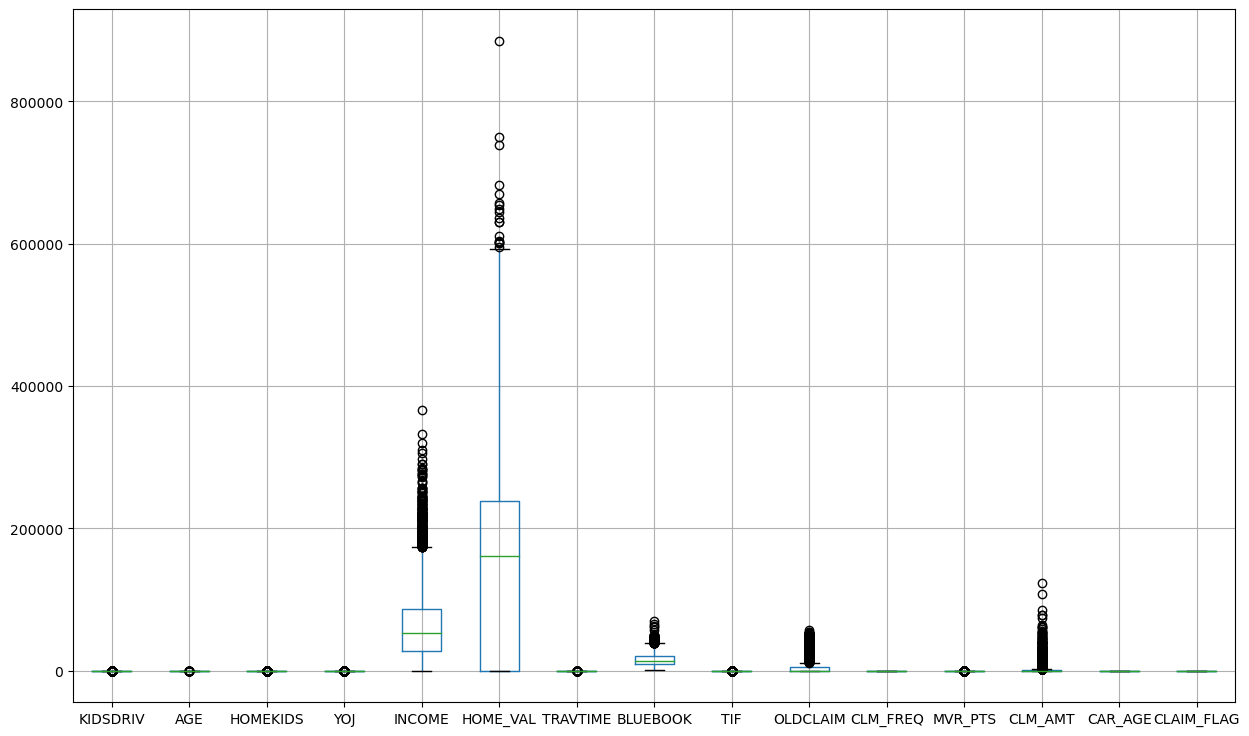

In [61]:
plt.rcParams['figure.figsize']=(15,9)
numeric_features.boxplot(column = ['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'HOME_VAL', 'TRAVTIME',
       'BLUEBOOK', 'TIF', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS', 'CLM_AMT',
       'CAR_AGE', 'CLAIM_FLAG'])
plt.show()

Text(0.5, 1.0, 'KIDSDRIV')

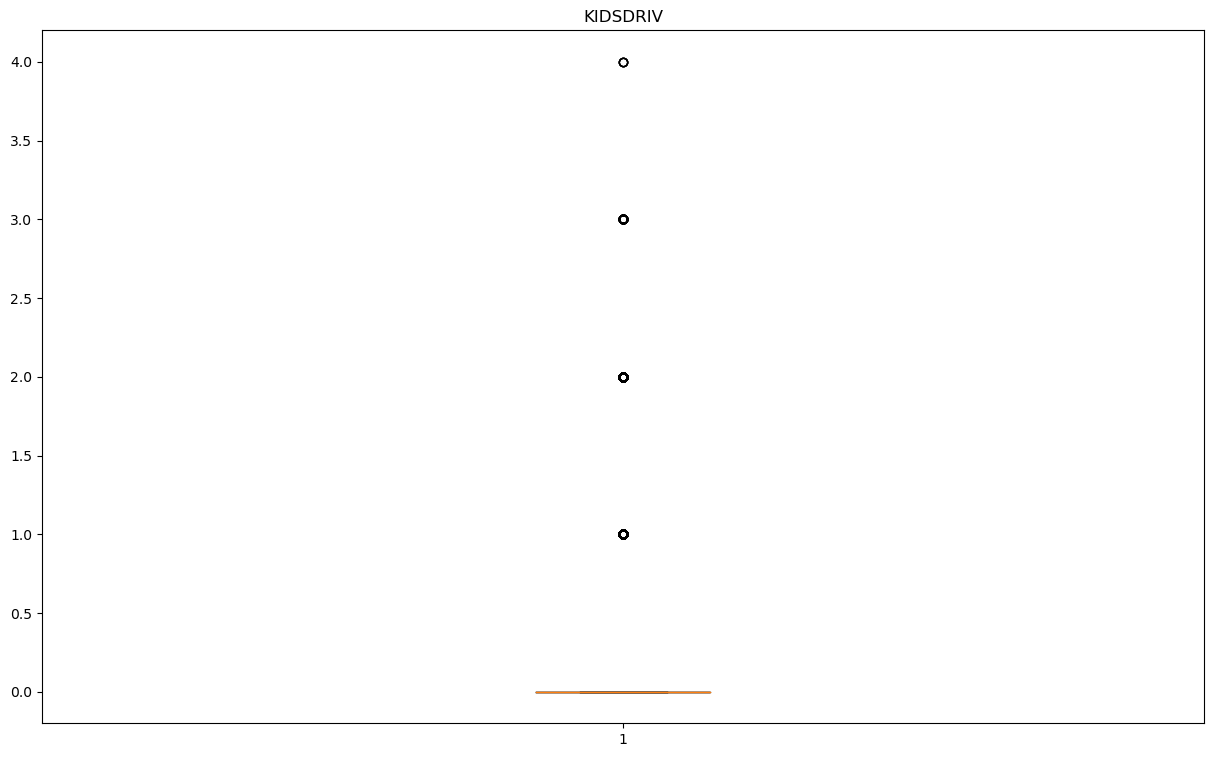

In [62]:
plt.boxplot(data['KIDSDRIV'])
plt.title('KIDSDRIV')

In [63]:
Q1=np.percentile(data['KIDSDRIV'],25,interpolation='midpoint')
Q2=np.percentile(data['KIDSDRIV'],50,interpolation='midpoint')
Q3=np.percentile(data['KIDSDRIV'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
0.0


In [64]:
data['KIDSDRIV'].median()

0.0

In [65]:
IQR=Q3-Q1
IQR

0.0

In [66]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

0.0
0.0


In [67]:
# find the outliers
data.loc[(data['KIDSDRIV'] > upper_limit) | (data['KIDSDRIV'] < lower_limit)]

ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ    INCOME PARENT1  \
8        7945239         1  17SEP59  40.0         1  11.0   50815.0     Yes   
10     892208080         1  14DEC61  37.0         2  11.0  107961.0      No   
28     254362485         2  06JUL55  44.0         2   0.0       0.0      No   
33     146989842         1  09APR55  44.0         2  17.0   45488.0      No   
38     294816298         2  03AUG63  36.0         2  12.0  130540.0     Yes   
...          ...       ...      ...   ...       ...   ...       ...     ...   
10270  465491963         2  03NOV58  41.0         3  12.0    9991.0     Yes   
10272   24974672         1  29AUG53  46.0         0  10.0   84667.0      No   
10291     813128         1  14FEB53  46.0         0  12.0   45018.0      No   
10294  721196389         1  18OCT61  38.0         4  16.0   12717.0      No   
10297   67790126         1  13AUG54  45.0         2   9.0  164669.0      No   

       HOME_VAL MSTATUS  ...     CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ REVOKED  \
8           0.0      No  ...      Minivan      no   3295.0         1      No   
10     333680.0     Yes  ...          Van     yes   2374.0         1     Yes   
28      82344.0     Yes  ...          SUV      no   3338.0         3      No   
33     219378.0     Yes  ...      Minivan      no      0.0         0      No   
38     344195.0      No  ...      Minivan      no      0.0         0      No   
...         ...     ...  ...          ...     ...      ...       ...     ...   
10270       0.0      No  ...          SUV      no      0.0         0      No   
10272  236725.0     Yes  ...  Panel Truck      no      0.0         0      No   
10291       0.0      No  ...      Minivan      no  33026.0         3      No   
10294       0.0     Yes  ...       Pickup      no   9245.0         3      No   
10297  386273.0     Yes  ...      Minivan      no      0.0         0      No   

       MVR_PTS  CLM_AMT CAR_AGE CLAIM_FLAG  URBANICITY  
8            2   6477.0     1.0          1       Urban  
10          10   4021.0     7.0          1       Urban  
28           0      0.0    11.0          0       Urban  
33           0      0.0    12.0          0       Urban  
38           0      0.0     9.0          0       Rural  
...        ...      ...     ...        ...         ...  
10270        0      0.0     9.0          0       Rural  
10272        0      0.0     7.0          0       Urban  
10291        0      0.0     1.0          0       Rural  
10294        3      0.0    15.0          0       Urban  
10297        2      0.0    17.0          0       Urban  

[1233 rows x 27 columns]

In [68]:
# capping - change the outlier values to upper (or) lower limit values
new_data = data.copy()
new_data.loc[(new_data['KIDSDRIV']>upper_limit), 'KIDSDRIV'] = upper_limit
new_data.loc[(new_data['KIDSDRIV']<lower_limit), 'KIDSDRIV'] = lower_limit

Text(0.5, 1.0, 'KIDSDRIV')

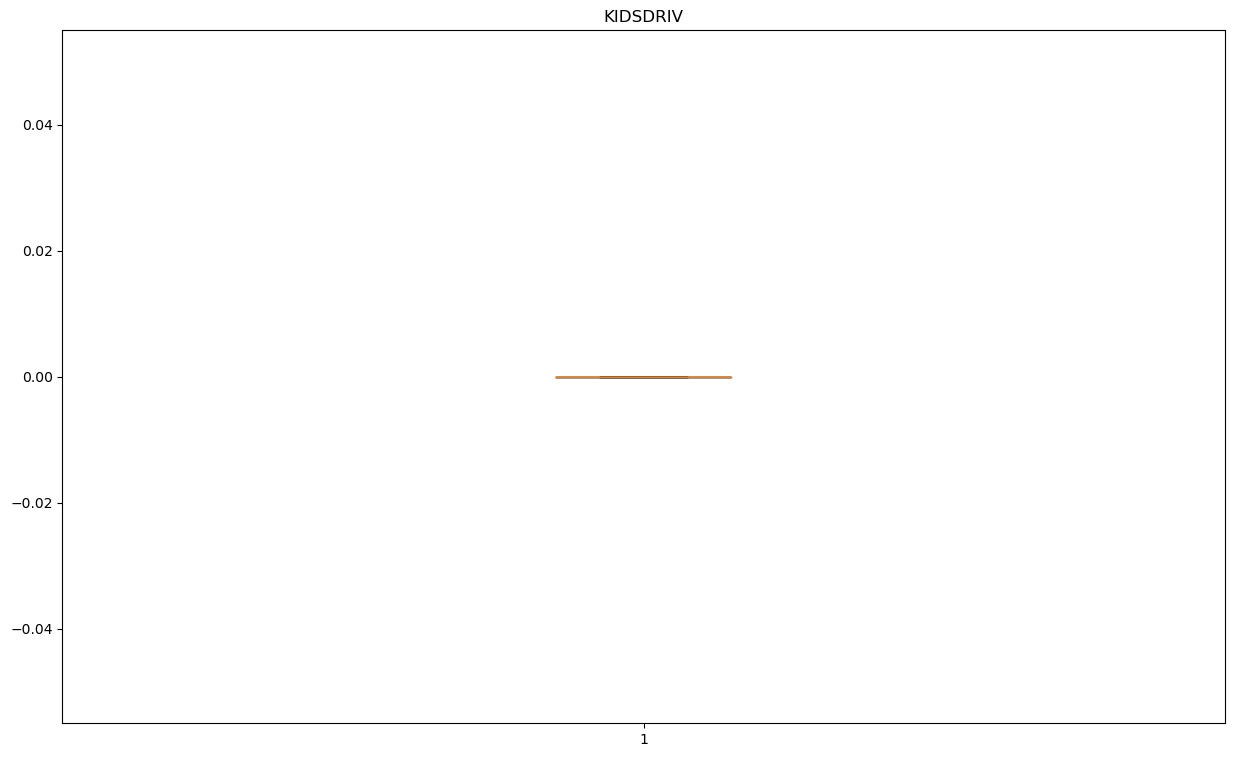

In [69]:
plt.boxplot(new_data['KIDSDRIV'])
plt.title('KIDSDRIV')

Text(0.5, 1.0, 'TRAVTIME')

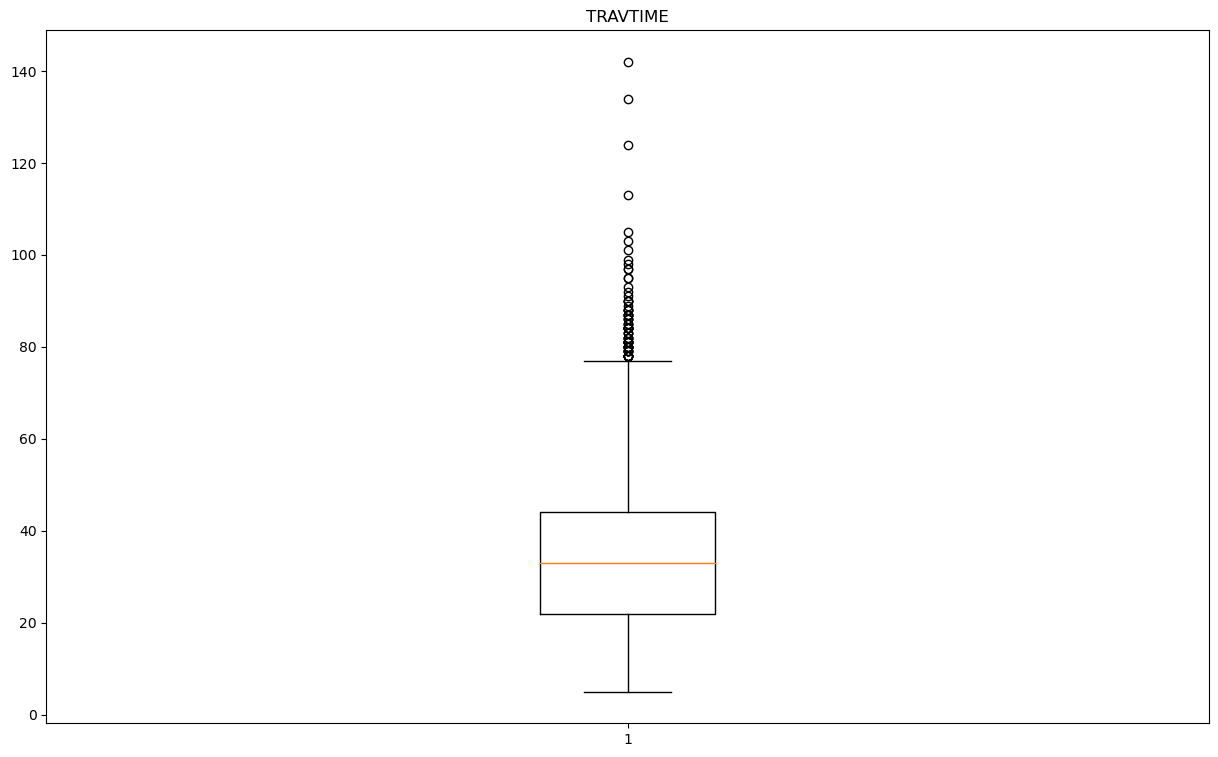

In [70]:
plt.boxplot(data['TRAVTIME'])
plt.title('TRAVTIME')

In [71]:
Q1=np.percentile(data['TRAVTIME'],25,interpolation='midpoint')
Q2=np.percentile(data['TRAVTIME'],50,interpolation='midpoint')
Q3=np.percentile(data['TRAVTIME'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

22.0
33.0
44.0


In [72]:
IQR=Q3-Q1
IQR

22.0

In [73]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

-11.0
77.0


In [74]:
# find the outliers
data.loc[(data['TRAVTIME'] > upper_limit) | (data['TRAVTIME'] < lower_limit)]

ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ    INCOME PARENT1  \
260    330583611         0  29OCT66  33.0         1  11.0   86187.0     Yes   
272     17880810         0  20AUG45  54.0         0  11.0   44782.0      No   
314    142840345         2  10APR48  51.0         2  14.0   62894.0      No   
658     33286578         1  25NOV55  43.0         2  13.0   45784.0      No   
764    249923796         2  15NOV59  40.0         2  13.0   45777.0      No   
...          ...       ...      ...   ...       ...   ...       ...     ...   
9666   468883916         0  08MAY23  76.0         0  15.0   46927.0      No   
9675   459231441         0  19OCT55  44.0         0  12.0  126608.0      No   
10017  714870833         0  18JAN54  45.0         0   7.0   61598.0      No   
10133  211941702         0  21JUL58  41.0         2  17.0     666.0      No   
10208  601051854         1  06MAY54  45.0         2  15.0   59763.0     Yes   

       HOME_VAL MSTATUS  ...    CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ REVOKED  \
260    241285.0      No  ...     Minivan      no      0.0         0      No   
272    148676.0      No  ...         SUV      no      0.0         0      No   
314    228994.0     Yes  ...  Sports Car      no      0.0         0     Yes   
658    165388.0     Yes  ...     Minivan      no      0.0         0      No   
764    199049.0     Yes  ...         Van     yes      0.0         0      No   
...         ...     ...  ...         ...     ...      ...       ...     ...   
9666        0.0      No  ...     Minivan     yes      0.0         0      No   
9675   354910.0     Yes  ...         SUV      no   9869.0         1      No   
10017  202760.0     Yes  ...         SUV      no      0.0         0      No   
10133       0.0     Yes  ...  Sports Car      no      0.0         0      No   
10208  193504.0      No  ...      Pickup     yes  12751.0         3     Yes   

       MVR_PTS  CLM_AMT CAR_AGE CLAIM_FLAG  URBANICITY  
260          1      0.0     5.0          0       Rural  
272          0   5259.0     9.0          1       Urban  
314          0      0.0    10.0          0       Rural  
658          0      0.0     6.0          0       Urban  
764          4      0.0    11.0          0       Rural  
...        ...      ...     ...        ...         ...  
9666         5   3589.0    15.0          1       Rural  
9675         3      0.0     8.0          0       Urban  
10017        0      0.0     8.0          0       Rural  
10133        0      0.0     7.0          0       Rural  
10208        2   1699.0     8.0          1       Urban  

[80 rows x 27 columns]

In [75]:
# capping - change the outlier values to upper (or) lower limit values
new_data = data.copy()
new_data.loc[(new_data['TRAVTIME']>upper_limit), 'TRAVTIME'] = upper_limit
new_data.loc[(new_data['TRAVTIME']<lower_limit), 'TRAVTIME'] = lower_limit

Text(0.5, 1.0, 'TRAVTIME')

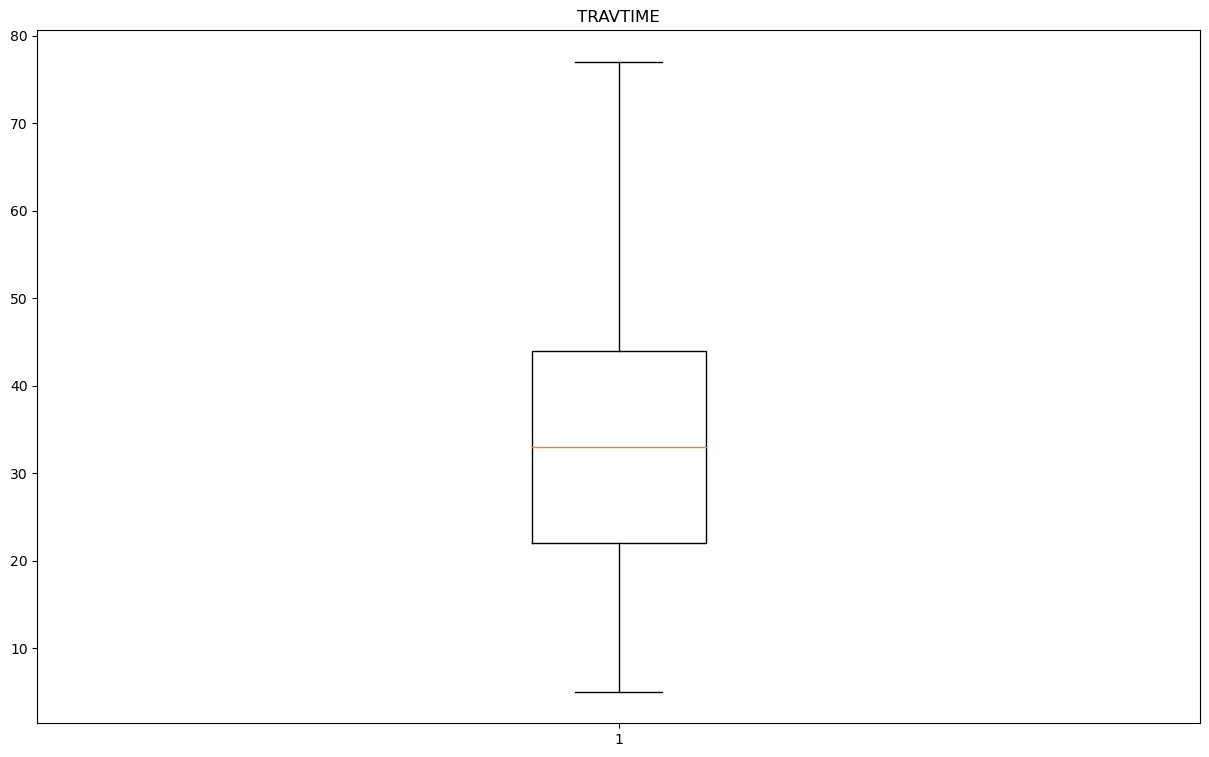

In [76]:
plt.boxplot(new_data['TRAVTIME'])
plt.title('TRAVTIME')

Text(0.5, 1.0, 'AGE')

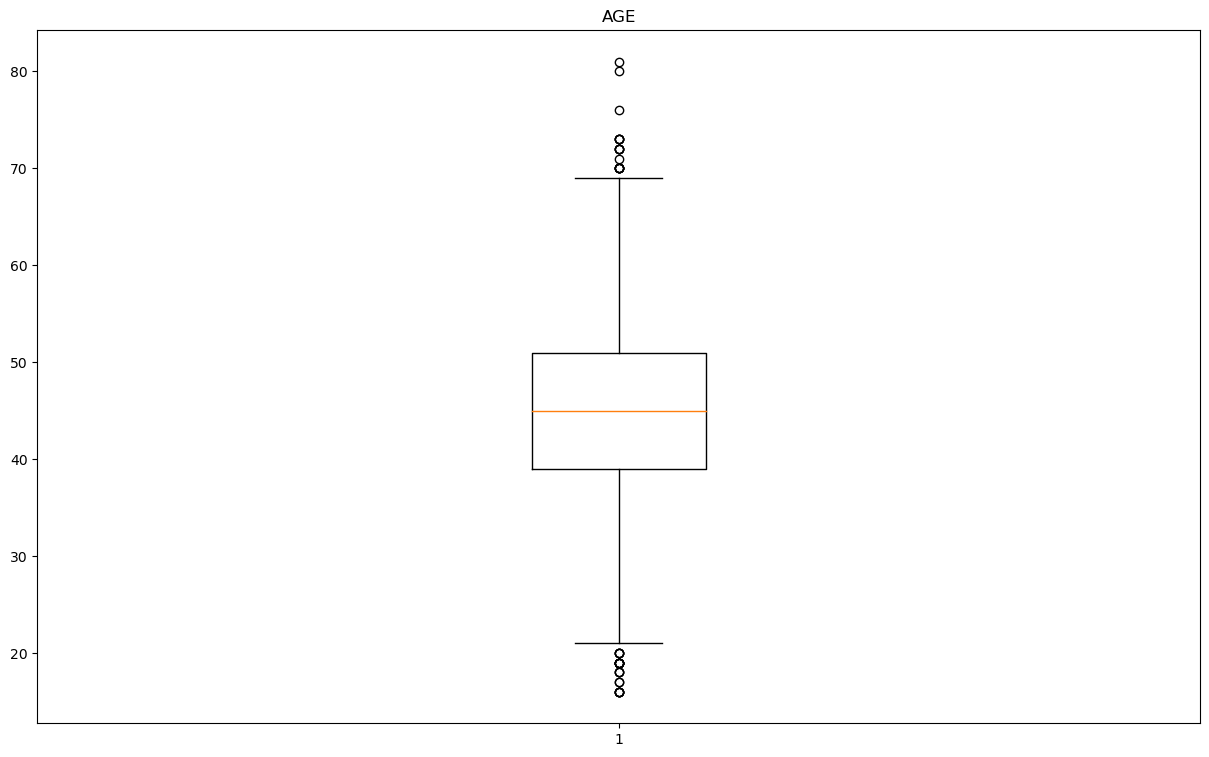

In [77]:
plt.boxplot(new_data['AGE'])
plt.title('AGE')

In [78]:
Q1=np.percentile(data['AGE'],25,interpolation='midpoint')
Q2=np.percentile(data['AGE'],50,interpolation='midpoint')
Q3=np.percentile(data['AGE'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

39.0
45.0
51.0


In [79]:
IQR=Q3-Q1
IQR

12.0

In [80]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

21.0
69.0


In [81]:
# find the outliers
data.loc[(data['AGE'] > upper_limit) | (data['AGE'] < lower_limit)]

ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ    INCOME PARENT1  \
188    493235037         0  04JUL19  80.0         2  23.0   97716.0      No   
427    206553302         0  02JAN79  20.0         0   7.0   19933.0      No   
454    294081063         0  05MAY80  19.0         2   0.0       0.0      No   
468    694149775         1  17JUL27  72.0         2  18.0   27625.0      No   
644    837151081         0  04JUN27  72.0         0  16.0   63890.0      No   
1049   335505768         0  03SEP29  70.0         0  14.0   12280.0      No   
1520   997877278         0  07MAY29  70.0         0  16.0   62304.0      No   
1727   953041750         0  18AUG82  17.0         1   0.0   53529.0     Yes   
1766   366938875         0  05DEC26  72.0         0  13.0  100995.0      No   
2023   447025309         0  15JUN80  19.0         4  14.0    1774.0      No   
2861   283591503         0  18OCT83  16.0         1   0.0       0.0     Yes   
2986   587255384         0  07JUL83  16.0         0  11.0   49522.0      No   
2994   587255384         0  07JUL82  17.0         0   6.0   40015.0      No   
3031   493235037         0  04JUL18  81.0         2  23.0  109275.0      No   
3400   201054523         0  11OCT26  73.0         0  14.0  164088.0      No   
3669    92691593         0  19OCT83  16.0         0  10.0   50100.0      No   
4040    21872625         0  29NOV25  73.0         3  11.0  116520.0      No   
4520   241778827         0  14NOV28  71.0         0  11.0   53529.0      No   
4746   335621030         4  06NOV29  70.0         4  18.0   48622.0      No   
5224   805276249         0  26MAR79  20.0         0   8.0    4209.0      No   
5891   543743935         0  16MAR81  18.0         0   0.0       0.0      No   
5899   924982877         0  10JUL79  20.0         0  10.0   38681.0      No   
5994   311416263         0  13JUN80  19.0         0   6.0    5336.0      No   
6328   128827399         0  12JUL80  19.0         0   5.0    3871.0      No   
6852   781268892         0  26APR81  18.0         2  14.0     479.0      No   
7085   887417708         0  03AUG26  73.0         0   6.0   62664.0      No   
7377   128827399         0  12JUL80  19.0         0   5.0    3871.0      No   
7419   502111889         0  13NOV81  18.0         2   9.0    6284.0     Yes   
7742   203404166         0  12JUN80  19.0         3  11.0    5228.0     Yes   
7932   977988662         0  04AUG79  20.0         2   0.0       0.0      No   
8278   502111889         0  13NOV80  19.0         2   9.0    6284.0     Yes   
8393   543932507         0  12MAR26  73.0         0  15.0    1773.0      No   
8932   463876700         0  21JAN29  70.0         0  17.0   53529.0      No   
9107   298571479         0  22MAY80  19.0         1   8.0   37536.0     Yes   
9126   536756491         0  19JAN29  70.0         0  14.0   78170.0      No   
9486   463876700         0  21JAN29  70.0         0  17.0   53529.0      No   
9666   468883916         0  08MAY23  76.0         0  15.0   46927.0      No   
9830   115937071         0  29OCT83  16.0         3  11.0   11719.0      No   
9967   617447600         0  20SEP27  72.0         0  16.0   56313.0      No   
10196  283591503         0  18OCT83  16.0         1  11.0       0.0     Yes   

       HOME_VAL MSTATUS  ...     CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ REVOKED  \
188    389344.0     Yes  ...      Minivan     yes      0.0         0      No   
427    105715.0      No  ...          SUV     yes   4148.0         1      No   
454    106041.0     Yes  ...          SUV      no   5289.0         2      No   
468    162415.0     Yes  ...   Sports Car      no   8571.0         1      No   
644    256797.0     Yes  ...   Sports Car      no   4448.0         3      No   
1049        0.0      No  ...          SUV      no   2080.0         1      No   
1520   214707.0     Yes  ...   Sports Car      no   4346.0         4      No   
1727   160661.0      No  ...          Van     yes   4373.0         2      No   
1766   295292.0     Yes  ...          SUV     yes     

In [82]:
# capping - change the outlier values to upper (or) lower limit values
new_data = data.copy()
new_data.loc[(new_data['AGE']>upper_limit), 'AGE'] = upper_limit
new_data.loc[(new_data['AGE']<lower_limit), 'AGE'] = lower_limit

Text(0.5, 1.0, 'AGE')

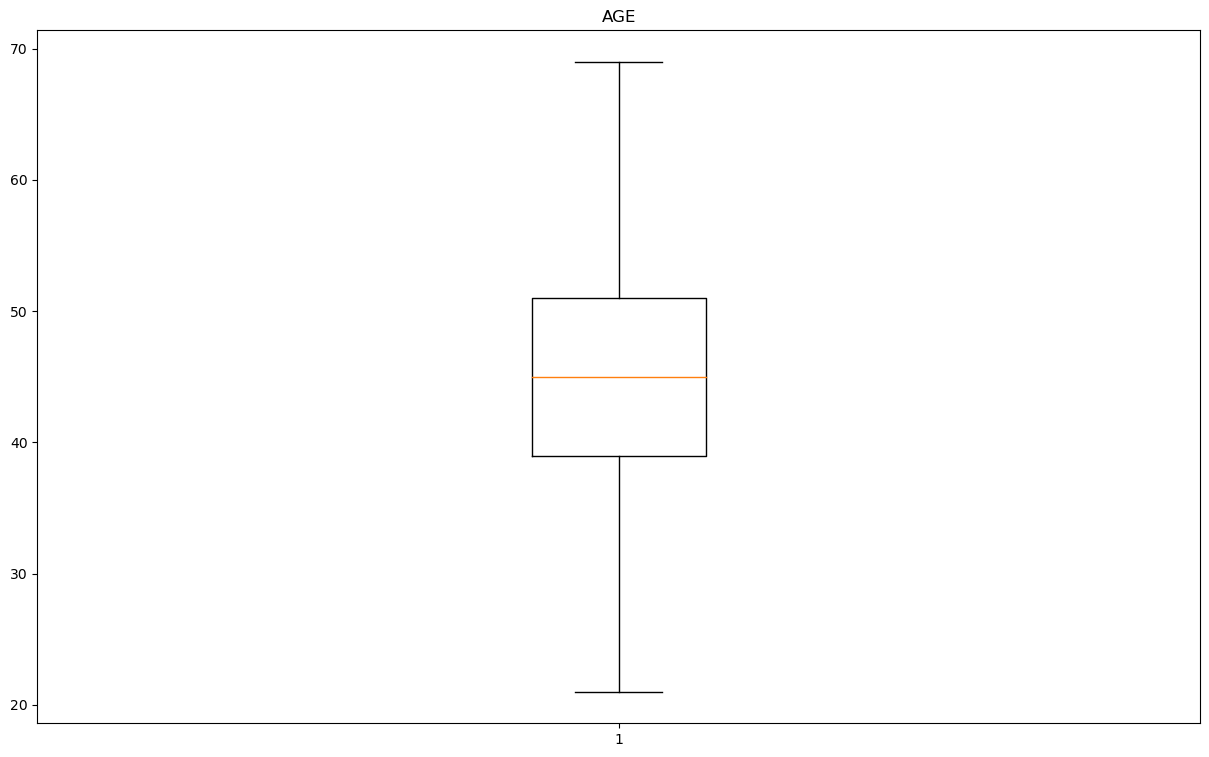

In [83]:
plt.boxplot(new_data['AGE'])
plt.title('AGE')

Text(0.5, 1.0, 'HOMEKIDS')

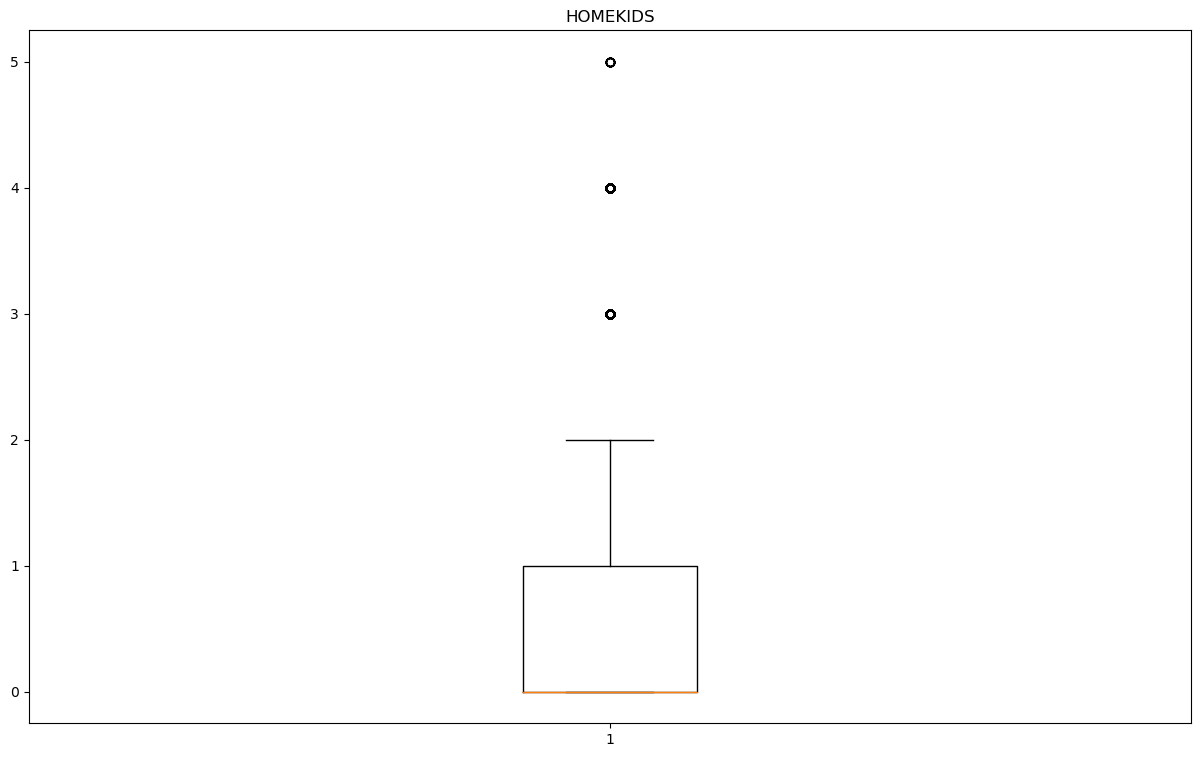

In [84]:
plt.boxplot(data['HOMEKIDS'])
plt.title('HOMEKIDS')

In [85]:
Q1=np.percentile(data['HOMEKIDS'],25,interpolation='midpoint')
Q2=np.percentile(data['HOMEKIDS'],50,interpolation='midpoint')
Q3=np.percentile(data['HOMEKIDS'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [86]:
IQR=Q3-Q1
IQR

1.0

In [87]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

-1.5
2.5


In [88]:
# find the outliers
data.loc[(data['HOMEKIDS'] > upper_limit) | (data['HOMEKIDS'] < lower_limit)]

ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ   INCOME PARENT1  \
19     140015922         0  06AUG60  39.0         3  12.0  51884.0     Yes   
22     627708979         0  14SEP65  34.0         3  13.0  34019.0      No   
56     680782638         0  05JUN60  39.0         3   7.0  34046.0      No   
57     883604551         0  20MAY66  33.0         3  14.0  32364.0      No   
63     840809480         0  29JUN63  36.0         3  12.0  56048.0      No   
...          ...       ...      ...   ...       ...   ...      ...     ...   
10236  305778610         0  05JUL64  35.0         3  14.0  50971.0      No   
10255  506098199         0  02MAR43  56.0         3  11.0  90186.0      No   
10270  465491963         2  03NOV58  41.0         3  12.0   9991.0     Yes   
10283  527126964         0  13JAN61  38.0         3   8.0  83458.0     Yes   
10294  721196389         1  18OCT61  38.0         4  16.0  12717.0      No   

       HOME_VAL MSTATUS  ...    CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ REVOKED  \
19     180951.0      No  ...         SUV      no      0.0         0      No   
22      91875.0     Yes  ...         SUV      no      0.0         0      No   
56     183383.0     Yes  ...         SUV      no      0.0         0      No   
57     152894.0     Yes  ...     Minivan     yes      0.0         0      No   
63     137836.0     Yes  ...     Minivan      no   2045.0         2      No   
...         ...     ...  ...         ...     ...      ...       ...     ...   
10236  183050.0     Yes  ...         SUV      no    518.0         1      No   
10255  278241.0     Yes  ...     Minivan     yes      0.0         0      No   
10270       0.0      No  ...         SUV      no      0.0         0      No   
10283  232182.0      No  ...  Sports Car      no   9298.0         2      No   
10294       0.0     Yes  ...      Pickup      no   9245.0         3      No   

       MVR_PTS  CLM_AMT CAR_AGE CLAIM_FLAG  URBANICITY  
19           0      0.0    13.0          0       Rural  
22           0      0.0    20.0          0       Urban  
56           0      0.0     5.0          0       Rural  
57           3      0.0     1.0          0       Urban  
63           2      0.0    16.0          0       Urban  
...        ...      ...     ...        ...         ...  
10236        1      0.0    13.0          0       Urban  
10255        0      0.0    20.0          0       Urban  
10270        0      0.0     9.0          0       Rural  
10283        3      0.0     9.0          0       Urban  
10294        3      0.0    15.0          0       Urban  

[1075 rows x 27 columns]

In [89]:
# capping - change the outlier values to upper (or) lower limit values
new_data = data.copy()
new_data.loc[(new_data['HOMEKIDS']>upper_limit), 'HOMEKIDS'] = upper_limit
new_data.loc[(new_data['HOMEKIDS']<lower_limit), 'HOMEKIDS'] = lower_limit

Text(0.5, 1.0, 'HOMEKIDS')

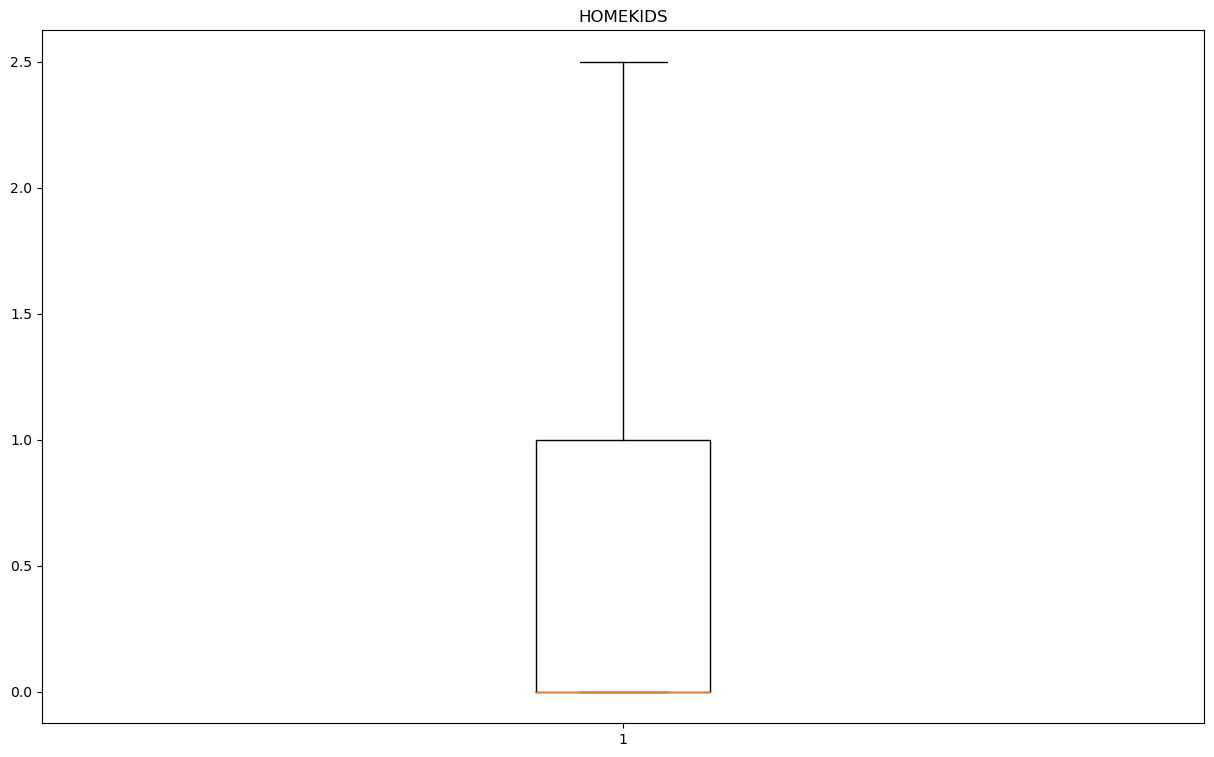

In [90]:
plt.boxplot(new_data['HOMEKIDS'])
plt.title('HOMEKIDS')

Text(0.5, 1.0, 'INCOME')

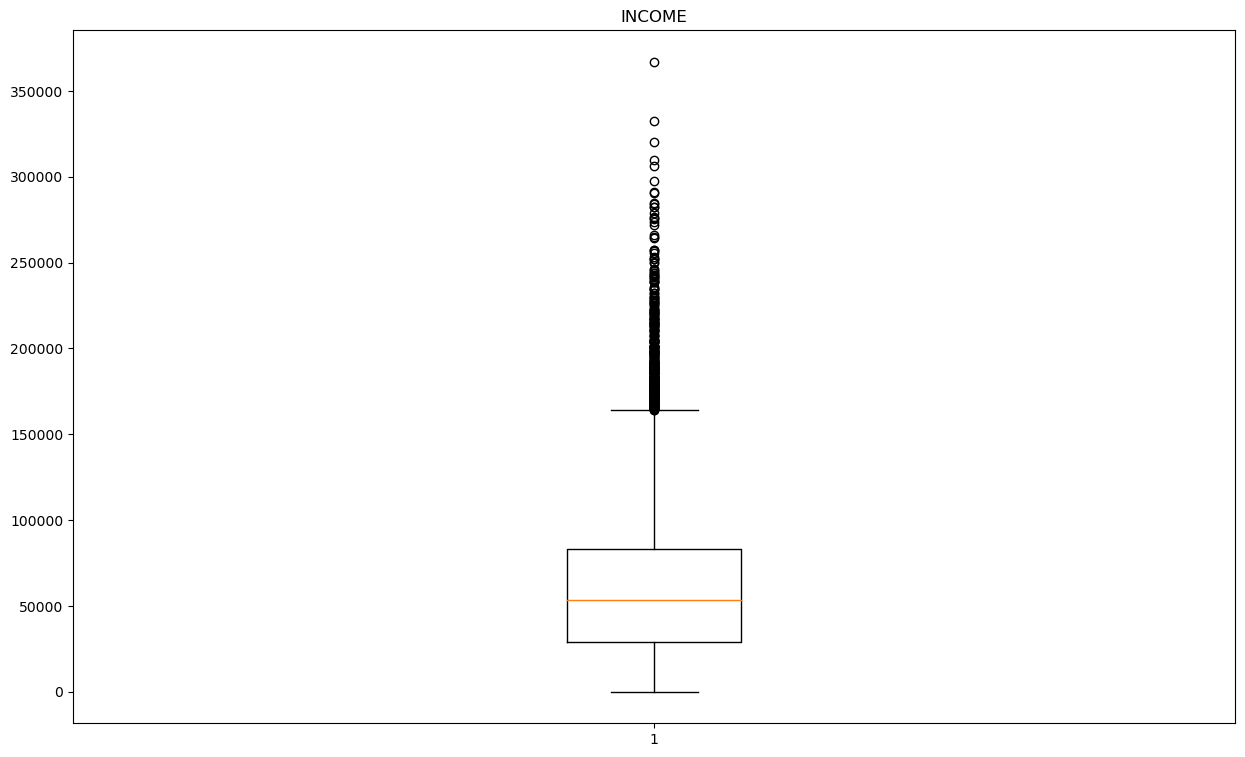

In [91]:
plt.boxplot(data['INCOME'])
plt.title('INCOME')

In [92]:
Q1=np.percentile(data['INCOME'],25,interpolation='midpoint')
Q2=np.percentile(data['INCOME'],50,interpolation='midpoint')
Q3=np.percentile(data['INCOME'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

29168.5
53529.0
83228.5


In [93]:
IQR=Q3-Q1
IQR

54060.0

In [94]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

-51921.5
164318.5


In [95]:
data.loc[(data['INCOME'] > upper_limit) | (data['INCOME'] < lower_limit)]

ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ    INCOME PARENT1  \
46     745183922         0  30JUN49  50.0         0   8.0  167469.0      No   
79     396323054         0  03DEC53  45.0         1  11.0  185836.0      No   
128    993272296         0  26JUL43  56.0         2  14.0  192089.0      No   
299    496107895         0  30APR49  50.0         0  10.0  219024.0      No   
372    865934369         0  27FEB53  46.0         0  13.0  266027.0      No   
...          ...       ...      ...   ...       ...   ...       ...     ...   
10175  690451948         0  25FEB52  47.0         0  12.0  221995.0      No   
10182  391162157         0  22SEP56  43.0         0  11.0  229983.0      No   
10251  109360256         1  14APR43  56.0         2  14.0  176849.0      No   
10262  118564133         0  26FEB52  47.0         0  13.0  282198.0      No   
10297   67790126         1  13AUG54  45.0         2   9.0  164669.0      No   

       HOME_VAL MSTATUS  ...     CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ REVOKED  \
46          0.0      No  ...   Sports Car      no      0.0         0      No   
79     509115.0     Yes  ...          SUV      no   4307.0         3      No   
128    471701.0     Yes  ...          Van     yes      0.0         0      No   
299         0.0      No  ...  Panel Truck     yes   4117.0         2      No   
372         0.0      No  ...  Panel Truck     yes   1332.0         3      No   
...         ...     ...  ...          ...     ...      ...       ...     ...   
10175  545044.0     Yes  ...          SUV      no   6682.0         3      No   
10182       0.0      No  ...  Panel Truck     yes   8983.0         2      No   
10251  430830.0     Yes  ...          SUV      no      0.0         0      No   
10262  649247.0      No  ...  Panel Truck     yes      0.0         0     Yes   
10297  386273.0     Yes  ...      Minivan      no      0.0         0      No   

       MVR_PTS  CLM_AMT CAR_AGE CLAIM_FLAG  URBANICITY  
46           3      0.0     1.0          0       Urban  
79           6      0.0    20.0          0       Urban  
128          0   6484.0     8.0          1       Urban  
299          4      0.0    20.0          0       Urban  
372          6      0.0    23.0          0       Urban  
...        ...      ...     ...        ...         ...  
10175        3      0.0     1.0          0       Urban  
10182        1      0.0    15.0          0       Urban  
10251        0   7308.0     6.0          1       Urban  
10262        2   3106.0    16.0          1       Urban  
10297        2      0.0    17.0          0       Urban  

[373 rows x 27 columns]

In [96]:
# capping - change the outlier values to upper (or) lower limit values
new_data = data.copy()
new_data.loc[(new_data['INCOME']>upper_limit), 'INCOME'] = upper_limit
new_data.loc[(new_data['INCOME']<lower_limit), 'INCOME'] = lower_limit

Text(0.5, 1.0, 'INCOME')

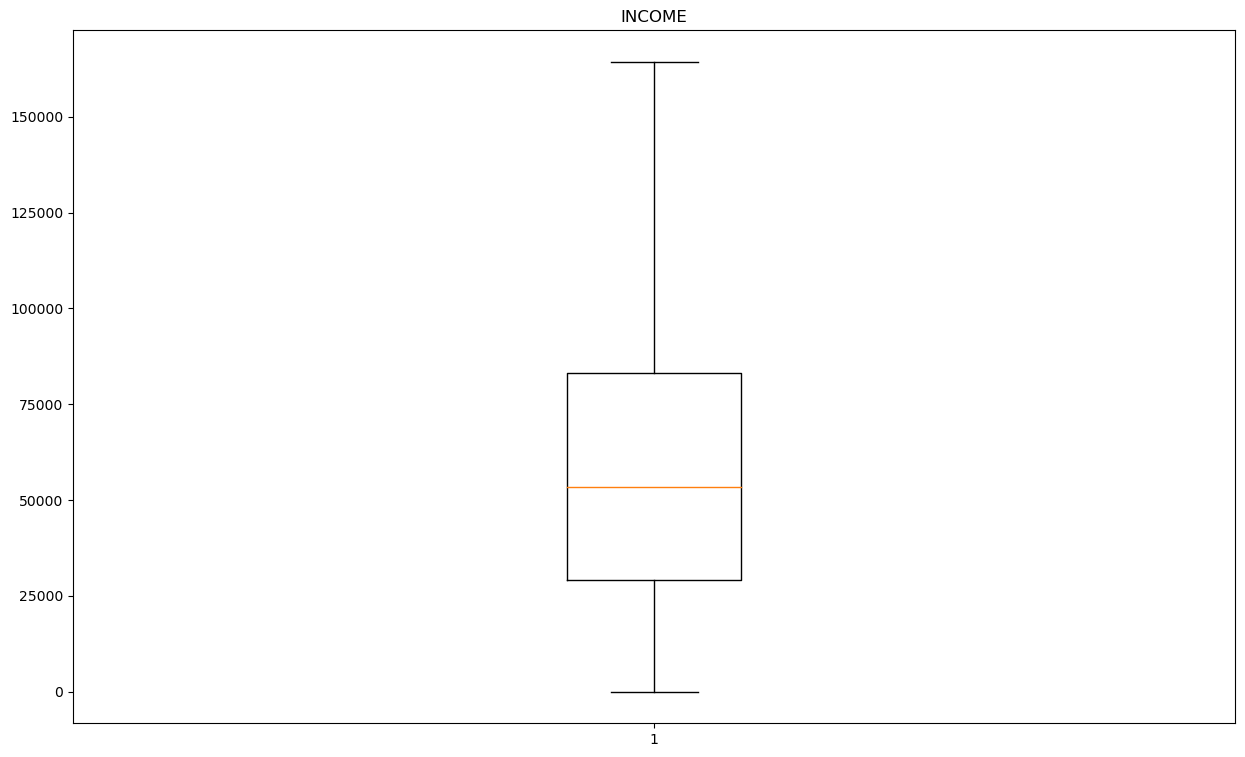

In [97]:
plt.boxplot(new_data['INCOME'])
plt.title('INCOME')

Text(0.5, 1.0, 'BLUEBOOK')

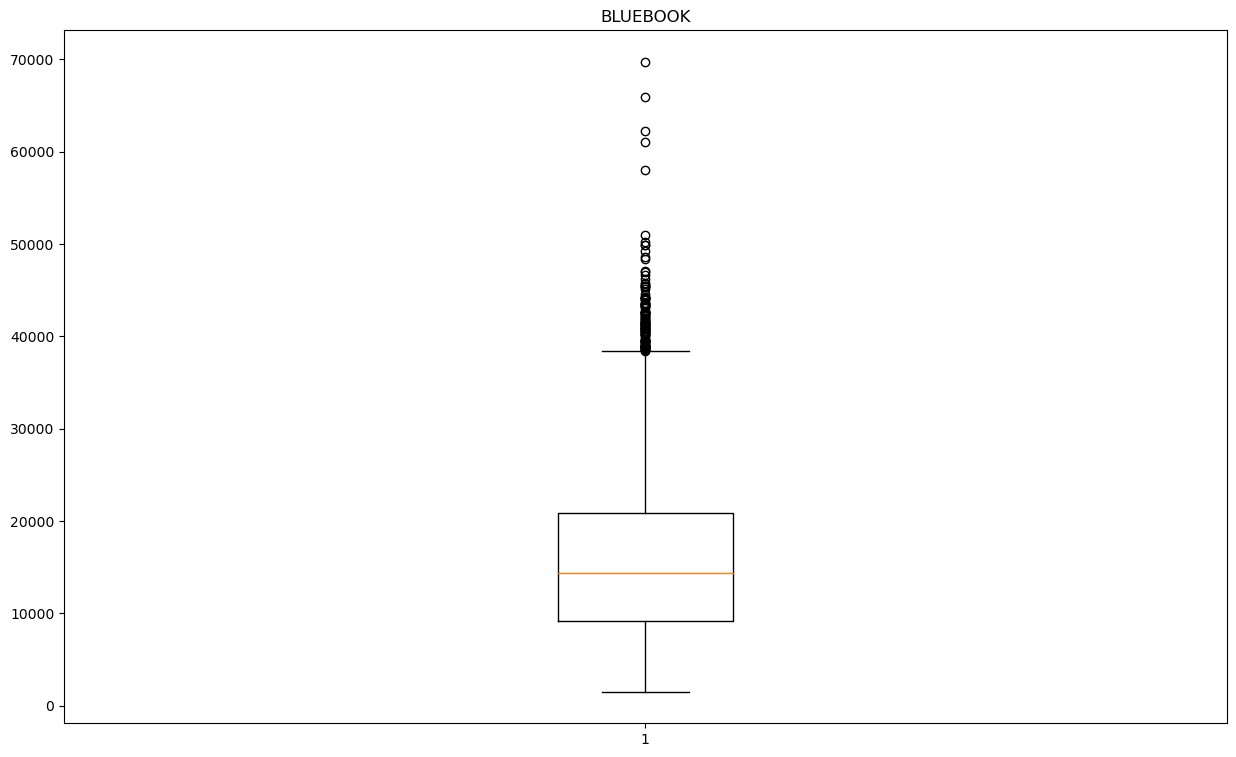

In [98]:
plt.boxplot(data['BLUEBOOK'])
plt.title('BLUEBOOK')

In [99]:
Q1=np.percentile(data['BLUEBOOK'],25,interpolation='midpoint')
Q2=np.percentile(data['BLUEBOOK'],50,interpolation='midpoint')
Q3=np.percentile(data['BLUEBOOK'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

9200.0
14400.0
20890.0


In [100]:
IQR=Q3-Q1
IQR

11690.0

In [101]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

-8335.0
38425.0


In [102]:
# find the outliers
data.loc[(data['BLUEBOOK'] > upper_limit) | (data['BLUEBOOK'] < lower_limit)]

ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ    INCOME PARENT1  \
234    378763891         0  17OCT63  36.0         3  11.0   49703.0     Yes   
423    361419420         0  06AUG44  55.0         0  14.0   81188.0      No   
610    247830994         0  04JUL47  52.0         0  13.0  255823.0      No   
750    807685357         0  18JUL60  39.0         0  10.0  198320.0      No   
878    630289134         0  12AUG45  54.0         0   6.0   73663.0      No   
...          ...       ...      ...   ...       ...   ...       ...     ...   
10045  752507049         0  04MAR63  36.0         0   6.0   76535.0      No   
10126  708296698         0  29JAN43  56.0         0   6.0  103503.0      No   
10175  690451948         0  25FEB52  47.0         0  12.0  221995.0      No   
10254  912021291         0  08MAR52  47.0         0  15.0   55841.0      No   
10261  775571725         0  19SEP43  56.0         2  18.0  112420.0      No   

       HOME_VAL MSTATUS  ...     CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ REVOKED  \
234    253132.0      No  ...  Panel Truck     yes  35879.0         1     Yes   
423    296244.0      No  ...  Panel Truck      no      0.0         0      No   
610         0.0      No  ...  Panel Truck      no      0.0         0      No   
750    494094.0     Yes  ...      Minivan     yes      0.0         0      No   
878    268990.0     Yes  ...  Panel Truck      no  36700.0         1     Yes   
...         ...     ...  ...          ...     ...      ...       ...     ...   
10045       0.0      No  ...          Van      no      0.0         0      No   
10126  160661.0      No  ...  Panel Truck     yes      0.0         0      No   
10175  545044.0     Yes  ...          SUV      no   6682.0         3      No   
10254  211559.0     Yes  ...  Panel Truck      no      0.0         0      No   
10261  314882.0     Yes  ...          Van      no      0.0         0      No   

       MVR_PTS  CLM_AMT CAR_AGE CLAIM_FLAG  URBANICITY  
234          0  53571.0    20.0          1       Urban  
423          3      0.0     8.0          0       Urban  
610          3      0.0     8.0          0       Urban  
750          1      0.0     1.0          0       Urban  
878          3      0.0     5.0          0       Urban  
...        ...      ...     ...        ...         ...  
10045        0      0.0     8.0          0       Rural  
10126        0      0.0    15.0          0       Rural  
10175        3      0.0     1.0          0       Urban  
10254        0      0.0     6.0          0       Urban  
10261        0      0.0     7.0          0       Urban  

[116 rows x 27 columns]

In [103]:
# capping - change the outlier values to upper (or) lower limit values
new_data = data.copy()
new_data.loc[(new_data['BLUEBOOK']>upper_limit), 'BLUEBOOK'] = upper_limit
new_data.loc[(new_data['BLUEBOOK']<lower_limit), 'BLUEBOOK'] = lower_limit

Text(0.5, 1.0, 'BLUEBOOK')

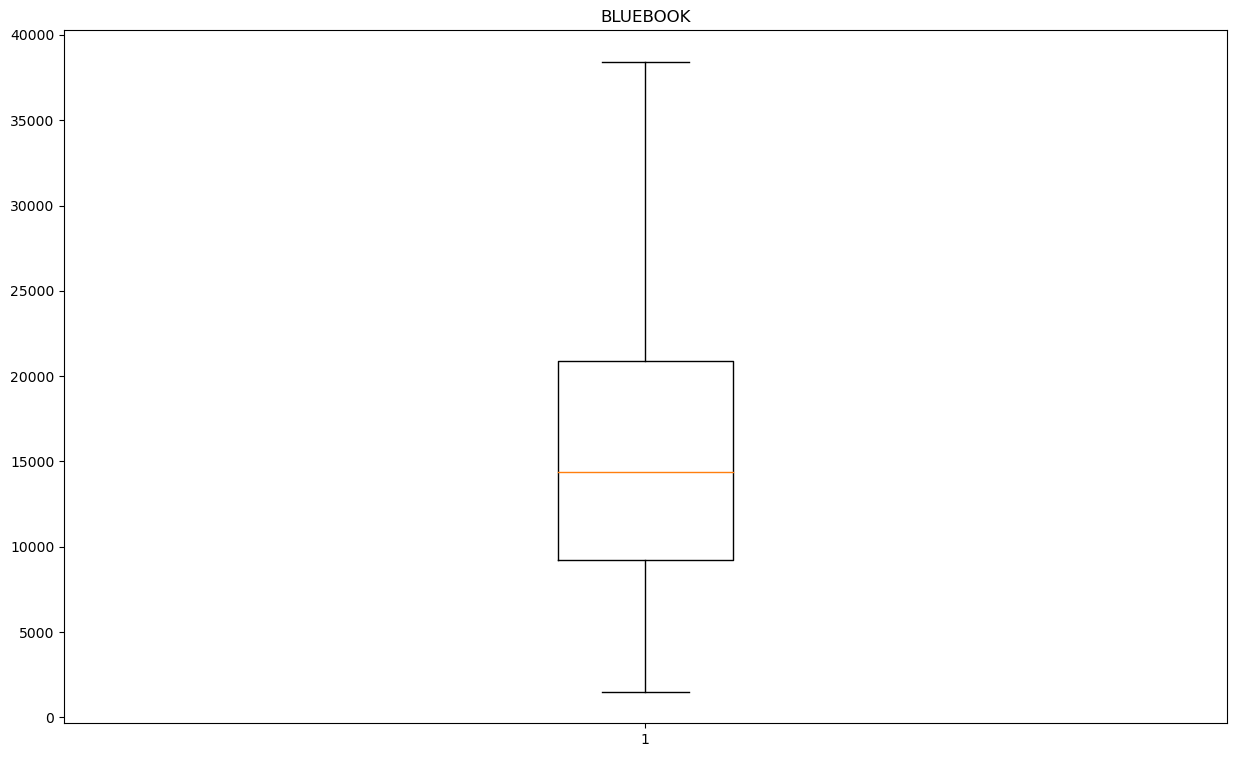

In [104]:
plt.boxplot(new_data['BLUEBOOK'])
plt.title('BLUEBOOK')

Text(0.5, 1.0, 'TIF')

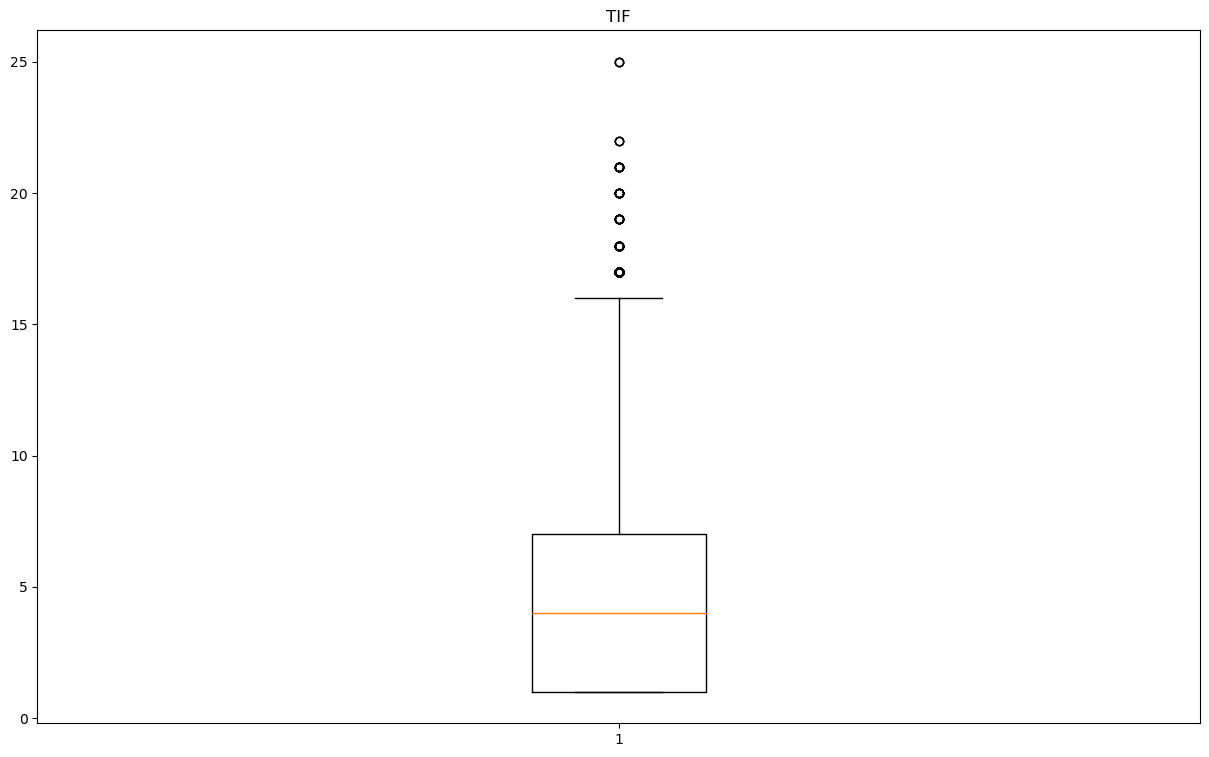

In [105]:
plt.boxplot(data['TIF'])
plt.title('TIF')

In [106]:
Q1=np.percentile(data['TIF'],25,interpolation='midpoint')
Q2=np.percentile(data['TIF'],50,interpolation='midpoint')
Q3=np.percentile(data['TIF'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

1.0
4.0
7.0


In [107]:
IQR=Q3-Q1
IQR

6.0

In [108]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

-8.0
16.0


In [109]:
# find the outliers
data.loc[(data['TIF'] > upper_limit) | (data['TIF'] < lower_limit)]

ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ    INCOME PARENT1  \
33     146989842         1  09APR55  44.0         2  17.0   45488.0      No   
57     883604551         0  20MAY66  33.0         3  14.0   32364.0      No   
145    693628088         0  16JAN52  47.0         0  12.0   64259.0      No   
243    589266751         0  08MAR49  50.0         0  14.0   90566.0      No   
260    330583611         0  29OCT66  33.0         1  11.0   86187.0     Yes   
...          ...       ...      ...   ...       ...   ...       ...     ...   
9907   184803767         0  28JUN52  47.0         0   9.0  147216.0      No   
10001   80790880         0  03SEP44  55.0         0  10.0   86663.0      No   
10013  211989818         0  22JUN44  55.0         0  12.0  165632.0      No   
10071  675583965         0  16JUN50  49.0         0  14.0   90036.0      No   
10206   36289741         0  20JUL53  46.0         0  12.0   79290.0      No   

       HOME_VAL MSTATUS  ...    CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ REVOKED  \
33     219378.0     Yes  ...     Minivan      no      0.0         0      No   
57     152894.0     Yes  ...     Minivan     yes      0.0         0      No   
145    202031.0     Yes  ...     Minivan      no   9526.0         4      No   
243    295771.0      No  ...         Van      no      0.0         0      No   
260    241285.0      No  ...     Minivan      no      0.0         0      No   
...         ...     ...  ...         ...     ...      ...       ...     ...   
9907   371761.0     Yes  ...         SUV      no      0.0         0      No   
10001       0.0      No  ...         SUV      no      0.0         0      No   
10013  413216.0     Yes  ...         SUV      no      0.0         0      No   
10071       0.0      No  ...         Van     yes      0.0         0      No   
10206  243362.0      No  ...  Sports Car      no   1053.0         3      No   

       MVR_PTS  CLM_AMT CAR_AGE CLAIM_FLAG  URBANICITY  
33           0      0.0    12.0          0       Urban  
57           3      0.0     1.0          0       Urban  
145          3      0.0     9.0          0       Urban  
243          0      0.0    18.0          0       Urban  
260          1      0.0     5.0          0       Rural  
...        ...      ...     ...        ...         ...  
9907         1      0.0     6.0          0       Urban  
10001        0      0.0     5.0          0       Urban  
10013        0      0.0    18.0          0       Urban  
10071        0      0.0    17.0          0       Urban  
10206        6      0.0    11.0          0       Urban  

[194 rows x 27 columns]

In [110]:
# capping - change the outlier values to upper (or) lower limit values
new_data = data.copy()
new_data.loc[(new_data['TIF']>upper_limit), 'TIF'] = upper_limit
new_data.loc[(new_data['TIF']<lower_limit), 'TIF'] = lower_limit

Text(0.5, 1.0, 'TIF')

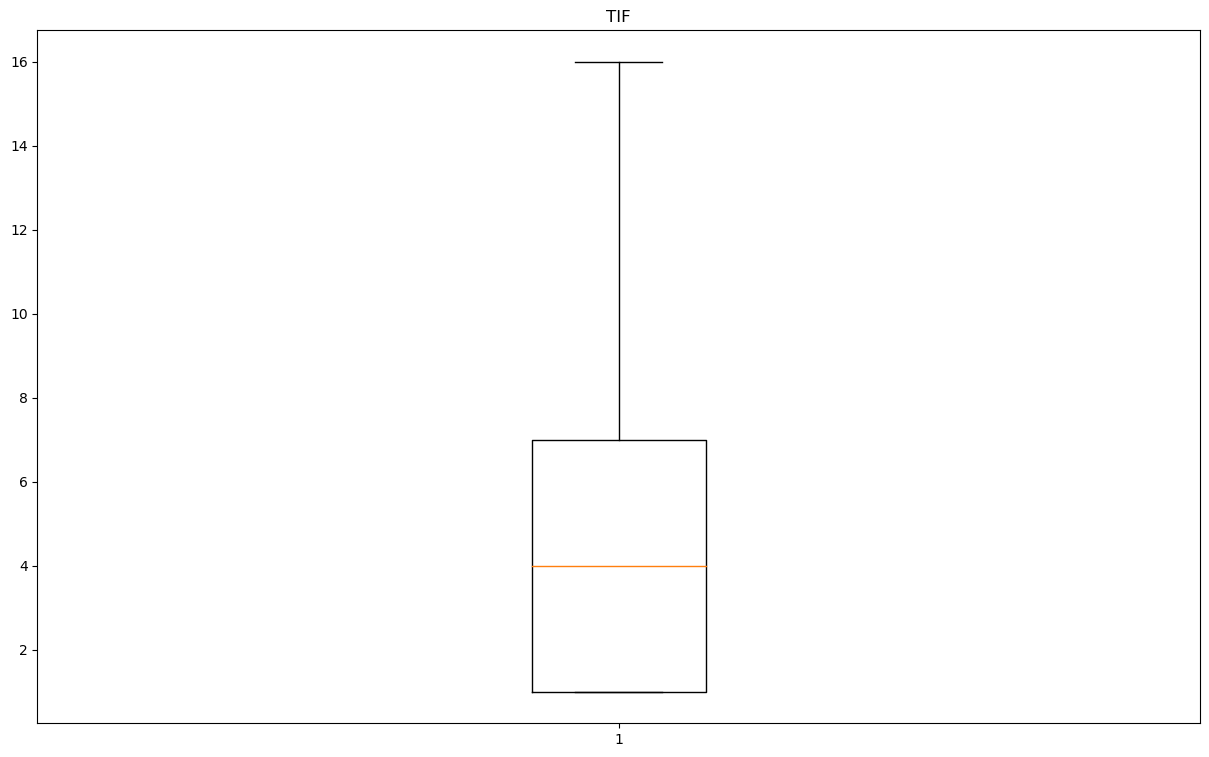

In [111]:
plt.boxplot(new_data['TIF'])
plt.title('TIF')

Text(0.5, 1.0, 'OLDCLAIM')

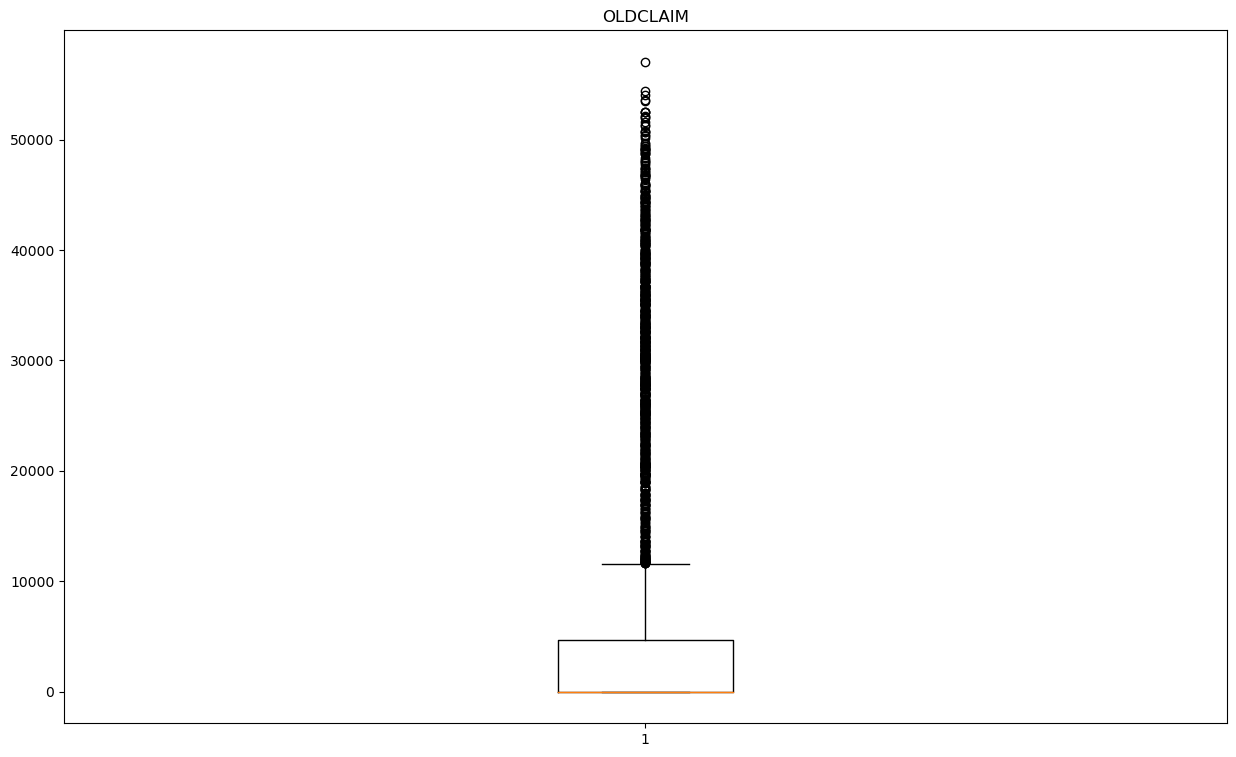

In [112]:
plt.boxplot(new_data['OLDCLAIM'])
plt.title('OLDCLAIM')

In [113]:
Q1=np.percentile(data['OLDCLAIM'],25,interpolation='midpoint')
Q2=np.percentile(data['OLDCLAIM'],50,interpolation='midpoint')
Q3=np.percentile(data['OLDCLAIM'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
4647.0


In [114]:
IQR=Q3-Q1
IQR

4647.0

In [115]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

-6970.5
11617.5


In [116]:
# find the outliers
data.loc[(data['OLDCLAIM'] > upper_limit) | (data['OLDCLAIM'] < lower_limit)]

ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ    INCOME PARENT1  \
3      727598473         0  05MAR64  35.0         1  10.0   16039.0      No   
5      743146596         0  17MAY49  50.0         0  11.0  114986.0      No   
20     162166370         0  19APR40  59.0         0  12.0   87460.0      No   
35     915517588         0  06MAY59  40.0         2   0.0   53529.0      No   
60     885280620         0  26APR59  40.0         0  11.0   16989.0      No   
...          ...       ...      ...   ...       ...   ...       ...     ...   
10271   63104807         0  03JAN52  47.0         0  15.0   31045.0      No   
10278  990710715         0  12JUN53  46.0         0   0.0       0.0      No   
10287  622965460         0  11OCT54  45.0         0  11.0   52966.0      No   
10290  788620578         0  06FEB45  54.0         0  13.0   81818.0      No   
10291     813128         1  14FEB53  46.0         0  12.0   45018.0      No   

       HOME_VAL MSTATUS  ...    CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ REVOKED  \
3      124191.0     Yes  ...         SUV      no  38690.0         2      No   
5      243925.0     Yes  ...         SUV      no  19217.0         2     Yes   
20          0.0      No  ...     Minivan     yes  44857.0         2      No   
35      98777.0     Yes  ...         SUV      no  38127.0         2     Yes   
60          0.0      No  ...      Pickup     yes  26104.0         1     Yes   
...         ...     ...  ...         ...     ...      ...       ...     ...   
10271  138614.0     Yes  ...         SUV      no  44376.0         1     Yes   
10278       0.0     Yes  ...  Sports Car      no  20519.0         1     Yes   
10287       0.0      No  ...      Pickup     yes  16239.0         2     Yes   
10290  272725.0     Yes  ...         Van      no  24690.0         1     Yes   
10291       0.0      No  ...     Minivan      no  33026.0         3      No   

       MVR_PTS  CLM_AMT CAR_AGE CLAIM_FLAG  URBANICITY  
3            3      0.0    10.0          0       Urban  
5            3      0.0    17.0          0       Urban  
20           4   4111.0     1.0          1       Urban  
35           4      0.0    12.0          0       Rural  
60          13   6100.0     6.0          1       Urban  
...        ...      ...     ...        ...         ...  
10271        0      0.0     8.0          0       Urban  
10278        3      0.0     8.0          0       Rural  
10287        5   2967.0     1.0          1       Urban  
10290        6      0.0     4.0          0       Urban  
10291        0      0.0     1.0          0       Rural  

[837 rows x 27 columns]

In [117]:
# capping - change the outlier values to upper (or) lower limit values
new_data = data.copy()
new_data.loc[(new_data['OLDCLAIM']>upper_limit), 'OLDCLAIM'] = upper_limit
new_data.loc[(new_data['OLDCLAIM']<lower_limit), 'OLDCLAIM'] = lower_limit

Text(0.5, 1.0, 'OLDCLAIM')

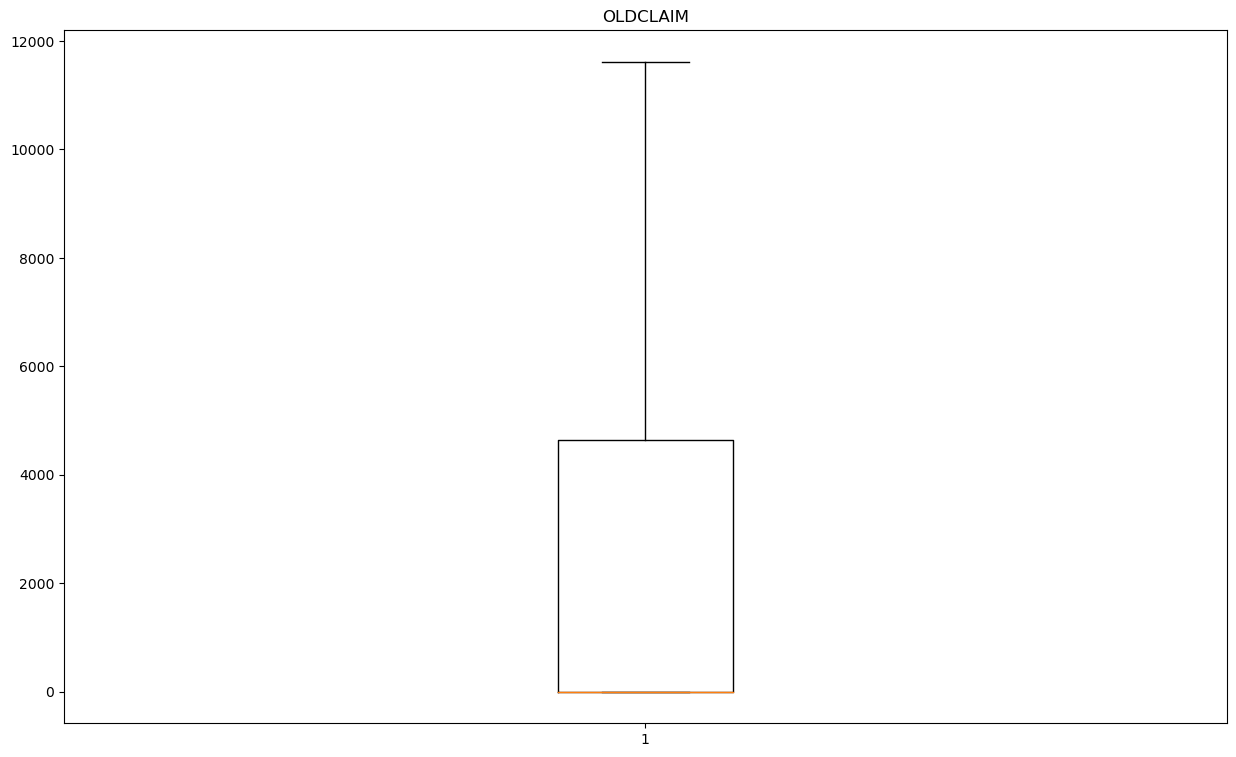

In [118]:
plt.boxplot(new_data['OLDCLAIM'])
plt.title('OLDCLAIM')

Text(0.5, 1.0, 'CLM_FREQ')

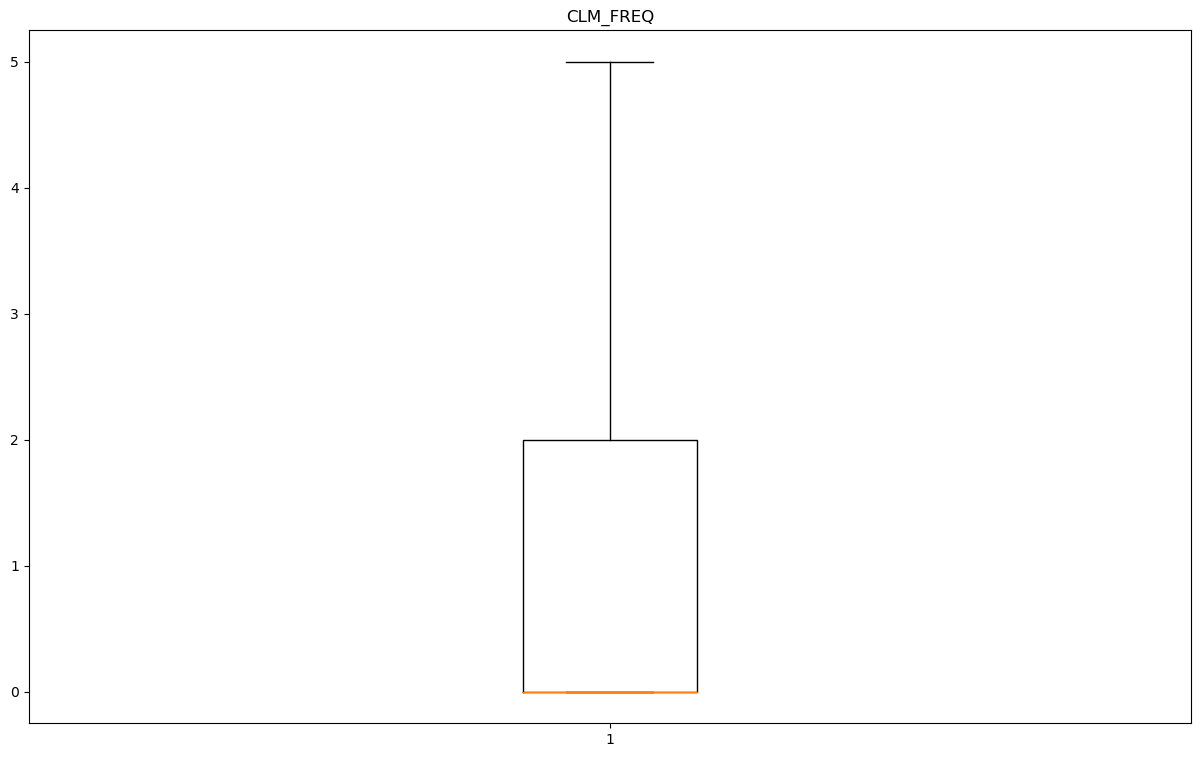

In [119]:
plt.boxplot(data['CLM_FREQ'])
plt.title('CLM_FREQ')

Text(0.5, 1.0, 'MVR_PTS')

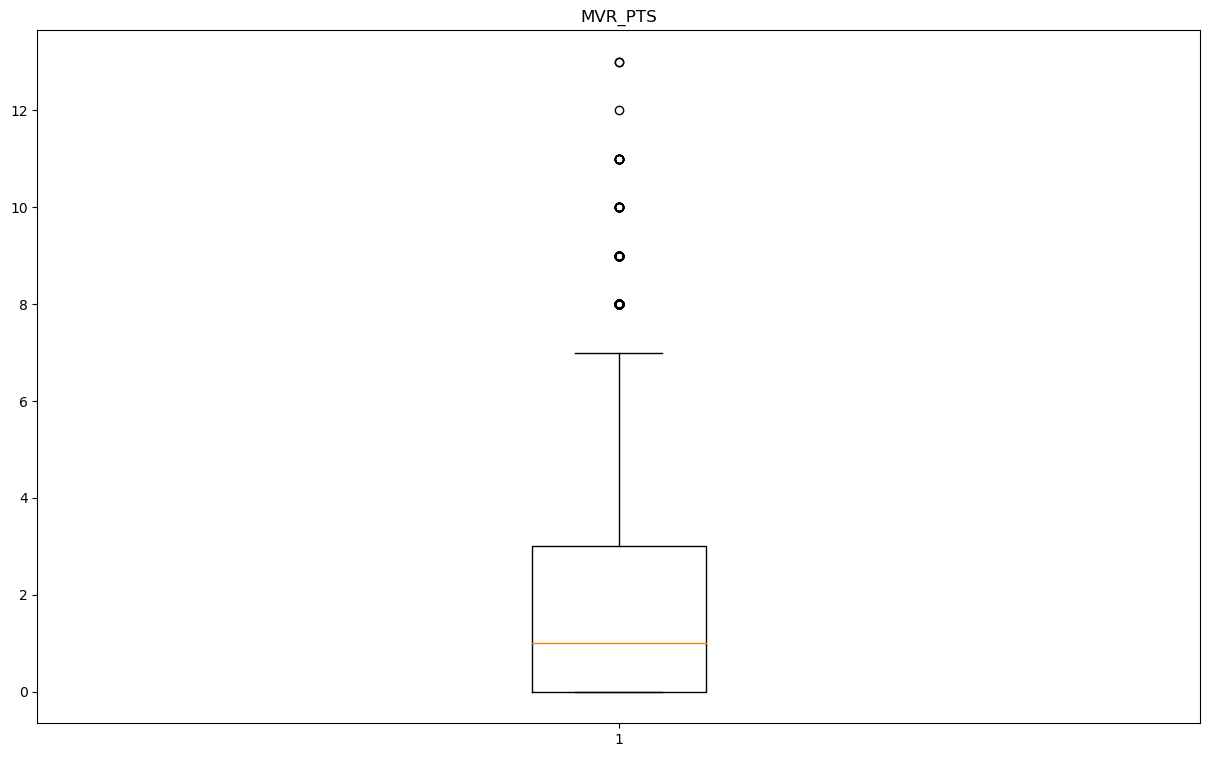

In [120]:
plt.boxplot(data['MVR_PTS'])
plt.title('MVR_PTS')

In [121]:
Q1=np.percentile(data['MVR_PTS'],25,interpolation='midpoint')
Q2=np.percentile(data['MVR_PTS'],50,interpolation='midpoint')
Q3=np.percentile(data['MVR_PTS'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
1.0
3.0


In [122]:
IQR=Q3-Q1
IQR

3.0

In [123]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

-4.5
7.5


In [124]:
# find the outliers
data.loc[(data['MVR_PTS'] > upper_limit) | (data['MVR_PTS'] < lower_limit)]

ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ    INCOME PARENT1  \
10     892208080         1  14DEC61  37.0         2  11.0  107961.0      No   
60     885280620         0  26APR59  40.0         0  11.0   16989.0      No   
75     793404097         2  02JAN55  44.0         2  14.0   45576.0      No   
185    986629118         1  14JAN59  40.0         2  12.0   35260.0      No   
282    752931241         0  21AUG55  44.0         0   8.0   32317.0      No   
...          ...       ...      ...   ...       ...   ...       ...     ...   
10091  714629498         0  17AUG49  50.0         0  10.0   62880.0      No   
10112  996850220         1  28AUG57  42.0         1  11.0   53357.0      No   
10123  728201536         0  07OCT61  38.0         0  11.0   20148.0      No   
10183  591805741         0  01MAR67  32.0         1   0.0       0.0     Yes   
10221  895424093         0  22JUL46  53.0         1  13.0   86551.0     Yes   

       HOME_VAL MSTATUS  ...     CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ REVOKED  \
10     333680.0     Yes  ...          Van     yes   2374.0         1     Yes   
60          0.0      No  ...       Pickup     yes  26104.0         1     Yes   
75     156623.0     Yes  ...   Sports Car      no  25276.0         1      No   
185    141167.0     Yes  ...          SUV      no   2235.0         1      No   
282         0.0      No  ...      Minivan     yes   3738.0         1      No   
...         ...     ...  ...          ...     ...      ...       ...     ...   
10091       0.0      No  ...          SUV      no   4538.0         4      No   
10112  209447.0     Yes  ...  Panel Truck      no   6517.0         1      No   
10123       0.0      No  ...   Sports Car      no  14850.0         3     Yes   
10183       0.0      No  ...          SUV      no   4074.0         1      No   
10221       0.0      No  ...          SUV      no   3436.0         3      No   

       MVR_PTS  CLM_AMT CAR_AGE CLAIM_FLAG  URBANICITY  
10          10   4021.0     7.0          1       Urban  
60          13   6100.0     6.0          1       Urban  
75           8      0.0     8.0          0       Urban  
185          8      0.0     1.0          0       Urban  
282          8   4363.0     1.0          1       Urban  
...        ...      ...     ...        ...         ...  
10091       11   5627.0    11.0          1       Urban  
10112        8   7506.0     1.0          1       Urban  
10123       10   5726.0     2.0          1       Urban  
10183        9   3432.0     9.0          1       Urban  
10221        8   3613.0    14.0          1       Urban  

[203 rows x 27 columns]

In [125]:
# capping - change the outlier values to upper (or) lower limit values
new_data = data.copy()
new_data.loc[(new_data['MVR_PTS']>upper_limit), 'MVR_PTS'] = upper_limit
new_data.loc[(new_data['MVR_PTS']<lower_limit), 'MVR_PTS'] = lower_limit

Text(0.5, 1.0, 'MVR_PTS')

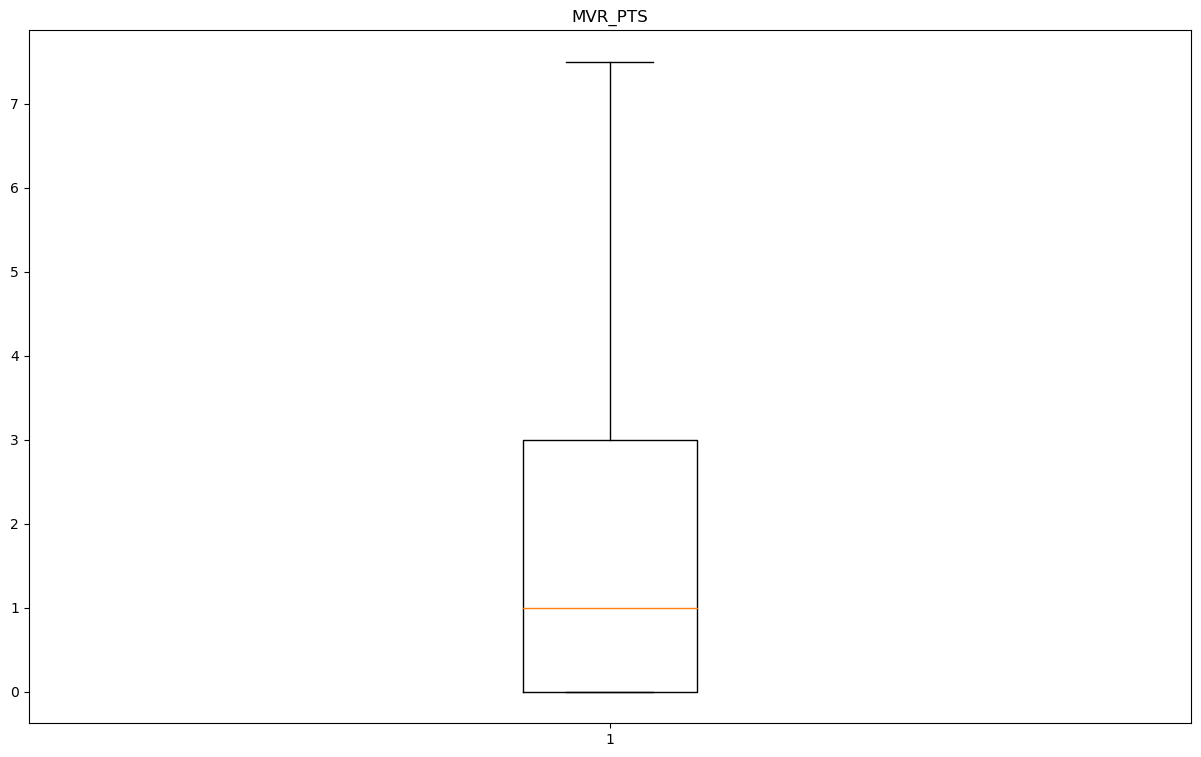

In [126]:
plt.boxplot(new_data['MVR_PTS'])
plt.title('MVR_PTS')

Text(0.5, 1.0, 'CLM_AMT')

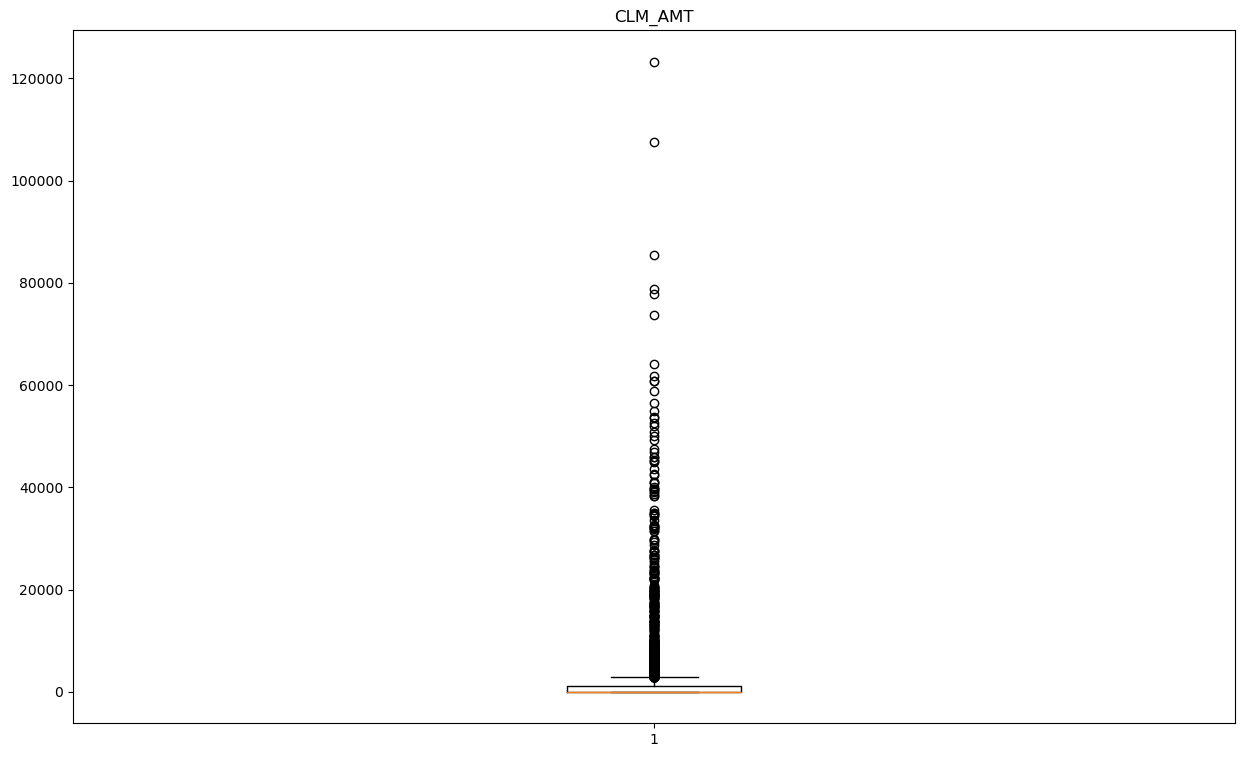

In [127]:
plt.boxplot(data['CLM_AMT'])
plt.title('CLM_AMT')

In [128]:
Q1=np.percentile(data['CLM_AMT'],25,interpolation='midpoint')
Q2=np.percentile(data['CLM_AMT'],50,interpolation='midpoint')
Q3=np.percentile(data['CLM_AMT'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1144.5


In [129]:
IQR=Q3-Q1
IQR

1144.5

In [130]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

-1716.75
2861.25


In [131]:
# find the outliers
data.loc[(data['CLM_AMT'] > upper_limit) | (data['CLM_AMT'] < lower_limit)]

ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ    INCOME PARENT1  \
6      871024631         0  05MAY65  34.0         1  12.0  125301.0     Yes   
8        7945239         1  17SEP59  40.0         1  11.0   50815.0     Yes   
10     892208080         1  14DEC61  37.0         2  11.0  107961.0      No   
13     308455362         0  25DEC45  53.0         0  14.0   77100.0      No   
18     588888550         0  17JAN54  45.0         0   0.0       0.0      No   
...          ...       ...      ...   ...       ...   ...       ...     ...   
10260  360967829         0  30AUG52  47.0         0  11.0  112264.0      No   
10262  118564133         0  26FEB52  47.0         0  13.0  282198.0      No   
10269  384261823         0  30JUN53  46.0         0  10.0   68360.0      No   
10287  622965460         0  11OCT54  45.0         0  11.0   52966.0      No   
10293  814422920         0  17AUG48  51.0         0  10.0  128523.0      No   

       HOME_VAL MSTATUS  ...     CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ REVOKED  \
6           0.0      No  ...   Sports Car      no      0.0         0      No   
8           0.0      No  ...      Minivan      no   3295.0         1      No   
10     333680.0     Yes  ...          Van     yes   2374.0         1     Yes   
13          0.0      No  ...   Sports Car      no      0.0         0      No   
18     106859.0     Yes  ...          SUV      no      0.0         0      No   
...         ...     ...  ...          ...     ...      ...       ...     ...   
10260       0.0      No  ...  Panel Truck     yes  22762.0         1     Yes   
10262  649247.0      No  ...  Panel Truck     yes      0.0         0     Yes   
10269  237457.0      No  ...      Minivan      no   6560.0         3      No   
10287       0.0      No  ...       Pickup     yes  16239.0         2     Yes   
10293       0.0      No  ...  Panel Truck      no   3995.0         3      No   

       MVR_PTS  CLM_AMT CAR_AGE CLAIM_FLAG  URBANICITY  
6            0   2946.0     7.0          1       Urban  
8            2   6477.0     1.0          1       Urban  
10          10   4021.0     7.0          1       Urban  
13           0   6077.0    11.0          1       Urban  
18           3   2920.0     5.0          1       Urban  
...        ...      ...     ...        ...         ...  
10260        5   3179.0    20.0          1       Urban  
10262        2   3106.0    16.0          1       Urban  
10269        7   3135.0    11.0          1       Urban  
10287        5   2967.0     1.0          1       Urban  
10293        1   3288.0    15.0          1       Urban  

[1974 rows x 27 columns]

In [132]:
# capping - change the outlier values to upper (or) lower limit values
new_data = data.copy()
new_data.loc[(new_data['CLM_AMT']>upper_limit), 'CLM_AMT'] = upper_limit
new_data.loc[(new_data['CLM_AMT']<lower_limit), 'CLM_AMT'] = lower_limit

Text(0.5, 1.0, 'CLM_AMT')

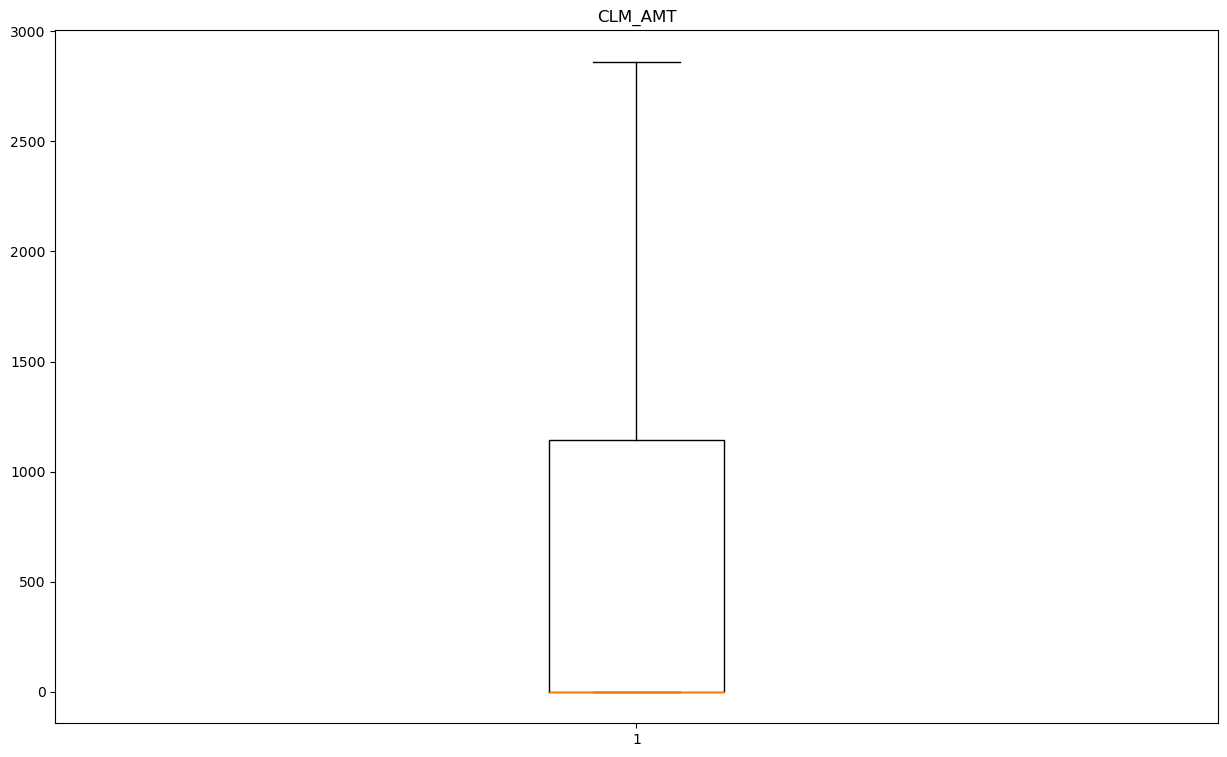

In [133]:
plt.boxplot(new_data['CLM_AMT'])
plt.title('CLM_AMT')

Text(0.5, 1.0, 'CAR_AGE')

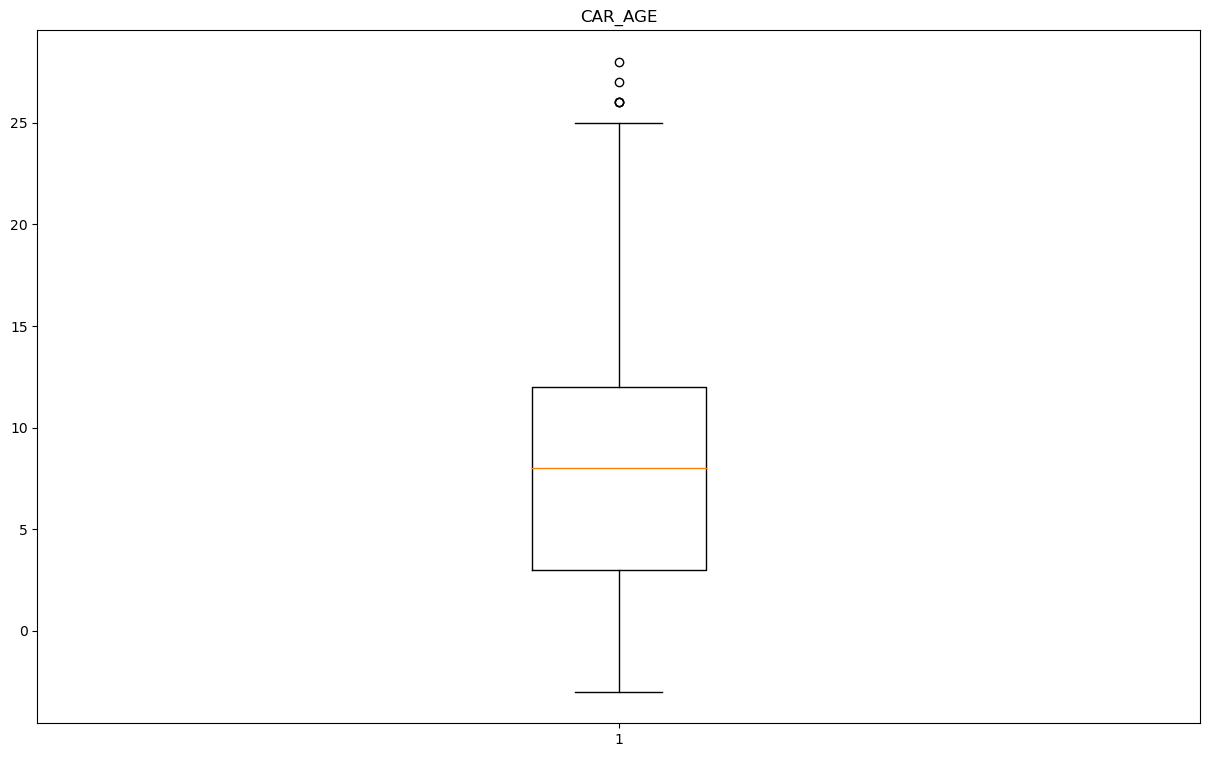

In [134]:
plt.boxplot(data['CAR_AGE'])
plt.title('CAR_AGE')

In [135]:
Q1=np.percentile(data['CAR_AGE'],25,interpolation='midpoint')
Q2=np.percentile(data['CAR_AGE'],50,interpolation='midpoint')
Q3=np.percentile(data['CAR_AGE'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

3.0
8.0
12.0


In [136]:
IQR=Q3-Q1
IQR

9.0

In [137]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

-10.5
25.5


In [138]:
# find the outliers
data.loc[(data['CAR_AGE'] > upper_limit) | (data['CAR_AGE'] < lower_limit)]

ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ    INCOME PARENT1  \
881   273204117         0  01MAR47  52.0         0  12.0   82599.0      No   
2243  144827905         0  20FEB53  46.0         0   9.0   98346.0      No   
3762  794522047         0  12OCT49  50.0         0  11.0  114923.0      No   
5118  779624178         0  10OCT46  53.0         0  10.0   37965.0      No   
9818  453314305         0  11JUN54  45.0         3  16.0   60945.0      No   

      HOME_VAL MSTATUS  ... CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ REVOKED  \
881        0.0      No  ...  Minivan      no      0.0         0      No   
2243  296257.0     Yes  ...      Van      no      0.0         0      No   
3762  298946.0     Yes  ...  Minivan      no      0.0         0      No   
5118  178189.0     Yes  ...  Minivan      no      0.0         0      No   
9818  189813.0     Yes  ...      Van      no      0.0         0      No   

      MVR_PTS  CLM_AMT CAR_AGE CLAIM_FLAG  URBANICITY  
881         2      0.0    26.0          0       Urban  
2243        1      0.0    27.0          0       Urban  
3762        7      0.0    26.0          0       Urban  
5118        1      0.0    26.0          0       Rural  
9818        0      0.0    28.0          0       Urban  

[5 rows x 27 columns]

In [139]:
# capping - change the outlier values to upper (or) lower limit values
new_data = data.copy()
new_data.loc[(new_data['CAR_AGE']>upper_limit), 'CAR_AGE'] = upper_limit
new_data.loc[(new_data['CAR_AGE']<lower_limit), 'CAR_AGE'] = lower_limit

Text(0.5, 1.0, 'CAR_AGE')

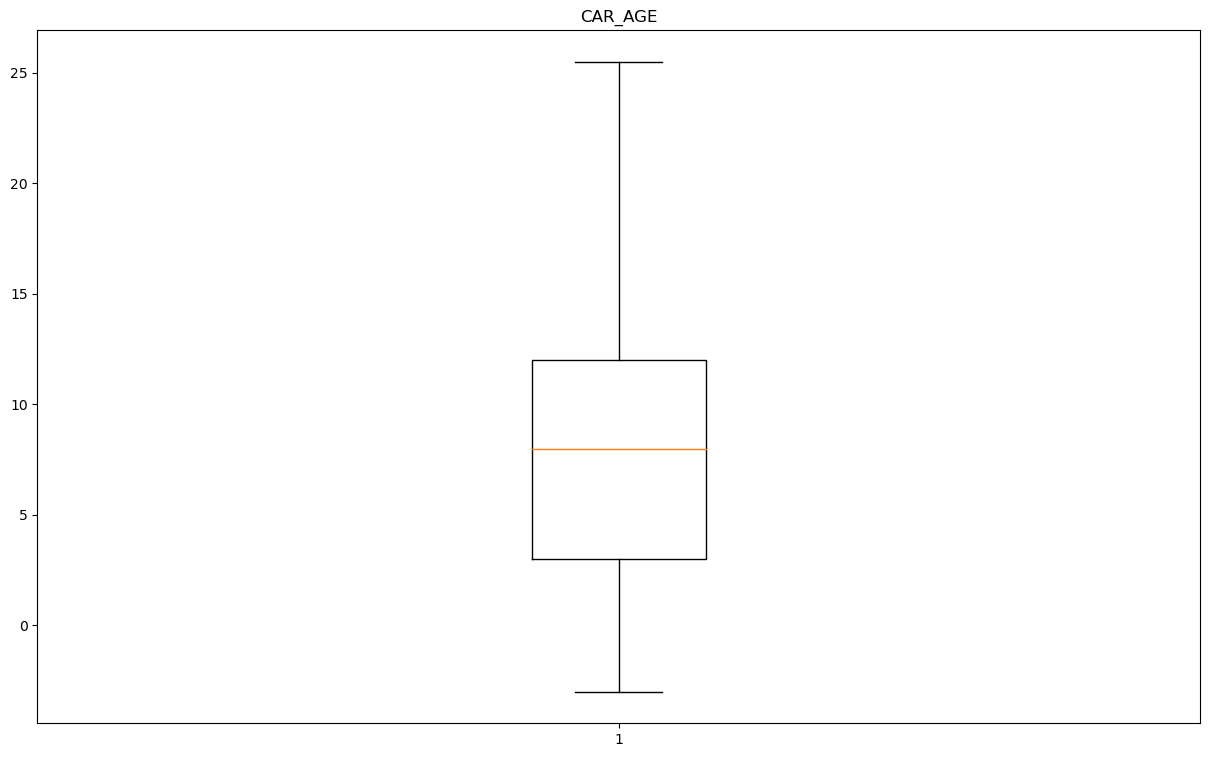

In [140]:
plt.boxplot(new_data['CAR_AGE'])
plt.title('CAR_AGE')

Text(0.5, 1.0, 'YOJ')

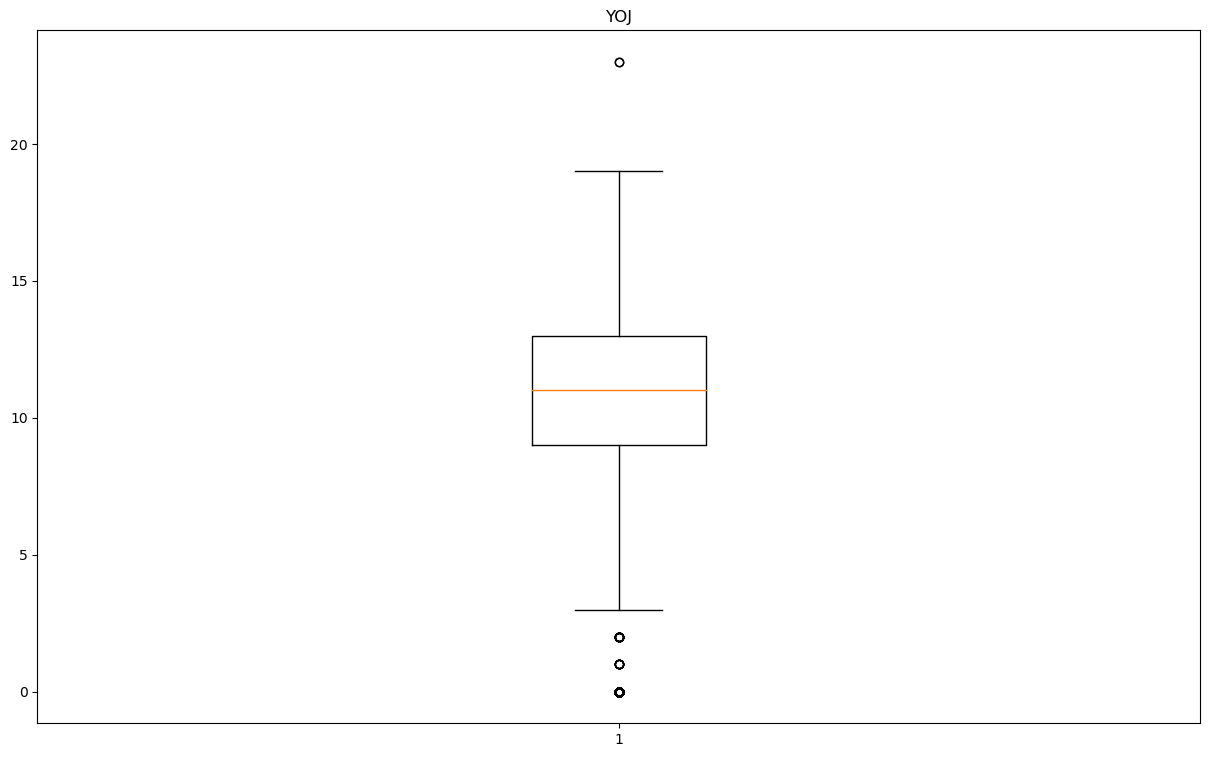

In [141]:
plt.boxplot(data['YOJ'])
plt.title('YOJ')

In [142]:
Q1=np.percentile(data['YOJ'],25,interpolation='midpoint')
Q2=np.percentile(data['YOJ'],50,interpolation='midpoint')
Q3=np.percentile(data['YOJ'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

9.0
11.0
13.0


In [143]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

-4.5
26.5


In [144]:
# find the outliers
data.loc[(data['YOJ'] > upper_limit) | (data['YOJ'] < lower_limit)]

Empty DataFrame
Columns: [ID, KIDSDRIV, BIRTH, AGE, HOMEKIDS, YOJ, INCOME, PARENT1, HOME_VAL, MSTATUS, GENDER, EDUCATION, OCCUPATION, TRAVTIME, CAR_USE, BLUEBOOK, TIF, CAR_TYPE, RED_CAR, OLDCLAIM, CLM_FREQ, REVOKED, MVR_PTS, CLM_AMT, CAR_AGE, CLAIM_FLAG, URBANICITY]
Index: []

[0 rows x 27 columns]

In [145]:
# capping - change the outlier values to upper (or) lower limit values
new_data = data.copy()
new_data.loc[(new_data['YOJ']>upper_limit), 'YOJ'] = upper_limit
new_data.loc[(new_data['YOJ']<lower_limit), 'YOJ'] = lower_limit

Text(0.5, 1.0, 'YOJ')

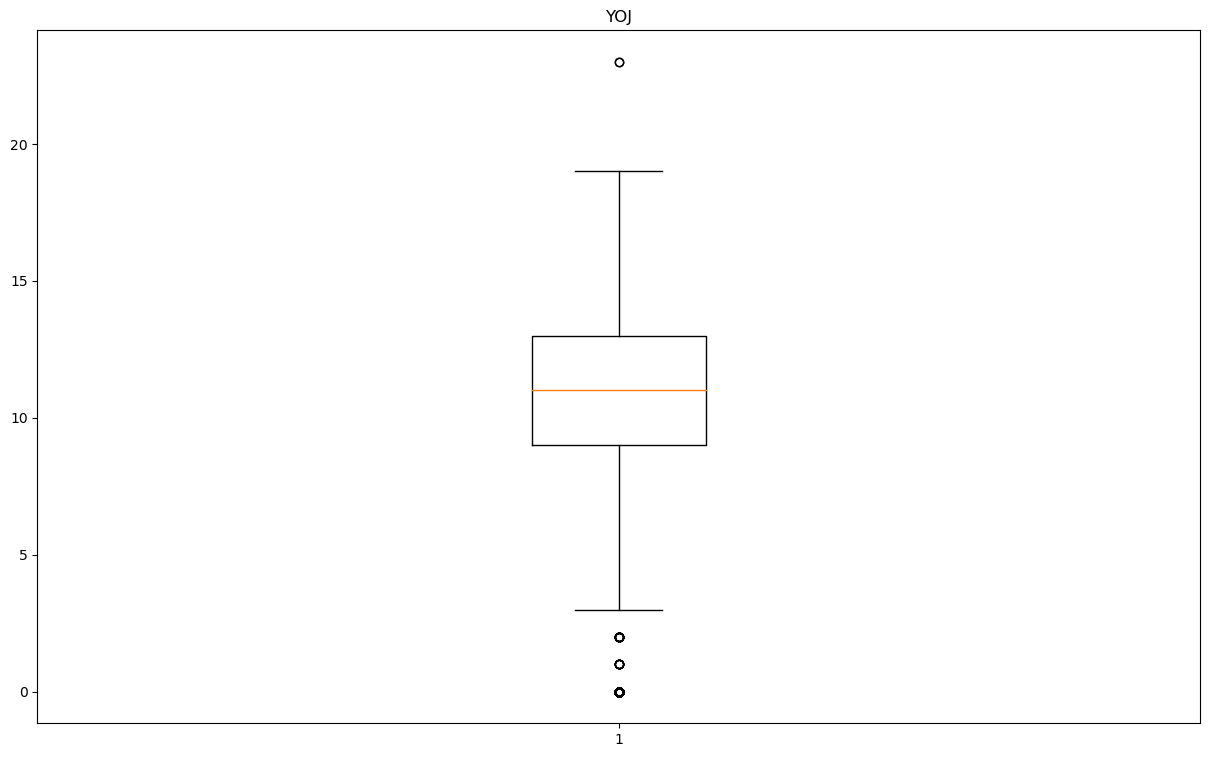

In [146]:
plt.boxplot(new_data['YOJ'])
plt.title('YOJ')

### 18.4 Label Encoding

* Often in machine learning, we want to convert categorical variables into some type of numeric format that can be readily used by algorithms.

* One way to do this is through label encoding, which assigns each categorical value an integer value based on alphabetical order.

In [147]:
from sklearn.preprocessing import LabelEncoder
column = ['BIRTH', 'PARENT1','MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED','URBANICITY']
le = LabelEncoder()

for col in column:
    new_data[col] = le.fit_transform(new_data[col])
new_data.head()

ID  KIDSDRIV  BIRTH   AGE  HOMEKIDS   YOJ   INCOME  PARENT1  \
0   63581743         0   3348  60.0         0  11.0  67349.0        0   
1  132761049         0   4406  43.0         0  11.0  91449.0        0   
2  921317019         0   3850  48.0         0  11.0  52881.0        0   
3  727598473         0   1023  35.0         1  10.0  16039.0        0   
4  450221861         0    994  51.0         0  14.0  53529.0        0   

   HOME_VAL  MSTATUS  ...  CAR_TYPE  RED_CAR  OLDCLAIM  CLM_FREQ  REVOKED  \
0       0.0        0  ...         0        1    4461.0         2        0   
1  257252.0        0  ...         0        1       0.0         0        0   
2       0.0        0  ...         5        1       0.0         0        0   
3  124191.0        1  ...         3        0   38690.0         2        0   
4  306251.0        1  ...         0        1       0.0         0        0   

   MVR_PTS  CLM_AMT  CAR_AGE  CLAIM_FLAG  URBANICITY  
0        3      0.0     18.0           0           1  
1        0      0.0      1.0           0           1  
2        2      0.0     10.0           0           1  
3        3      0.0     10.0           0           1  
4        0      0.0      6.0           0           1  

[5 rows x 27 columns]

In [148]:
new_data.shape

(10302, 27)

### 18.5 Dropping unnecessary columns



* While working with dataframes , we often need to delete one or more columns from the dataframe while data preprocessing.

* Pandas provide data analysts a way to delete and filter data frame using .drop() method.

* The drop() method removes the specified row or column.

* By specifying the column axis (axis='columns'), the drop() method removes the specified column.

* By specifying the row axis (axis='index'), the drop() method removes the specified row.


In [149]:
new_data.drop(['BIRTH','YOJ','ID'],axis=1,inplace=True)

In [150]:
new_data.shape

(10302, 24)

### 18.6 Splitting into Target & Feature

* In order to make a prediction one needs to separate the dataset into two components.

* The dependent variable or target which needs to be predicted.

* The independent variables or features that will be used to make a prediction.

* Your task is to separate the target and features. 

* The target you have here is the CLAIM FLAG, and features include everything else.

In [151]:
X=new_data.drop(['CLAIM_FLAG'],axis=1)
y=new_data['CLAIM_FLAG']

### 18.7 Train-test split

* Train test split is a model validation process that allows you to simulate how your model would perform with new data. 
* The train_test_split() method is used to split our data into train and test sets. 
* The dataframe gets divided into X_train,X_test , y_train and y_test. 
* The X_train and y_train sets are used for training and fitting the model.
* This consists of about 80 percent of data(you can vary this) in your training set & remaining 20 percent in your test set.

In [152]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### 18.8 Linear Regression Model

* Simple linear regression analysis is a technique to find the association between two variables. 
* The two variables involved are a dependent variable which response to the change and the independent variable.
* Steps while implementing linear regression:
  * Import the packages and classes that you need.
  * Provide data to work with, and eventually do appropriate transformations.
  * Create a regression model and fit it with existing data.
  * Check the results of model fitting to know whether the model is satisfactory.
  * Apply the model for predictions.
  
* The coefficient of determination of prediction, 𝑅² obtained here is 0.4298.
* The squared error between predicted and actual values is Mean Squared Error (MSE) here obtained is 0.11219.

In [153]:
from sklearn.metrics import mean_squared_error,r2_score 
from math import sqrt

In [154]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
model=lin_reg.fit(X_train,y_train)
predictions=model.predict(X_test)

In [155]:
r2_score(y_test,predictions)

0.4298089160408334

In [156]:
print('The mean squared error values is:',mean_squared_error(y_test,predictions))

The mean squared error values is: 0.1121972967870513


In [157]:
new_data.describe()

KIDSDRIV           AGE      HOMEKIDS         INCOME       PARENT1  \
count  10302.000000  10302.000000  10302.000000   10302.000000  10302.000000   
mean       0.169288     44.837397      0.720443   61127.057562      0.130363   
std        0.506512      8.603520      1.116323   46162.151534      0.336719   
min        0.000000     16.000000      0.000000       0.000000      0.000000   
25%        0.000000     39.000000      0.000000   29164.750000      0.000000   
50%        0.000000     45.000000      0.000000   53529.000000      0.000000   
75%        0.000000     51.000000      1.000000   83231.750000      0.000000   
max        4.000000     81.000000      5.000000  367030.000000      1.000000   

            HOME_VAL       MSTATUS        GENDER     EDUCATION    OCCUPATION  \
count   10302.000000  10302.000000  10302.000000  10302.000000  10302.000000   
mean   154865.606387      0.600660      0.461755      1.814890      2.903417   
std    125538.938281      0.489787      0.498559      1.180036      2.536538   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.000000      0.000000      0.000000      1.000000      0.000000   
50%    160661.000000      1.000000      0.000000      2.000000      3.000000   
75%    233085.000000      1.000000      1.000000      3.000000      5.000000   
max    885282.000000      1.000000      1.000000      4.000000      7.000000   

       ...      CAR_TYPE       RED_CAR      OLDCLAIM      CLM_FREQ  \
count  ...  10302.000000  10302.000000  10302.000000  10302.000000   
mean   ...      2.171132      0.288876   4033.977868      0.800718   
std    ...      1.625425      0.453262   8733.143119      1.154079   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      2.000000      0.000000      0.000000      0.000000   
75%    ...      3.000000      1.000000   4647.500000      2.000000   
max    ...      5.000000      1.000000  57037.000000      5.000000   

            REVOKED       MVR_PTS        CLM_AMT       CAR_AGE    CLAIM_FLAG  \
count  10302.000000  10302.000000   10302.000000  10302.000000  10302.000000   
mean       0.122403      1.710153    1511.266453      8.279654      0.266550   
std        0.327767      2.159015    4725.249896      5.534838      0.442177   
min        0.000000      0.000000       0.000000     -3.000000      0.000000   
25%        0.000000      0.000000       0.000000      3.000000      0.000000   
50%        0.000000      1.000000       0.000000      8.000000      0.000000   
75%        0.000000      3.000000    1144.750000     12.000000      1.000000   
max        1.000000     13.000000  123247.000000     28.000000      1.000000   

         URBANICITY  
count  10302.000000  
mean       0.798874  
std        0.400861  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  

[8 rows x 24 columns]

In [158]:
X1=X.drop(['PARENT1','MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED','URBANICITY'],axis=1)

In [159]:
X1

KIDSDRIV   AGE  HOMEKIDS    INCOME  HOME_VAL  TRAVTIME  BLUEBOOK  TIF  \
0             0  60.0         0   67349.0       0.0        14   14230.0   11   
1             0  43.0         0   91449.0  257252.0        22   14940.0    1   
2             0  48.0         0   52881.0       0.0        26   21970.0    1   
3             0  35.0         1   16039.0  124191.0         5    4010.0    4   
4             0  51.0         0   53529.0  306251.0        32   15440.0    7   
...         ...   ...       ...       ...       ...       ...       ...  ...   
10297         1  45.0         2  164669.0  386273.0        21   13270.0   15   
10298         0  46.0         0  107204.0  332591.0        36   24490.0    6   
10299         0  48.0         0   39837.0  170611.0        12   13820.0    7   
10300         0  50.0         0   43445.0  149248.0        36   22550.0    6   
10301         0  52.0         0   53235.0  197017.0        64   19400.0    6   

       OLDCLAIM  CLM_FREQ  MVR_PTS  CLM_AMT  CAR_AGE  
0        4461.0         2        3      0.0     18.0  
1           0.0         0        0      0.0      1.0  
2           0.0         0        2      0.0     10.0  
3       38690.0         2        3      0.0     10.0  
4           0.0         0        0      0.0      6.0  
...         ...       ...      ...      ...      ...  
10297       0.0         0        2      0.0     17.0  
10298       0.0         0        0      0.0      1.0  
10299       0.0         0        0      0.0      1.0  
10300       0.0         0        0      0.0     11.0  
10301       0.0         0        0      0.0      9.0  

[10302 rows x 13 columns]

### 18.9 Standard Scaling

* Scaling is normalization of a dataset using mean value and standard deviation.

* Scaling the data makes it easy for a model to learn and understand the problem.

* The two popular scaling methods  are Standard and MinMax scaling.

* Standard Scaler follows the Standard Normal Distribution, i.e., it assumes a normal distribution for data within each feature. 

* The scaling makes the distribution centered around 0, with a standard deviation of 1 and the mean removed.

* MinMax Scaler transforms features by scaling each feature to a given range, which is generally [0,1], or [-1,-1] in case of negative values.

In [160]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [161]:
std_scl=preprocessing.StandardScaler()
X1=std_scl.fit_transform(X)

In [162]:
X1

array([[-0.33423862,  1.76245754, -0.64540232, ..., -0.31984336,
         1.75629654,  0.50175875],
       [-0.33423862, -0.21357374, -0.64540232, ..., -0.31984336,
        -1.31530631,  0.50175875],
       [-0.33423862,  0.36761193, -0.64540232, ..., -0.31984336,
         0.31083637,  0.50175875],
       ...,
       [-0.33423862,  0.36761193, -0.64540232, ..., -0.31984336,
        -1.31530631,  0.50175875],
       [-0.33423862,  0.6000862 , -0.64540232, ..., -0.31984336,
         0.49151889,  0.50175875],
       [-0.33423862,  0.83256047, -0.64540232, ..., -0.31984336,
         0.13015385, -1.99298964]])

In [163]:
X1=pd.DataFrame(X1,columns=X.columns)

In [164]:
X1

KIDSDRIV       AGE  HOMEKIDS    INCOME   PARENT1  HOME_VAL   MSTATUS  \
0     -0.334239  1.762458 -0.645402  0.134791 -0.387176 -1.233666 -1.226431   
1     -0.334239 -0.213574 -0.645402  0.656889 -0.387176  0.815614 -1.226431   
2     -0.334239  0.367612 -0.645402 -0.178641 -0.387176 -1.233666 -1.226431   
3     -0.334239 -1.143471  0.250439 -0.976780 -0.387176 -0.244355  0.815374   
4     -0.334239  0.716323 -0.645402 -0.164603 -0.387176  1.205943  0.815374   
...         ...       ...       ...       ...       ...       ...       ...   
10297  1.640146  0.018901  1.146280  2.243114 -0.387176  1.843401  0.815374   
10298 -0.334239  0.135138 -0.645402  0.998203 -0.387176  1.415768  0.815374   
10299 -0.334239  0.367612 -0.645402 -0.461224 -0.387176  0.125428  0.815374   
10300 -0.334239  0.600086 -0.645402 -0.383061 -0.387176 -0.044750  0.815374   
10301 -0.334239  0.832560 -0.645402 -0.170972 -0.387176  0.335780  0.815374   

         GENDER  EDUCATION  OCCUPATION  ...       TIF  CAR_TYPE   RED_CAR  \
0      1.079653   1.851821    1.220850  ...  1.379567 -1.335797  1.568979   
1      1.079653   0.156875   -1.144693  ... -1.053171 -1.335797  1.568979   
2      1.079653  -0.690597    0.826593  ... -1.053171  1.740472  1.568979   
3     -0.926224   0.156875   -0.750436  ... -0.323350  0.509964 -0.637357   
4      1.079653  -1.538070   -1.144693  ...  0.406472 -1.335797  1.568979   
...         ...        ...         ...  ...       ...       ...       ...   
10297  1.079653   1.851821    0.826593  ...  2.352662 -1.335797 -0.637357   
10298  1.079653   1.004348   -1.144693  ...  0.163198 -0.720543 -0.637357   
10299 -0.926224  -1.538070   -1.144693  ...  0.406472  0.509964 -0.637357   
10300 -0.926224  -0.690597    0.038079  ...  0.163198 -1.335797 -0.637357   
10301 -0.926224   0.156875   -0.750436  ...  0.163198 -1.335797 -0.637357   

       OLDCLAIM  CLM_FREQ   REVOKED   MVR_PTS   CLM_AMT   CAR_AGE  URBANICITY  
0      0.048899  1.039219 -0.373464  0.597453 -0.319843  1.756297    0.501759  
1     -0.461938 -0.693850 -0.373464 -0.792137 -0.319843 -1.315306    0.501759  
2     -0.461938 -0.693850 -0.373464  0.134256 -0.319843  0.310836    0.501759  
3      3.968526  1.039219 -0.373464  0.597453 -0.319843  0.310836    0.501759  
4     -0.461938 -0.693850 -0.373464 -0.792137 -0.319843 -0.411894    0.501759  
...         ...       ...       ...       ...       ...       ...         ...  
10297 -0.461938 -0.693850 -0.373464  0.134256 -0.319843  1.575614    0.501759  
10298 -0.461938 -0.693850 -0.373464 -0.792137 -0.319843 -1.315306    0.501759  
10299 -0.461938 -0.693850 -0.373464 -0.792137 -0.319843 -1.315306    0.501759  
10300 -0.461938 -0.693850 -0.373464 -0.792137 -0.319843  0.491519    0.501759  
10301 -0.461938 -0.693850 -0.373464 -0.792137 -0.319843  0.130154   -1.992990  

[10302 rows x 23 columns]

In [165]:
X2=pd.merge(X, X1, how = "right")

In [166]:
X2

KIDSDRIV       AGE  HOMEKIDS    INCOME   PARENT1  HOME_VAL   MSTATUS  \
0     -0.334239  1.762458 -0.645402  0.134791 -0.387176 -1.233666 -1.226431   
1     -0.334239 -0.213574 -0.645402  0.656889 -0.387176  0.815614 -1.226431   
2     -0.334239  0.367612 -0.645402 -0.178641 -0.387176 -1.233666 -1.226431   
3     -0.334239 -1.143471  0.250439 -0.976780 -0.387176 -0.244355  0.815374   
4     -0.334239  0.716323 -0.645402 -0.164603 -0.387176  1.205943  0.815374   
...         ...       ...       ...       ...       ...       ...       ...   
10297  1.640146  0.018901  1.146280  2.243114 -0.387176  1.843401  0.815374   
10298 -0.334239  0.135138 -0.645402  0.998203 -0.387176  1.415768  0.815374   
10299 -0.334239  0.367612 -0.645402 -0.461224 -0.387176  0.125428  0.815374   
10300 -0.334239  0.600086 -0.645402 -0.383061 -0.387176 -0.044750  0.815374   
10301 -0.334239  0.832560 -0.645402 -0.170972 -0.387176  0.335780  0.815374   

         GENDER  EDUCATION  OCCUPATION  ...       TIF  CAR_TYPE   RED_CAR  \
0      1.079653   1.851821    1.220850  ...  1.379567 -1.335797  1.568979   
1      1.079653   0.156875   -1.144693  ... -1.053171 -1.335797  1.568979   
2      1.079653  -0.690597    0.826593  ... -1.053171  1.740472  1.568979   
3     -0.926224   0.156875   -0.750436  ... -0.323350  0.509964 -0.637357   
4      1.079653  -1.538070   -1.144693  ...  0.406472 -1.335797  1.568979   
...         ...        ...         ...  ...       ...       ...       ...   
10297  1.079653   1.851821    0.826593  ...  2.352662 -1.335797 -0.637357   
10298  1.079653   1.004348   -1.144693  ...  0.163198 -0.720543 -0.637357   
10299 -0.926224  -1.538070   -1.144693  ...  0.406472  0.509964 -0.637357   
10300 -0.926224  -0.690597    0.038079  ...  0.163198 -1.335797 -0.637357   
10301 -0.926224   0.156875   -0.750436  ...  0.163198 -1.335797 -0.637357   

       OLDCLAIM  CLM_FREQ   REVOKED   MVR_PTS   CLM_AMT   CAR_AGE  URBANICITY  
0      0.048899  1.039219 -0.373464  0.597453 -0.319843  1.756297    0.501759  
1     -0.461938 -0.693850 -0.373464 -0.792137 -0.319843 -1.315306    0.501759  
2     -0.461938 -0.693850 -0.373464  0.134256 -0.319843  0.310836    0.501759  
3      3.968526  1.039219 -0.373464  0.597453 -0.319843  0.310836    0.501759  
4     -0.461938 -0.693850 -0.373464 -0.792137 -0.319843 -0.411894    0.501759  
...         ...       ...       ...       ...       ...       ...         ...  
10297 -0.461938 -0.693850 -0.373464  0.134256 -0.319843  1.575614    0.501759  
10298 -0.461938 -0.693850 -0.373464 -0.792137 -0.319843 -1.315306    0.501759  
10299 -0.461938 -0.693850 -0.373464 -0.792137 -0.319843 -1.315306    0.501759  
10300 -0.461938 -0.693850 -0.373464 -0.792137 -0.319843  0.491519    0.501759  
10301 -0.461938 -0.693850 -0.373464 -0.792137 -0.319843  0.130154   -1.992990  

[10302 rows x 23 columns]

In [167]:
new_data.columns

Index(['KIDSDRIV', 'AGE', 'HOMEKIDS', 'INCOME', 'PARENT1', 'HOME_VAL',
       'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'TRAVTIME', 'CAR_USE',
       'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM', 'CLM_FREQ',
       'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG', 'URBANICITY'],
      dtype='object')

In [168]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [169]:
from sklearn.metrics import mean_squared_error,r2_score 
from math import sqrt

In [170]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
model=lin_reg.fit(X_train,y_train)
Predictions=model.predict(X_test)

In [171]:
Predictions

array([0.26898858, 0.30717233, 0.15049421, ..., 0.27546402, 0.16317586,
       0.10192822])

In [172]:
r2_score(y_test,predictions)

0.4298089160408334

In [173]:
print('The mean squared error values is:',mean_squared_error(y_test,predictions))

The mean squared error values is: 0.1121972967870513


In [174]:
new_data.describe()

KIDSDRIV           AGE      HOMEKIDS         INCOME       PARENT1  \
count  10302.000000  10302.000000  10302.000000   10302.000000  10302.000000   
mean       0.169288     44.837397      0.720443   61127.057562      0.130363   
std        0.506512      8.603520      1.116323   46162.151534      0.336719   
min        0.000000     16.000000      0.000000       0.000000      0.000000   
25%        0.000000     39.000000      0.000000   29164.750000      0.000000   
50%        0.000000     45.000000      0.000000   53529.000000      0.000000   
75%        0.000000     51.000000      1.000000   83231.750000      0.000000   
max        4.000000     81.000000      5.000000  367030.000000      1.000000   

            HOME_VAL       MSTATUS        GENDER     EDUCATION    OCCUPATION  \
count   10302.000000  10302.000000  10302.000000  10302.000000  10302.000000   
mean   154865.606387      0.600660      0.461755      1.814890      2.903417   
std    125538.938281      0.489787      0.498559      1.180036      2.536538   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.000000      0.000000      0.000000      1.000000      0.000000   
50%    160661.000000      1.000000      0.000000      2.000000      3.000000   
75%    233085.000000      1.000000      1.000000      3.000000      5.000000   
max    885282.000000      1.000000      1.000000      4.000000      7.000000   

       ...      CAR_TYPE       RED_CAR      OLDCLAIM      CLM_FREQ  \
count  ...  10302.000000  10302.000000  10302.000000  10302.000000   
mean   ...      2.171132      0.288876   4033.977868      0.800718   
std    ...      1.625425      0.453262   8733.143119      1.154079   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      2.000000      0.000000      0.000000      0.000000   
75%    ...      3.000000      1.000000   4647.500000      2.000000   
max    ...      5.000000      1.000000  57037.000000      5.000000   

            REVOKED       MVR_PTS        CLM_AMT       CAR_AGE    CLAIM_FLAG  \
count  10302.000000  10302.000000   10302.000000  10302.000000  10302.000000   
mean       0.122403      1.710153    1511.266453      8.279654      0.266550   
std        0.327767      2.159015    4725.249896      5.534838      0.442177   
min        0.000000      0.000000       0.000000     -3.000000      0.000000   
25%        0.000000      0.000000       0.000000      3.000000      0.000000   
50%        0.000000      1.000000       0.000000      8.000000      0.000000   
75%        0.000000      3.000000    1144.750000     12.000000      1.000000   
max        1.000000     13.000000  123247.000000     28.000000      1.000000   

         URBANICITY  
count  10302.000000  
mean       0.798874  
std        0.400861  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  

[8 rows x 24 columns]

### 18.10 Feature Engineering

* Feature engineering is the process of extracting new features from the existing attributes. 

* The goal is to simplify and speed up data transformations while also enhance model accuracy. 

* Here we added a new column ‘AGEGROUP’ to display the categorization of ‘AGE’ column into ‘Youth’[15-25], ‘Adult’[25-40], 'Middle Age’[40-60] & 'Senior Citizen’[60-82].

In [175]:
def AGEGROUP(n):
    if n in range(15, 25):
        return 'Youth'
    elif n in range(25, 40):
        return 'Adult'
    elif n in range(40, 60):
        return 'Middle Age'
    elif n in range(60, 82):
        return 'Senior Citizen'

In [176]:
new_data['AGEGROUP']=new_data['AGE'].apply(lambda x:AGEGROUP(x))

In [177]:
new_data.head()

KIDSDRIV   AGE  HOMEKIDS   INCOME  PARENT1  HOME_VAL  MSTATUS  GENDER  \
0         0  60.0         0  67349.0        0       0.0        0       1   
1         0  43.0         0  91449.0        0  257252.0        0       1   
2         0  48.0         0  52881.0        0       0.0        0       1   
3         0  35.0         1  16039.0        0  124191.0        1       0   
4         0  51.0         0  53529.0        0  306251.0        1       1   

   EDUCATION  OCCUPATION  ...  RED_CAR  OLDCLAIM  CLM_FREQ  REVOKED  MVR_PTS  \
0          4           6  ...        1    4461.0         2        0        3   
1          2           0  ...        1       0.0         0        0        0   
2          1           5  ...        1       0.0         0        0        2   
3          2           1  ...        0   38690.0         2        0        3   
4          0           0  ...        1       0.0         0        0        0   

   CLM_AMT  CAR_AGE  CLAIM_FLAG  URBANICITY        AGEGROUP  
0      0.0     18.0           0           1  Senior Citizen  
1      0.0      1.0           0           1      Middle Age  
2      0.0     10.0           0           1      Middle Age  
3      0.0     10.0           0           1           Adult  
4      0.0      6.0           0           1      Middle Age  

[5 rows x 25 columns]

In [178]:
#Recheck the Correlation

In [179]:
numeric_features = new_data.select_dtypes(include=np.number)
numeric_features.columns

Index(['KIDSDRIV', 'AGE', 'HOMEKIDS', 'INCOME', 'PARENT1', 'HOME_VAL',
       'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'TRAVTIME', 'CAR_USE',
       'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM', 'CLM_FREQ',
       'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG', 'URBANICITY'],
      dtype='object')

In [180]:
corr =  numeric_features.corr()
corr

KIDSDRIV       AGE  HOMEKIDS    INCOME   PARENT1  HOME_VAL  \
KIDSDRIV    1.000000 -0.078424  0.463653 -0.042203  0.200157 -0.015286   
AGE        -0.078424  1.000000 -0.447502  0.180863 -0.310917  0.203916   
HOMEKIDS    0.463653 -0.447502  1.000000 -0.155628  0.448719 -0.104773   
INCOME     -0.042203  0.180863 -0.155628  1.000000 -0.065046  0.545886   
PARENT1     0.200157 -0.310917  0.448719 -0.065046  1.000000 -0.243842   
HOME_VAL   -0.015286  0.203916 -0.104773  0.545886 -0.243842  1.000000   
MSTATUS     0.041655  0.086941  0.045968 -0.035361 -0.474844  0.441044   
GENDER     -0.039712  0.069553 -0.113403  0.111124 -0.068894  0.076961   
EDUCATION  -0.060447  0.207048 -0.164642  0.454940 -0.080478  0.250578   
OCCUPATION -0.019914  0.059145 -0.032027 -0.051936 -0.006171 -0.074748   
TRAVTIME    0.012207 -0.001568 -0.000722 -0.050078 -0.015810 -0.034464   
CAR_USE     0.004146  0.027237  0.011858 -0.087109 -0.002424 -0.033070   
BLUEBOOK   -0.028508  0.166191 -0.108569  0.418434 -0.049512  0.254182   
TIF        -0.005830 -0.001889  0.007509  0.002618  0.009043  0.006526   
CAR_TYPE    0.000182 -0.001401  0.043007 -0.069819  0.020251 -0.043071   
RED_CAR    -0.040508  0.025859 -0.068117  0.064676 -0.044500  0.029749   
OLDCLAIM    0.023886 -0.033366  0.029756 -0.038168  0.039312 -0.058333   
CLM_FREQ    0.038952 -0.037622  0.038661 -0.047720  0.061613 -0.091226   
REVOKED     0.033639 -0.045033  0.044181 -0.022065  0.050676 -0.043682   
MVR_PTS     0.048424 -0.075685  0.064294 -0.061264  0.070142 -0.089452   
CLM_AMT     0.068283 -0.049028  0.068646 -0.055901  0.096230 -0.086690   
CAR_AGE    -0.057403  0.173314 -0.153891  0.392253 -0.064152  0.210067   
CLAIM_FLAG  0.108421 -0.106882  0.123049 -0.138222  0.158455 -0.180304   
URBANICITY -0.043622  0.042454 -0.061663  0.195680 -0.022215  0.113677   

             MSTATUS    GENDER  EDUCATION  OCCUPATION  ...  CAR_TYPE  \
KIDSDRIV    0.041655 -0.039712  -0.060447   -0.019914  ...  0.000182   
AGE         0.086941  0.069553   0.207048    0.059145  ... -0.001401   
HOMEKIDS    0.045968 -0.113403  -0.164642   -0.032027  ...  0.043007   
INCOME     -0.035361  0.111124   0.454940   -0.051936  ... -0.069819   
PARENT1    -0.474844 -0.068894  -0.080478   -0.006171  ...  0.020251   
HOME_VAL    0.441044  0.076961   0.250578   -0.074748  ... -0.043071   
MSTATUS     1.000000 -0.000930  -0.026125    0.002083  ...  0.004028   
GENDER     -0.000930  1.000000   0.024845   -0.043491  ... -0.313391   
EDUCATION  -0.026125  0.024845   1.000000    0.040989  ... -0.024681   
OCCUPATION  0.002083 -0.043491   0.040989    1.000000  ... -0.011955   
TRAVTIME    0.006010 -0.010539  -0.053280   -0.028430  ...  0.012742   
CAR_USE     0.011879 -0.282008   0.000959    0.293018  ... -0.003416   
BLUEBOOK   -0.007260  0.062378   0.213352   -0.043186  ... -0.129075   
TIF        -0.006839 -0.007191   0.005918   -0.007471  ...  0.012156   
CAR_TYPE    0.004028 -0.313391  -0.024681   -0.011955  ...  1.000000   
RED_CAR    -0.013803  0.663209   0.003972   -0.013136  ... -0.214685   
OLDCLAIM   -0.044617 -0.004155  -0.013570   -0.013454  ...  0.049888   
CLM_FREQ   -0.070560  0.014001  -0.011194   -0.019045  ...  0.055650   
REVOKED    -0.040777 -0.011450  -0.004412   -0.002009  ...  0.025365   
MVR_PTS    -0.050898 -0.011111  -0.036875   -0.012611  ...  0.052311   
CLM_AMT    -0.083848  0.003387  -0.042834   -0.043383  ...  0.055584   
CAR_AGE    -0.034038  0.024721   0.495820    0.126942  ... -0.045634   
CLAIM_FLAG -0.129728 -0.022009  -0.081246   -0.069224  ...  0.106445   
URBANICITY -0.006642  0.046028   0.174740    0.063670  ... -0.024943   

             RED_CAR  OLDCLAIM  CLM_FREQ   REVOKED   MVR_PTS   CLM_AMT  \
KIDSDRIV   -0.040508  0.023886  0.038952  0.033639  0.048424  0.068283   
AGE         0.025859 -0.033366 -0.037622 -0.045033 -0.075685 -0.049028   
HOMEKIDS   -0.068117  0.029756  0.038661  0.044181  0.064294  0.068646   
INCOME      0.064676 -0.038168 -0.047720 -0.022065 -0.061264 -0.

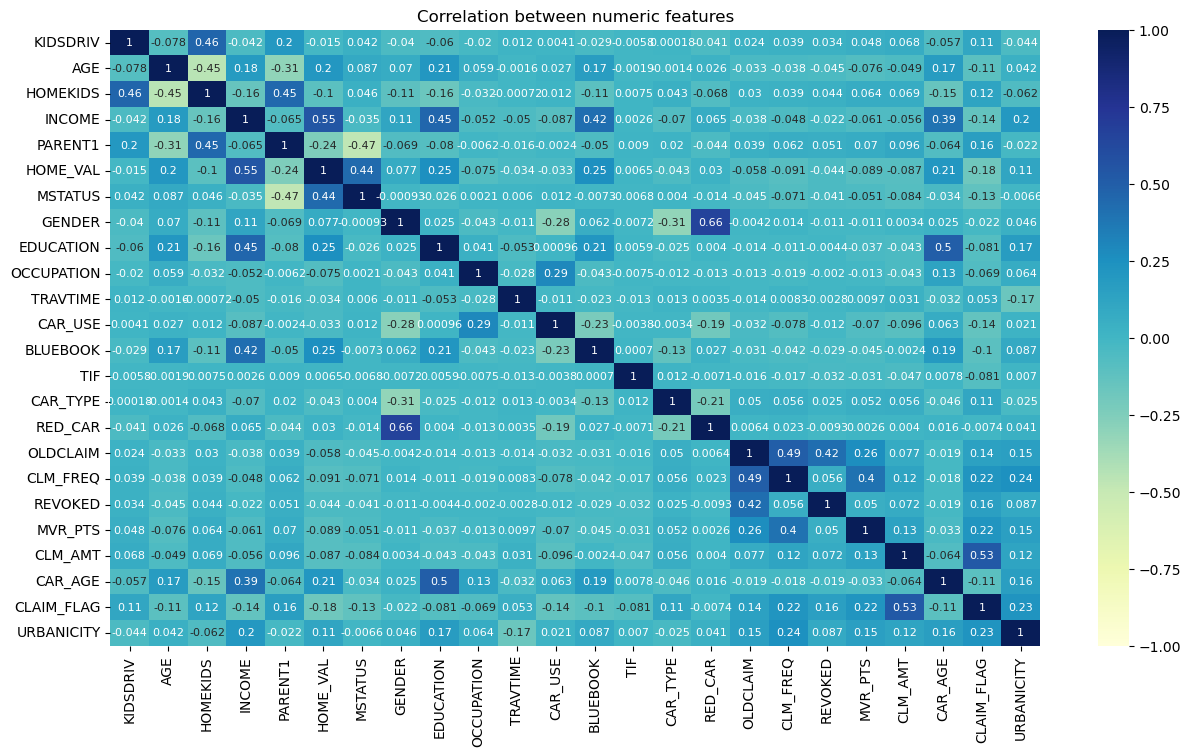

In [181]:
plt.figure(figsize=(15, 8))
sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 8})
plt.title('Correlation between numeric features')
plt.show()

In [182]:
data2 = new_data.drop(['AGEGROUP'],axis=1)

In [183]:
data2.head()

KIDSDRIV   AGE  HOMEKIDS   INCOME  PARENT1  HOME_VAL  MSTATUS  GENDER  \
0         0  60.0         0  67349.0        0       0.0        0       1   
1         0  43.0         0  91449.0        0  257252.0        0       1   
2         0  48.0         0  52881.0        0       0.0        0       1   
3         0  35.0         1  16039.0        0  124191.0        1       0   
4         0  51.0         0  53529.0        0  306251.0        1       1   

   EDUCATION  OCCUPATION  ...  CAR_TYPE  RED_CAR  OLDCLAIM  CLM_FREQ  REVOKED  \
0          4           6  ...         0        1    4461.0         2        0   
1          2           0  ...         0        1       0.0         0        0   
2          1           5  ...         5        1       0.0         0        0   
3          2           1  ...         3        0   38690.0         2        0   
4          0           0  ...         0        1       0.0         0        0   

   MVR_PTS  CLM_AMT  CAR_AGE  CLAIM_FLAG  URBANICITY  
0        3      0.0     18.0           0           1  
1        0      0.0      1.0           0           1  
2        2      0.0     10.0           0           1  
3        3      0.0     10.0           0           1  
4        0      0.0      6.0           0           1  

[5 rows x 24 columns]

### 19.Modelling

* A machine learning model is defined as a mathematical representation of the output of the training process.
* Machine learning is the study of different algorithms that can improve automatically through experience & old data and build the model. 
* A machine learning model is similar to computer software designed to recognize patterns or behaviors based on previous experience or data. 
* The learning algorithm discovers patterns within the training data, and it outputs an ML model which captures these patterns and makes predictions on new data.

### 19.1 Logistic Regression Model

* Simplest baseline model for regression task, works well only when data is linearly separable and very less or multicollinearity is present.
* Logistic regression predicts the output of a categorical dependent variable.Therefore the outcome must be a categorical or discrete value. 
* It can be either Yes or No, 0 or 1, true or False, etc ,but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.
* Logistic Regression is much similar to the Linear Regression except that how they are used. 
* Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.
* In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1).
* The curve from the logistic function indicates the likelihood of something such as whether the cells are cancerous or not, a mouse is obese or not based on its weight, etc.
* Logistic Regression is a significant machine learning algorithm because it has the ability to provide probabilities and classify new data using continuous and discrete datasets.
* Logistic Regression can be used to classify the observations using different types of data and can easily determine the most effective variables used for the classification. 

In [184]:
from sklearn.linear_model import LogisticRegression
#Defining Logistic Regression Model & fitting train data
lr=LogisticRegression()
logit_model=lr.fit(X_train,y_train)
#Predicting the result of test data using obtained model
y_pred_logit=logit_model.predict(X_test)

In [185]:
print(y_pred_logit)

[0 1 0 ... 0 0 0]


In [186]:
from sklearn.metrics import precision_score,recall_score,accuracy_score
precision_score(y_test,y_pred_logit)

1.0

In [187]:
recall_score(y_test,y_pred_logit)

1.0

In [188]:
logreg_acc_score=accuracy_score(y_test,y_pred_logit)

In [189]:
print(logreg_acc_score)

1.0


In [190]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred_logit)

Text(0.5, 69.7222222222222, 'Predicted Value')

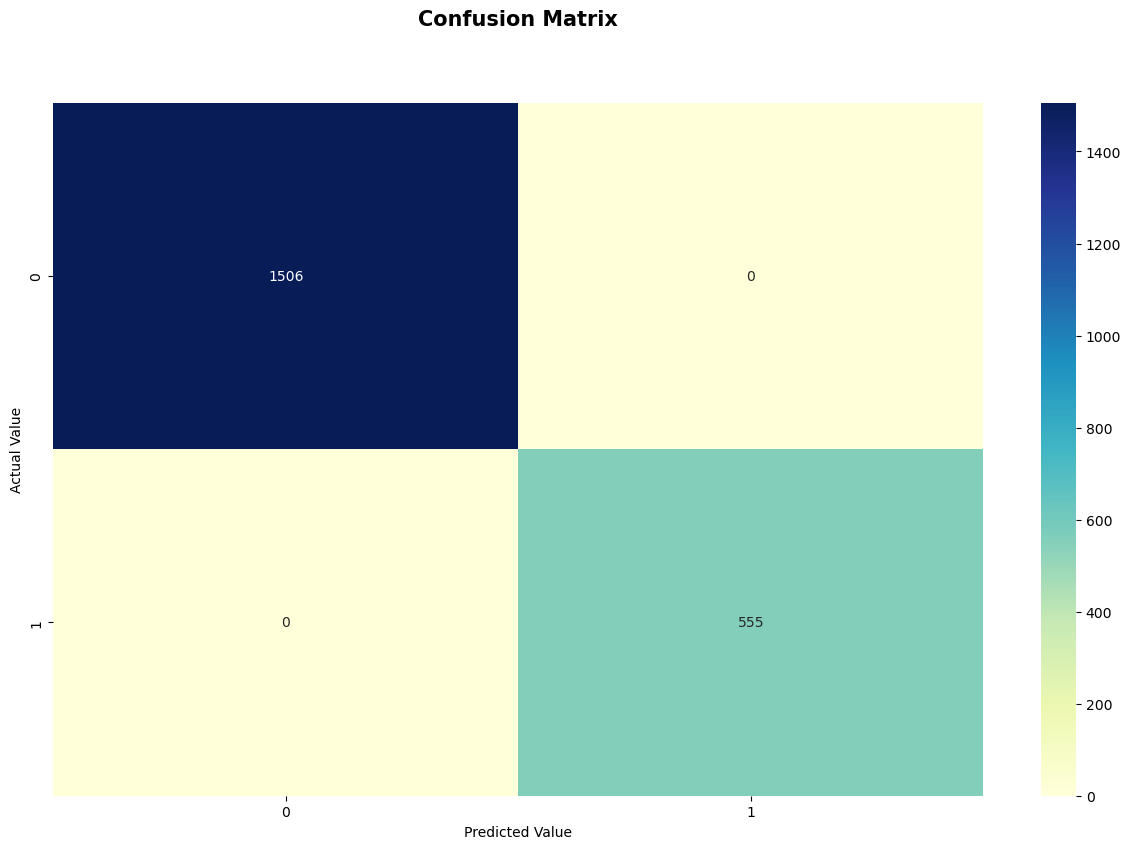

In [191]:
sns.heatmap(pd.DataFrame(matrix),annot = True,cmap="YlGnBu",fmt='g')
plt.title('Confusion Matrix',y=1.1,fontweight="bold",fontsize=15)
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')

### 19.2 KNN Model

* K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
* K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
* K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
* K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.
* K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.
* It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.
* KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

In [192]:
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score,recall_score,accuracy_score
metrics_k=[]
neighbors=range(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(X_train,y_train)
    y_pred_kNN = classifier.predict(X_test)
    knn_acc = accuracy_score(y_test,y_pred_kNN)
    metrics_k.append(knn_acc)

In [193]:
metrics_k

[0.8544395924308588,
 0.8461911693352742,
 0.8486171761280932,
 0.8335759340126152,
 0.8413391557496361,
 0.8311499272197962,
 0.8393983503153809,
 0.8287239204269772,
 0.83163512857836,
 0.8219311014070839,
 0.8262979136341582,
 0.8185346918971373]

In [194]:
print(knn_acc)

0.8185346918971373


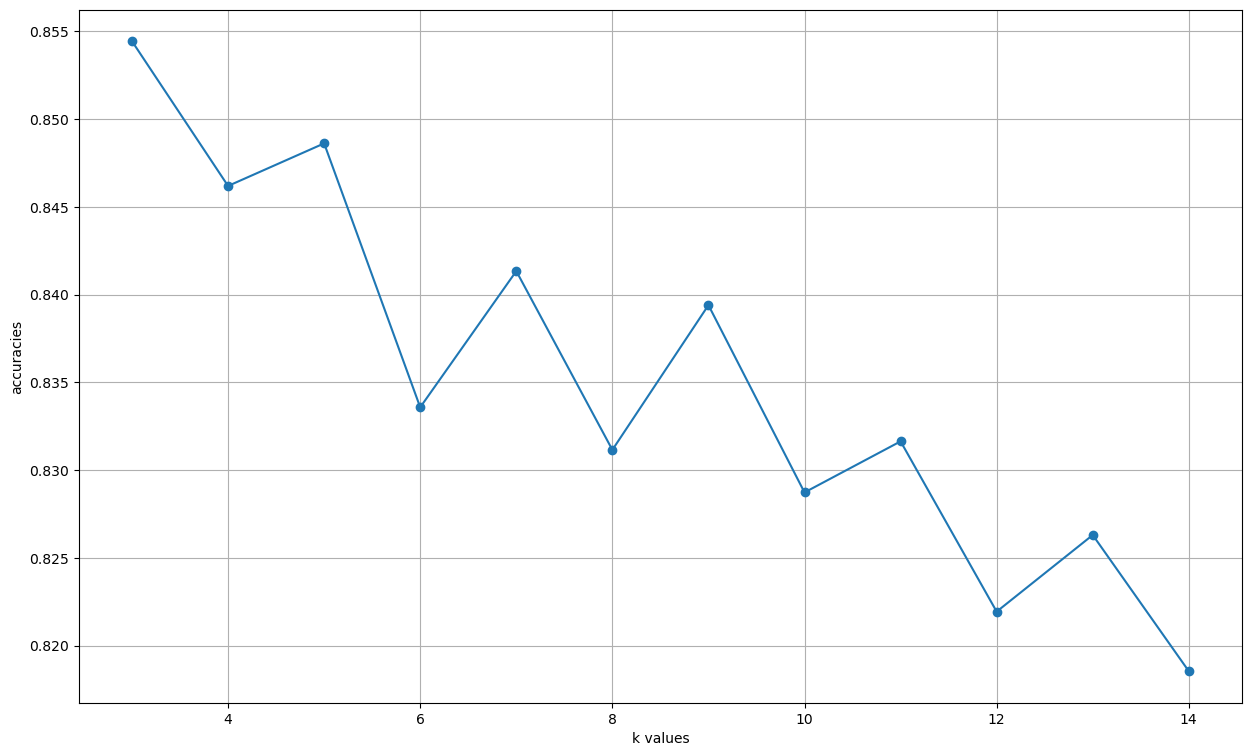

In [195]:
plt.plot(neighbors,metrics_k,'o-')
plt.xlabel('k values')
plt.ylabel('accuracies')
plt.grid()

In [196]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier = classifier.fit(X_train,y_train)
y_pred_kNN = classifier.predict(X_test)
knn_acc_score=accuracy_score(y_test,y_pred_kNN)
print(knn_acc_score)

0.8544395924308588


### 19.3 SVM Model - RBF

* Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.
* The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.
* SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine.

In [197]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
clf_svm=SVC(kernel='rbf')
clf_svm=clf_svm.fit(X_train,y_train)
y_pred_svm=clf_svm.predict(X_test)
confusion_matrix(y_test,y_pred_svm)

array([[1506,    0],
       [ 303,  252]], dtype=int64)

In [198]:
svc_acc_score=accuracy_score(y_test,y_pred_svm)
print(svc_acc_score)

0.8529839883551674


In [199]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

[[1506    0]
 [ 303  252]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1506
           1       1.00      0.45      0.62       555

    accuracy                           0.85      2061
   macro avg       0.92      0.73      0.77      2061
weighted avg       0.88      0.85      0.83      2061



### 19.4 Random Forest Model

* Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique.
* It can be used for both Classification and Regression problems in ML.
* It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.
* Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.
* Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.
* The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

In [200]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [201]:
# Model Prediction
rf_y_test_pred = rf_model.predict(X_test)

In [202]:
rf_acc_score = accuracy_score(rf_y_test_pred, y_test)

In [203]:
print(rf_acc_score)

1.0


In [204]:
import sklearn.metrics as metrics
print(metrics.classification_report(rf_y_test_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1506
           1       1.00      1.00      1.00       555

    accuracy                           1.00      2061
   macro avg       1.00      1.00      1.00      2061
weighted avg       1.00      1.00      1.00      2061



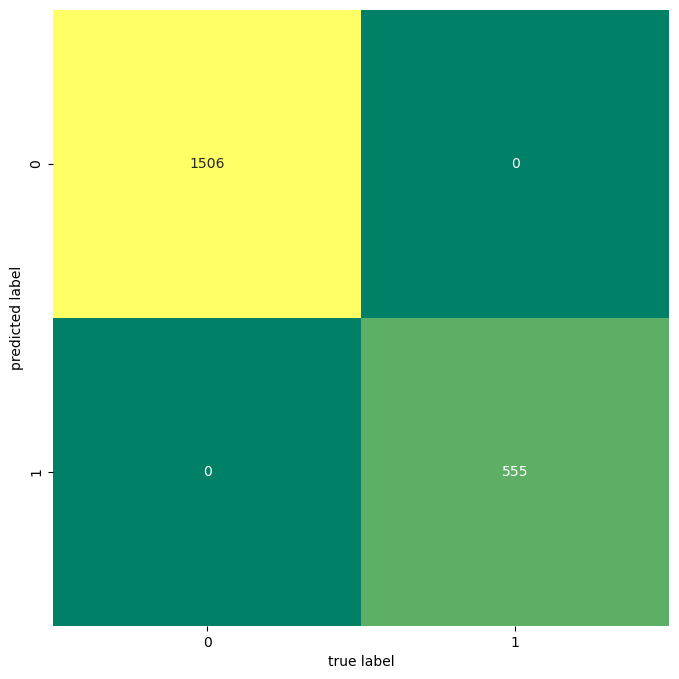

In [205]:
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(10,8))
mat_rf = confusion_matrix(y_test, rf_y_test_pred)
sns.heatmap(mat_rf.T, square=True, annot=True, fmt='d', cbar=False,cmap='summer') 
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

### 19.5 Decision Tree Model

* Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. 
* It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
* In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. 
* Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.
* The decisions or the test are performed on the basis of features of the given dataset.
* It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.
* It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.
* In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.
* A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.

In [206]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train,y_train)


In [207]:
y_pred_dt = dt_clf.predict(X_test)

In [208]:
dt_acc_score = accuracy_score(y_test,y_pred_dt)
dt_acc_score

1.0

In [209]:
print(metrics.classification_report(y_pred_dt, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1506
           1       1.00      1.00      1.00       555

    accuracy                           1.00      2061
   macro avg       1.00      1.00      1.00      2061
weighted avg       1.00      1.00      1.00      2061



### 20.Lazy Predict

It is one of the best python libraries that helps you to semi-automate your Machine Learning Task. It builds a lot of basic models without much code and helps understand which models work better without any parameter tuning.

In [210]:
pip install lazypredict

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [211]:
### importing lazypredict library
import lazypredict
### importing LazyClassifier for classification problem
from lazypredict.Supervised import LazyClassifier

In [212]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)

In [213]:
## fitting data in LazyClassifier
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 29/29 [00:15<00:00,  1.83it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 1.00               1.00     1.00      1.00   
BaggingClassifier                  1.00               1.00     1.00      1.00   
XGBClassifier                      1.00               1.00     1.00      1.00   
RandomForestClassifier             1.00               1.00     1.00      1.00   
DecisionTreeClassifier             1.00               1.00     1.00      1.00   
QuadraticDiscriminantAnalysis      1.00               1.00     1.00      1.00   
LGBMClassifier                     1.00               1.00     1.00      1.00   
GaussianNB                         1.00               1.00     1.00      1.00   
PassiveAggressiveClassifier        1.00               1.00     1.00      1.00   
Perceptron                         1.00               1.00     1.00      1.00   
LinearSVC                   

In [214]:
models

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 1.00               1.00     1.00      1.00   
BaggingClassifier                  1.00               1.00     1.00      1.00   
XGBClassifier                      1.00               1.00     1.00      1.00   
RandomForestClassifier             1.00               1.00     1.00      1.00   
DecisionTreeClassifier             1.00               1.00     1.00      1.00   
QuadraticDiscriminantAnalysis      1.00               1.00     1.00      1.00   
LGBMClassifier                     1.00               1.00     1.00      1.00   
GaussianNB                         1.00               1.00     1.00      1.00   
PassiveAggressiveClassifier        1.00               1.00     1.00      1.00   
Perceptron                         1.00               1.00     1.00      1.00   
LinearSVC                          1.00               1.00     1.00      1.00   
SGDClassifier                      1.00               0.99     0.99      1.00   
LogisticRegression                 0.99               0.98     0.98      0.99   
ExtraTreesClassifier               0.97               0.95     0.95      0.97   
SVC                                0.97               0.94     0.94      0.97   
BernoulliNB                        0.96               0.94     0.94      0.96   
ExtraTreeClassifier                0.84               0.80     0.80      0.84   
NearestCentroid                    0.80               0.78     0.78      0.80   
LinearDiscriminantAnalysis         0.87               0.77     0.77      0.86   
RidgeClassifier                    0.87               0.76     0.76      0.85   
RidgeClassifierCV                  0.87               0.76     0.76      0.85   
NuSVC                              0.87               0.76     0.76      0.85   
CalibratedClassifierCV             0.87               0.75     0.75      0.85   
KNeighborsClassifier               0.82               0.72     0.72      0.81   
LabelSpreading                     0.78               0.71     0.71      0.78   
LabelPropagation                   0.78               0.71     0.71      0.78   
DummyClassifier                    0.73               0.50     0.50      0.62   

                               Time Taken  
Model                                      
AdaBoostClassifier                   0.03  
BaggingClassifier                    0.08  
XGBClassifier                        0.13  
RandomForestClassifier               0.57  
DecisionTreeClassifier               0.02  
QuadraticDiscriminantAnalysis        0.03  
LGBMClassifier                       0.16  
GaussianNB                           0.02  
PassiveAggressiveClassifier          0.03  
Perceptron                           0.03  
LinearSVC                            0.22  
SGDClassifier                        0.03  
LogisticRegression                   0.04  
ExtraTreesClassifier                 0.58  
SVC                                  1.63  
BernoulliNB                          0.02  
ExtraTreeClassifier                  0.03  
NearestCentroid                      0.02  
LinearDiscriminantAnalysis           0.04  
RidgeClassifier                      0.03  
RidgeClassifierCV                    0.04  
NuSVC                                3.02  
CalibratedClassifierCV               0.90  
KNeighborsClassifier                 0.37  
LabelSpreading                       4.16  
LabelPropagation                     3.50  
DummyClassifier                      0.02

### 21.Hyper Parameter Tuning
#### 21.1 Use K Fold Cross validation

In [215]:
#SVM Model

In [216]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import svm
best_svm = svm.SVC(kernel='rbf')
c1 = cross_val_score(best_svm, X, y, cv=5)
print(c1)

[0.85346919 0.84813197 0.85097087 0.85631068 0.84902913]


In [217]:
#Logistic Regression

In [218]:
log_reg=LogisticRegression()
c2 = cross_val_score(logit_model, X, y, cv=5)
print(c2)

[1.         1.         1.         1.         0.99951456]


### 21.2 Use GridSearchCV

In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
 
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
 
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(log_reg, param_grid, cv = 5)
 
logreg_cv.fit(X, y)
 
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.9999029126213592


In [220]:
logreg_cv

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [221]:
#KNN Model

In [222]:
# X,y will automatically divided by 5 folder, the scoring I will still use the accuracy
c3 = cross_val_score(classifier, X, y, cv=5)
# print all 5 times scores 
print(c3)

[0.86365842 0.86705483 0.86019417 0.86019417 0.84708738]


In [223]:
#Decision Tree Model

In [224]:
c4 = cross_val_score(dt_clf, X, y, cv=5)
print(c4)

[1. 1. 1. 1. 1.]


### 21.3 Use RandomizedSearchCV

In [225]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
 
# Creating the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
 
# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()
 
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)
 
tree_cv.fit(X, y)
 
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1}
Best score is 0.9961170230305771


In [226]:
#Random Forest Model

In [227]:
c5 = cross_val_score(rf_model, X, y, cv=5)
print(c5)

[0.9995148  1.         1.         1.         0.99951456]


In [228]:
# Define Parameters
max_depth=[2, 4, 8]
n_estimators = [16, 36, 64]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

# Build the grid search
rf_model2 = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
grid = GridSearchCV(estimator=rf_model2, param_grid=param_grid, cv = 5)
grid_results = grid.fit(X, y)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
results_df

Best: [0.99970874 0.99213748 0.98602281 1.         0.99990296 0.99990296
 0.99990291 0.99980587 0.99980587], using {'max_depth': 4, 'n_estimators': 16}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           0.08          0.01             0.01            0.00   
1           0.13          0.00             0.02            0.00   
2           0.23          0.01             0.02            0.00   
3           0.07          0.00             0.01            0.00   
4           0.12          0.01             0.02            0.00   
5           0.20          0.02             0.02            0.00   
6           0.06          0.00             0.01            0.00   
7           0.12          0.01             0.01            0.00   
8           0.21          0.01             0.02            0.00   

  param_max_depth param_n_estimators                                params  \
0               2                 16  {'max_depth': 2, 'n_estimators': 16}   
1               2                 36  {'max_depth': 2, 'n_estimators': 36}   
2               2                 64  {'max_depth': 2, 'n_estimators': 64}   
3               4                 16  {'max_depth': 4, 'n_estimators': 16}   
4               4                 36  {'max_depth': 4, 'n_estimators': 36}   
5               4                 64  {'max_depth': 4, 'n_estimators': 64}   
6               8                 16  {'max_depth': 8, 'n_estimators': 16}   
7               8                 36  {'max_depth': 8, 'n_estimators': 36}   
8               8                 64  {'max_depth': 8, 'n_estimators': 64}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0               1.00               1.00               1.00               1.00   
1               1.00               0.99               0.98               0.99   
2               0.99               0.98               0.98               0.99   
3               1.00               1.00               1.00               1.00   
4               1.00               1.00               1.00               1.00   
5               1.00               1.00               1.00               1.00   
6               1.00               1.00               1.00               1.00   
7               1.00               1.00               1.00               1.00   
8               1.00               1.00               1.00               1.00   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0               1.00             1.00            0.00                7  
1               1.00             0.99            0.01                8  
2               1.00             0.99            0.01                9  
3               1.00             1.00            0.00                1  
4               1.00             1.00            0.00                2  
5               1.00             1.00            0.00                2  
6               1.00             1.00            0.00                4  
7               1.00             1.00            0.00                5  
8               1.00             1.00            0.00                5

In [229]:
#Creating a dataframe with all accuracy scores before and after cross valiadtion
accuracy={'Model Name':['Logistic','kNN','SVC-RBF','Decision Tree','Random Forest'],'Accuracy score' :[logreg_acc_score,knn_acc_score,svc_acc_score,dt_acc_score,rf_acc_score],'Cross Validation Score':[c1.mean(),c2.mean(),c3.mean(),c4.mean(),c5.mean()]}
df4=pd.DataFrame(accuracy)
df4

Model Name  Accuracy score  Cross Validation Score
0       Logistic            1.00                    0.85
1            kNN            0.85                    1.00
2        SVC-RBF            0.85                    0.86
3  Decision Tree            1.00                    1.00
4  Random Forest            1.00                    1.00

In [230]:
X

KIDSDRIV   AGE  HOMEKIDS    INCOME  PARENT1  HOME_VAL  MSTATUS  GENDER  \
0             0 60.00         0  67349.00        0      0.00        0       1   
1             0 43.00         0  91449.00        0 257252.00        0       1   
2             0 48.00         0  52881.00        0      0.00        0       1   
3             0 35.00         1  16039.00        0 124191.00        1       0   
4             0 51.00         0  53529.00        0 306251.00        1       1   
...         ...   ...       ...       ...      ...       ...      ...     ...   
10297         1 45.00         2 164669.00        0 386273.00        1       1   
10298         0 46.00         0 107204.00        0 332591.00        1       1   
10299         0 48.00         0  39837.00        0 170611.00        1       0   
10300         0 50.00         0  43445.00        0 149248.00        1       0   
10301         0 52.00         0  53235.00        0 197017.00        1       0   

       EDUCATION  OCCUPATION  ...  TIF  CAR_TYPE  RED_CAR  OLDCLAIM  CLM_FREQ  \
0              4           6  ...   11         0        1   4461.00         2   
1              2           0  ...    1         0        1      0.00         0   
2              1           5  ...    1         5        1      0.00         0   
3              2           1  ...    4         3        0  38690.00         2   
4              0           0  ...    7         0        1      0.00         0   
...          ...         ...  ...  ...       ...      ...       ...       ...   
10297          4           5  ...   15         0        0      0.00         0   
10298          3           0  ...    6         1        0      0.00         0   
10299          0           0  ...    7         3        0      0.00         0   
10300          1           3  ...    6         0        0      0.00         0   
10301          2           1  ...    6         0        0      0.00         0   

       REVOKED  MVR_PTS  CLM_AMT  CAR_AGE  URBANICITY  
0            0        3     0.00    18.00           1  
1            0        0     0.00     1.00           1  
2            0        2     0.00    10.00           1  
3            0        3     0.00    10.00           1  
4            0        0     0.00     6.00           1  
...        ...      ...      ...      ...         ...  
10297        0        2     0.00    17.00           1  
10298        0        0     0.00     1.00           1  
10299        0        0     0.00     1.00           1  
10300        0        0     0.00    11.00           1  
10301        0        0     0.00     9.00           0  

[10302 rows x 23 columns]

In [231]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10297    0
10298    0
10299    0
10300    0
10301    0
Name: CLAIM_FLAG, Length: 10302, dtype: int64

In [232]:
X=new_data.iloc[:,[2,5,9,10,11,22]].values
X=np.array(X)

In [233]:
X

array([[0.00000e+00, 0.00000e+00, 6.00000e+00, 1.40000e+01, 1.00000e+00,
        0.00000e+00],
       [0.00000e+00, 2.57252e+05, 0.00000e+00, 2.20000e+01, 0.00000e+00,
        0.00000e+00],
       [0.00000e+00, 0.00000e+00, 5.00000e+00, 2.60000e+01, 1.00000e+00,
        0.00000e+00],
       ...,
       [0.00000e+00, 1.70611e+05, 0.00000e+00, 1.20000e+01, 1.00000e+00,
        0.00000e+00],
       [0.00000e+00, 1.49248e+05, 3.00000e+00, 3.60000e+01, 1.00000e+00,
        0.00000e+00],
       [0.00000e+00, 1.97017e+05, 1.00000e+00, 6.40000e+01, 1.00000e+00,
        0.00000e+00]])

In [234]:
y=new_data['CLAIM_FLAG'].values
y=np.array(y)

In [235]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [236]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(X,y)

RandomForestClassifier()

### 22 Pickle for Modeling

In [237]:
import pickle

In [238]:
filename = 'claim_pred_model_latest.pkl'
pickle.dump(model2,open(filename,'wb'))

In [239]:
loaded_model = pickle.load(open(filename,'rb'))

In [240]:
loaded_model.predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [241]:
loaded_model

RandomForestClassifier()

In [242]:
model2

RandomForestClassifier()

In [243]:
new_data.head(21)

KIDSDRIV   AGE  HOMEKIDS    INCOME  PARENT1  HOME_VAL  MSTATUS  GENDER  \
0          0 60.00         0  67349.00        0      0.00        0       1   
1          0 43.00         0  91449.00        0 257252.00        0       1   
2          0 48.00         0  52881.00        0      0.00        0       1   
3          0 35.00         1  16039.00        0 124191.00        1       0   
4          0 51.00         0  53529.00        0 306251.00        1       1   
5          0 50.00         0 114986.00        0 243925.00        1       0   
6          0 34.00         1 125301.00        1      0.00        0       0   
7          0 54.00         0  18755.00        0 160661.00        1       0   
8          1 40.00         1  50815.00        1      0.00        0       1   
9          0 44.00         2  43486.00        1      0.00        0       0   
10         1 37.00         2 107961.00        0 333680.00        1       1   
11         0 34.00         0  62978.00        0      0.00        0       0   
12         0 50.00         0 106952.00        0      0.00        0       1   
13         0 53.00         0  77100.00        0      0.00        0       0   
14         0 43.00         0  52642.00        0 209970.00        1       0   
15         0 55.00         0  59162.00        0 180232.00        1       1   
16         0 53.00         0 130795.00        0      0.00        0       1   
17         0 35.00         2  21204.00        1      0.00        0       1   
18         0 45.00         0      0.00        0 106859.00        1       0   
19         0 39.00         3  51884.00        1 180951.00        0       0   
20         0 59.00         0  87460.00        0      0.00        0       1   

    EDUCATION  OCCUPATION  ...  RED_CAR  OLDCLAIM  CLM_FREQ  REVOKED  MVR_PTS  \
0           4           6  ...        1   4461.00         2        0        3   
1           2           0  ...        1      0.00         0        0        0   
2           1           5  ...        1      0.00         0        0        2   
3           2           1  ...        0  38690.00         2        0        3   
4           0           0  ...        1      0.00         0        0        0   
5           4           2  ...        0  19217.00         2        1        3   
6           1           0  ...        0      0.00         0        0        0   
7           0           0  ...        0      0.00         0        0        0   
8           2           5  ...        0   3295.00         1        0        2   
9           2           0  ...        0      0.00         0        0        0   
10          1           0  ...        1   2374.00         1        1       10   
11          1           1  ...        0      0.00         0        0        0   
12          1           6  ...        0      0.00         0        0        1   
13          3           4  ...        0      0.00         0        0        0   
14          3           6  ...        0      0.00         0        0        0   
15          1           5  ...        1   5028.00         2        1        3   
16          4           0  ...        1      0.00         0        0        3   
17          2           1  ...        0      0.00         0        1        0   
18          0           3  ...        0      0.00         0        0        3   
19          1           1  ...        0      0.00         0        0        0   
20          2           5  ...        1  44857.00         2        0        4   

    CLM_AMT  CAR_AGE  CLAIM_FLAG  URBANICITY        AGEGROUP  
0      0.00    18.00           0           1  Senior Citizen  
1      0.00     1.00           0           1      Middle Age  
2      0.00    10.00           0           1      Middle Age  
3      0.00    10.00           0           1           Adult  
4      0.00     6.00           0           1      Middle Age  
5      0.00    17.00           0           1      Middle Age  
6   2946.00     7.00           1           1           Adult  
